# HW3: Genetic Algorithm for Path Planning Problem

In [261]:
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [262]:
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE)) #A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

## Goal: 
Solve 100 sets of data X and find the maximum value **`F(X)`**
$$ F(x)= \sin(10x) \cdot x + \cos(2x) \cdot x $$

In [263]:
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

## HW3.1 Target Function
From x=0~5, draw the curve of this objective function

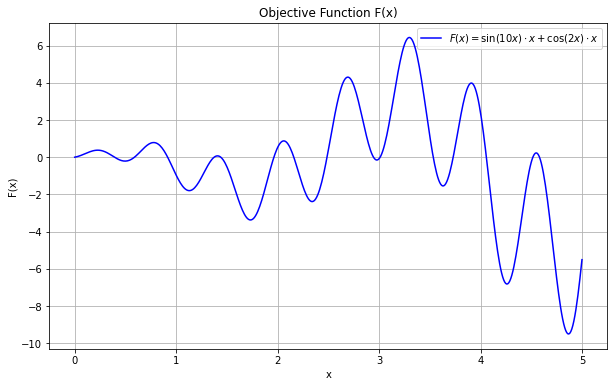

In [264]:
# TODO: draw the curve of this objective function
# Generate x values from 0 to 5
x = np.linspace(X_BOUND[0], X_BOUND[1], 500)  # 500 points for a smooth curve

# Calculate F(x) for each x value
y = F(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$F(x) = \sin(10x) \cdot x + \cos(2x) \cdot x$', color='b')
plt.title('Objective Function F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.legend()
plt.show()

# Design Fitness Function
$$ fitness(pred) =\text{pred} + 10^{-3} - \min(\text{pred}) $$

This fitness function $pred + 10^{-3} - min(pred)$ is designed carefully to address common issues in algorithms and optimize the selection process. Here's a detailed explanation:

### **Explanation**:
1. **pred**: This represents the current fitness value (or prediction) of an individual in the population. The higher the fitness, the more likely the individual will be selected in a genetic algorithm.

2. **$10^{-3}$**: This small constant is added to ensure that the fitness value never becomes zero. Even when the `pred` value is very small or equal to the minimum in the population, this small constant prevents the fitness from being zero. It helps avoid numerical issues and ensures that each individual has a non-zero fitness, which is crucial in selection mechanisms that use fitness-based probabilities.

3. $- \min(\text{pred})$: Subtracting the minimum fitness value of the population helps normalize the fitness values. By shifting all fitness values so that the minimum fitness becomes close to zero, this highlights the difference between individuals. It ensures that the worst individuals are near zero fitness, making selection mechanisms more effective by promoting fitter individuals.

### **Why This Design?**

1. **Preventing Zero Fitness**: Adding a small constant ($10^{-3}$) ensures that no fitness value becomes zero or negative. This is important for algorithms that require positive fitness values, such as selection mechanisms in genetic algorithms that rely on proportional selection.

2. **Normalization**: By subtracting the minimum fitness value, the function ensures that the least fit individuals are near zero. This scaling helps selection mechanisms function more effectively, preventing the worst individuals from dominating and allowing fitter individuals to have a higher chance of selection.

3. **Fine Adjustment**: The addition of $10^{-3}$ is a small adjustment to ensure that no individual has exactly zero fitness, which is important for algorithms that require positive probabilities for selection.

### **Summary**:

This fitness function is designed to:
- Normalize fitness values by subtracting the minimum fitness.
- Ensure no individual has zero or negative fitness by adding a small constant.
- Smoothly scale fitness values to make sure selection mechanisms (like in genetic algorithms) work effectively, increasing the likelihood of selecting fitter individuals.

## You can also design other fitness functions.

## HW3.2 Fitness Function
Write the Fitness Function:
$$ \text{pred} + 10^{-3} - \min(\text{pred}) $$

In [265]:
def get_fitness(pred): 
    # TODO: Write the Fitness Function and return the fitness value
    return pred - np.min(pred) + 1e-3

## HW3.3 Representation
Design a function **`translateDNA(pop)`** to convert binary-encoded DNA (gene sequences) into a real number, used in genetic algorithms to map binary genes to a value within a specified range.

### **Input**:
- **`pop`**: A 2D array where each row represents an individual's DNA, encoded as a binary sequence.

### **Output**:
- A 1D array of real values, where the binary DNA has been converted to real numbers and scaled according to `X_BOUND[1]`.

### **Explanation**:
- The function converts the binary DNA representation into a real number by treating the binary sequence as a number in base-2, normalizing it by dividing by the maximum possible value, and scaling it to fit within the specified bounds (`X_BOUND[1]`).

In [266]:
def translateDNA(pop): 
    # TODO: Write the translateDNA Function and return a 1D array of real values
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# HW3.4 Selection
Write a function **`select(pop, fitness)`** to implement a natural selection process in a genetic algorithm. It selects individuals from the population (pop) based on their fitness values (fitness), where fitter individuals have a higher probability of being selected for the next generation. 

Tip: You can normalize fitness into a probability distribution using `p = fitness / fitness.sum()`, ensuring that the sum of all individuals equals 1. The higher the fitness of an individual, the greater its chance of being selected, but every individual still has a chance of being chosen.
### **Input**:
1. **`pop`**: A 2D array representing the population, where each row is an individual's genetic sequence (DNA).
2. **`fitness`**: A 1D array representing the fitness values of the individuals in the population.

### **Output**:
- **`pop[idx]`**: A 2D array representing the selected population for the next generation, with individuals chosen based on their fitness values.

In [267]:
def select(pop, fitness):    # nature selection wrt pop's fitness
    # TODO: Write the select Function and return a 2D array representing the selected population for the next generation
    if np.sum(fitness) == 0:  # Handle case where all fitness are zero
        fitness += 1e-6
    normalized_fitness = fitness / fitness.sum()
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=normalized_fitness)
    return pop[idx]

## HW3.5 Crossover
Write a function **`crossover(parent, pop)`** to implement the crossover (mating) process in a genetic algorithm. During crossover, two individuals exchange some of their genetic material to produce a new individual (child).
### **Input**:
1. **`parent`**: A 1D array representing an individual's genetic sequence (DNA).
2. **`pop`**: A 2D array representing the population, where each row is an individual.

### **Output**:
- **`parent`**: A 1D array, either modified (after crossover) or unmodified (if no crossover occurs).


In [268]:
def crossover(parent, pop):
    # TODO: Write the crossover Function and return a 1D array of parent
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)  # select another individual from pop
        cross_points = np.random.randint(0, 2, DNA_SIZE).astype(bool)  # choose crossover points
        parent[cross_points] = pop[i_, cross_points]  # mating and produce one child
    return parent

## HW3.6 Mutation
Write a function **`mutate()`** to perform a mutation operation in a genetic algorithm, which introduces small random changes in an individual's genetic sequence (DNA). Mutation helps maintain genetic diversity within the population.
### **Input**:
1. **`child`**: A 1D array representing an individual's genetic sequence (DNA), where each element is typically a binary value (0 or 1).

### **Output**:
- **`child`**: The modified genetic sequence after mutation, where certain genes may have flipped from 0 to 1 or from 1 to 0 based on the mutation rate.

### **Explanation**:
- The function iterates through each gene in the `child` DNA sequence. For each gene, with a probability determined by `MUTATION_RATE`, the gene may undergo mutation, flipping from 0 to 1 or from 1 to 0. This introduces genetic diversity into the population.


In [269]:
def mutate(child):
    # TODO: Write the mutation Function and return the child
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

## HW3.7 GA Function
Write a function GA() that implements a basic genetic algorithm (GA) that evolves a population over many generations to optimize the function F() based on the function you wrote above.
### **Input**:

1. **`N_GENERATIONS`**: An integer representing the number of generations (iterations) the genetic algorithm will run.
2. **`pop`**: A 2D array where each row represents an individual's DNA sequence encoded in binary (the initial population).

### **Output**:
- **`performance`**: A list that records the sum of fitness values (`F_values.sum()`) for each generation. This allows the user to analyze how the overall fitness of the population evolves across generations. Additionally, for each generation, a scatter plot is generated to visually represent the solutions' progression.
- **`time_per_iteration`**: A list used to record the computation time for each generation.

In [270]:
performance = []
time_per_iteration = []

def GA(N_GENERATIONS, pop):    
    # TODO: Write the GA Function that evolves a population over many generations to optimize the function F() based on the function you wrote above.
    for generation in range(N_GENERATIONS):
        start_time = time.time()
        
        # Convert DNA to real values and get corresponding fitness
        real_values = translateDNA(pop)
        F_values = F(real_values)  # Calculate the objective function value
        fitness = get_fitness(F_values)  # Get fitness

        # Record performance
        performance.append(F_values.sum())
        max_f_value = F_values.max()

        # Plot for the current generation
        plt.figure(figsize=(10, 6))
        plt.scatter(real_values, F_values, s=200, lw=0, c='red', alpha=0.5)
        plt.xlim(0, 5)
        plt.ylim(-10, 10)
        plt.title(f'Generation: {generation}')
        plt.xlabel('Real Values')
        plt.ylabel('F_values')
        
        # Add text to the plot
        plt.text(0.1, 9, f'Max F_values: {max_f_value:.4f}', fontsize=12, color='black')
        
        # Show the plot
        plt.show()

        # Natural selection
        pop = select(pop, fitness)
        
        # Crossover and mutation to produce new offspring
        pop_copy = pop.copy()
        for i in range(POP_SIZE):
            parent = pop[i]
            child = crossover(parent, pop_copy)  # Perform crossover
            child = mutate(child)  # Perform mutation
            pop[i] = child  # Replace the parent with its child

        # Calculate time for the generation
        time_taken = time.time() - start_time
        time_per_iteration.append(time_taken)

        # Print the generation and time taken
        print(f"Generation: {generation}")
        print(f"Max F_values: {max_f_value:.4f}")
        print(f"Time for Generation {generation}: {time_taken:.4f} seconds\n")

    return performance, time_per_iteration  # Return both performance and time per generation


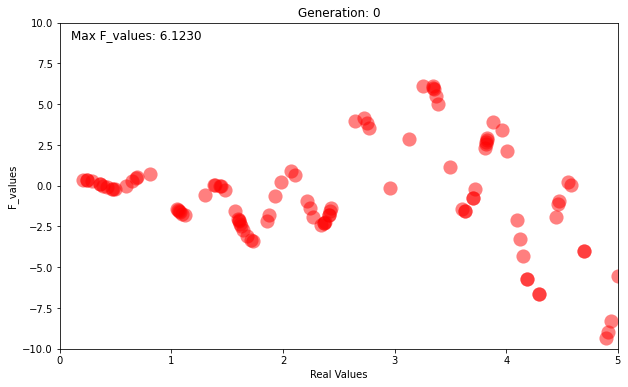

Generation: 0
Max F_values: 6.1230
Time for Generation 0: 0.0692 seconds



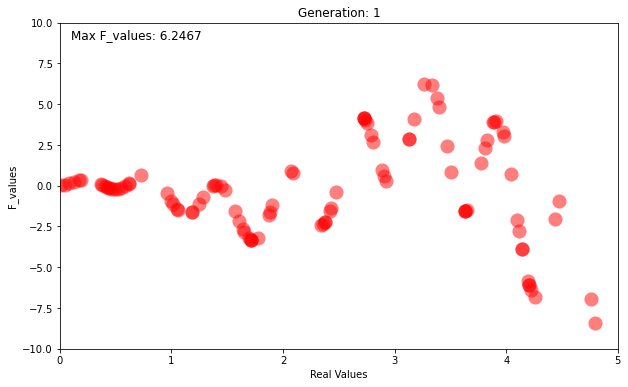

Generation: 1
Max F_values: 6.2467
Time for Generation 1: 0.0966 seconds



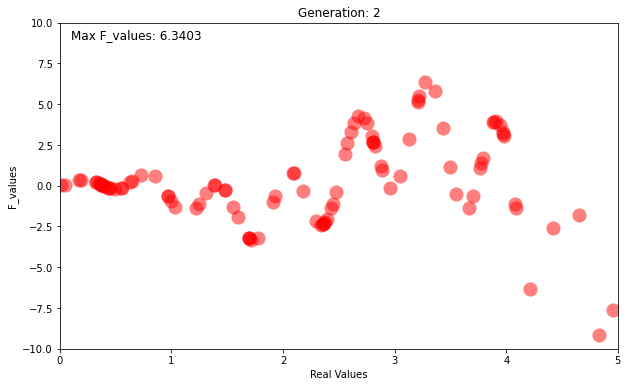

Generation: 2
Max F_values: 6.3403
Time for Generation 2: 0.0474 seconds



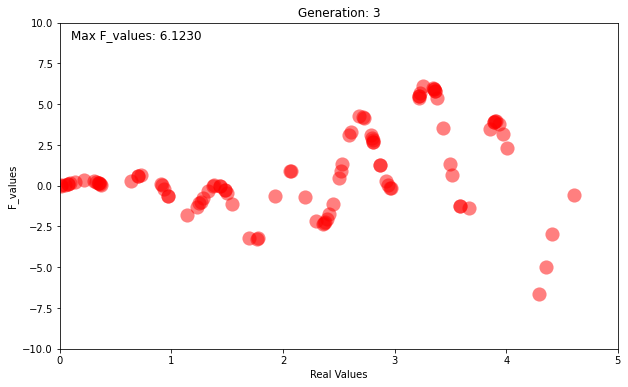

Generation: 3
Max F_values: 6.1230
Time for Generation 3: 0.0479 seconds



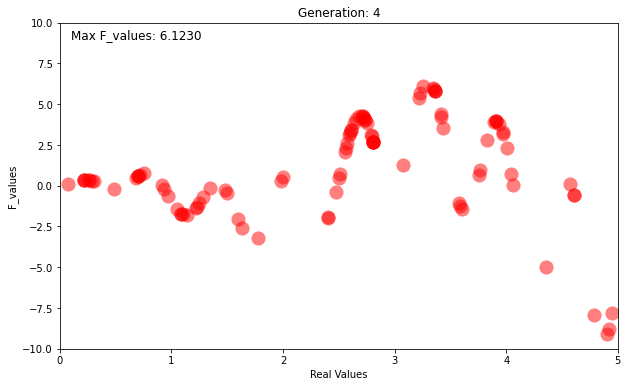

Generation: 4
Max F_values: 6.1230
Time for Generation 4: 0.0490 seconds



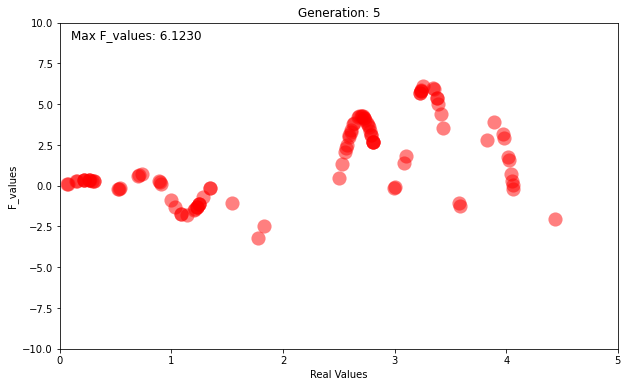

Generation: 5
Max F_values: 6.1230
Time for Generation 5: 0.0474 seconds



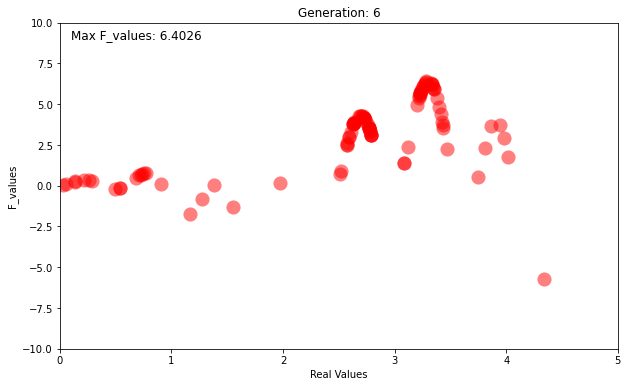

Generation: 6
Max F_values: 6.4026
Time for Generation 6: 0.0470 seconds



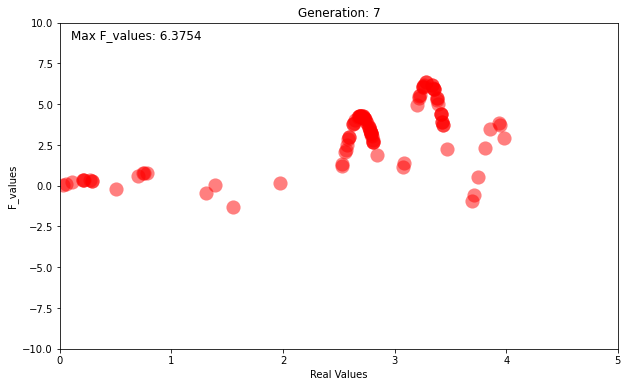

Generation: 7
Max F_values: 6.3754
Time for Generation 7: 0.0507 seconds



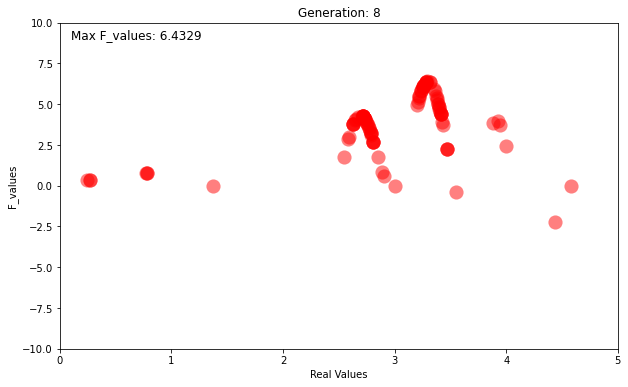

Generation: 8
Max F_values: 6.4329
Time for Generation 8: 0.0455 seconds



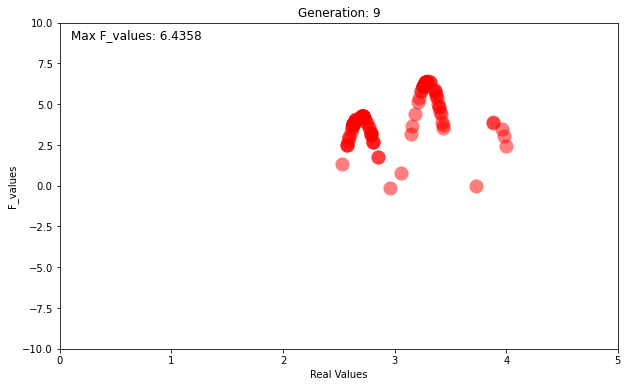

Generation: 9
Max F_values: 6.4358
Time for Generation 9: 0.0454 seconds



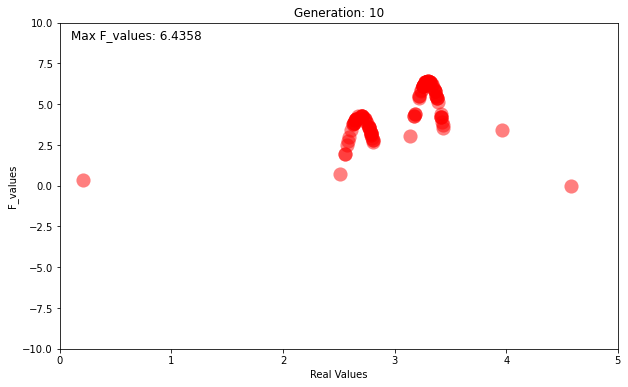

Generation: 10
Max F_values: 6.4358
Time for Generation 10: 0.0452 seconds



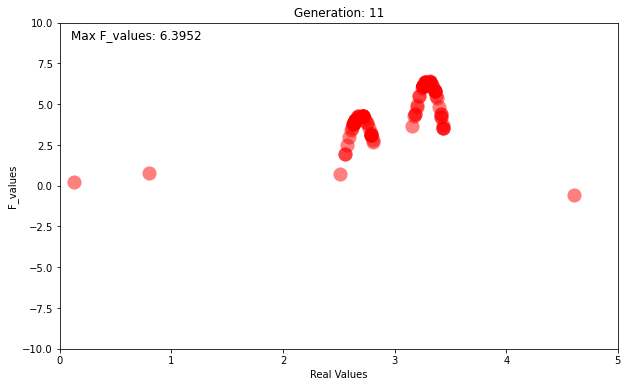

Generation: 11
Max F_values: 6.3952
Time for Generation 11: 0.0476 seconds



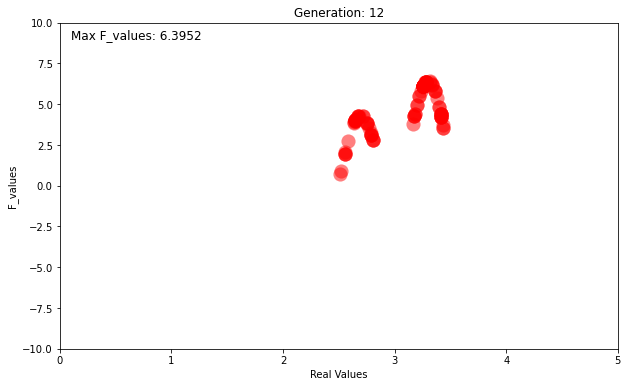

Generation: 12
Max F_values: 6.3952
Time for Generation 12: 0.0461 seconds



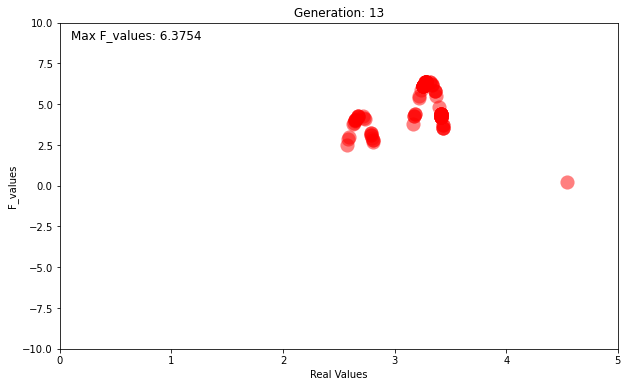

Generation: 13
Max F_values: 6.3754
Time for Generation 13: 0.0465 seconds



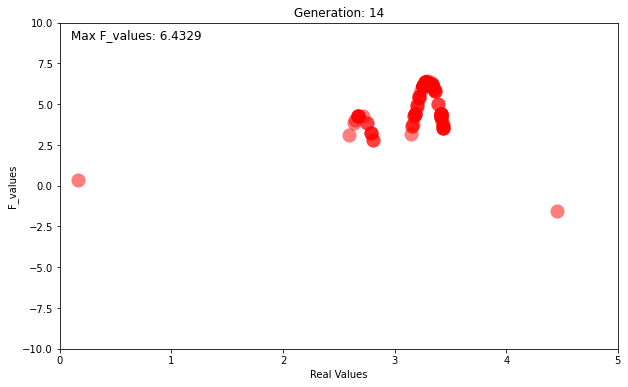

Generation: 14
Max F_values: 6.4329
Time for Generation 14: 0.0843 seconds



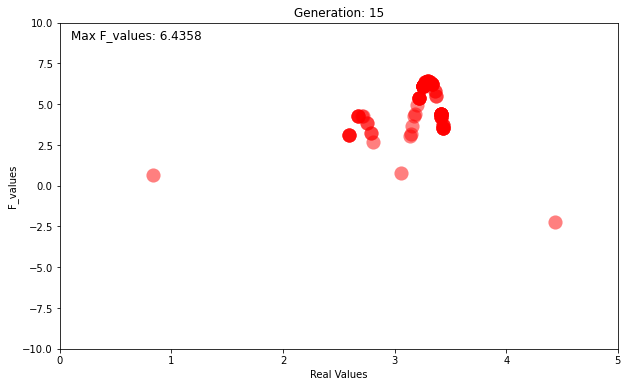

Generation: 15
Max F_values: 6.4358
Time for Generation 15: 0.0455 seconds



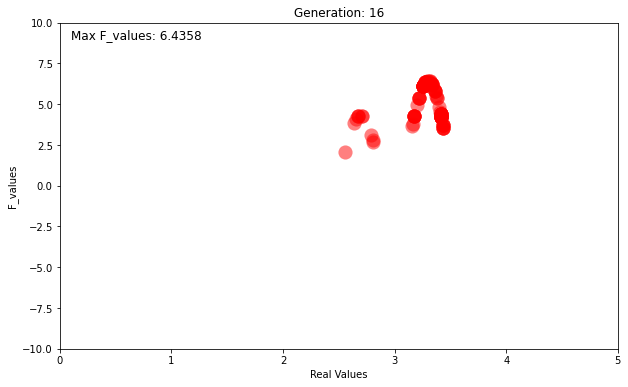

Generation: 16
Max F_values: 6.4358
Time for Generation 16: 0.0465 seconds



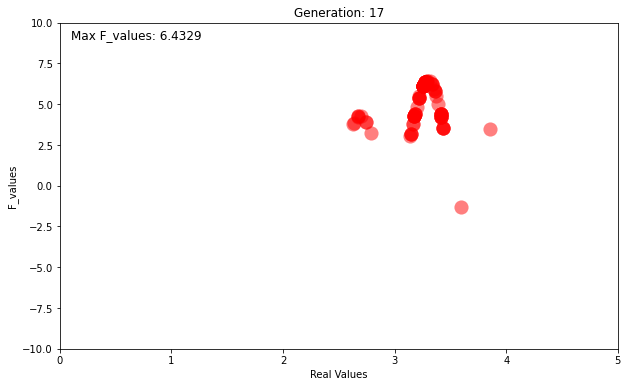

Generation: 17
Max F_values: 6.4329
Time for Generation 17: 0.0463 seconds



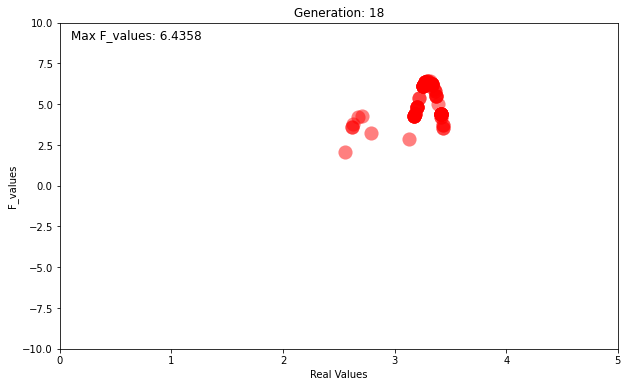

Generation: 18
Max F_values: 6.4358
Time for Generation 18: 0.0457 seconds



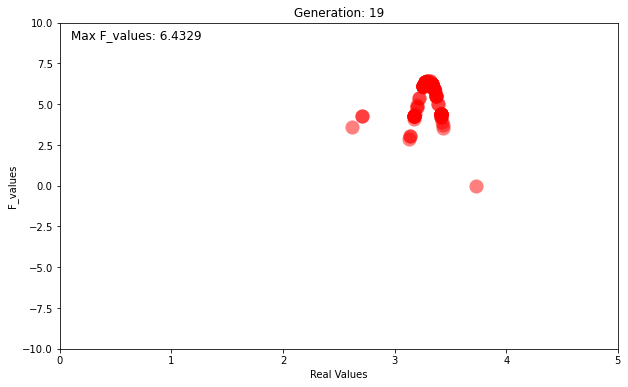

Generation: 19
Max F_values: 6.4329
Time for Generation 19: 0.0458 seconds



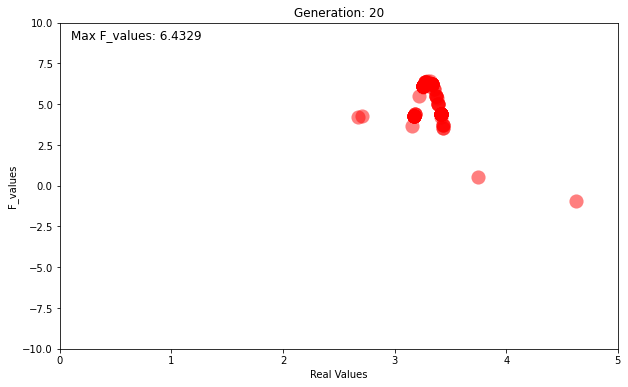

Generation: 20
Max F_values: 6.4329
Time for Generation 20: 0.0501 seconds



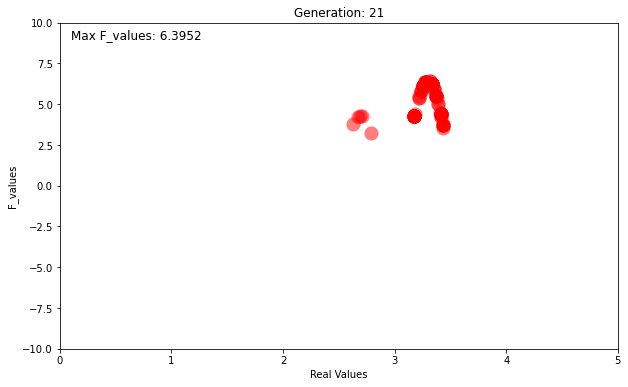

Generation: 21
Max F_values: 6.3952
Time for Generation 21: 0.0458 seconds



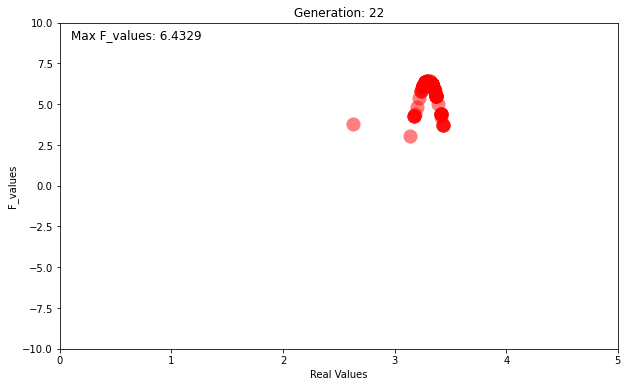

Generation: 22
Max F_values: 6.4329
Time for Generation 22: 0.0452 seconds



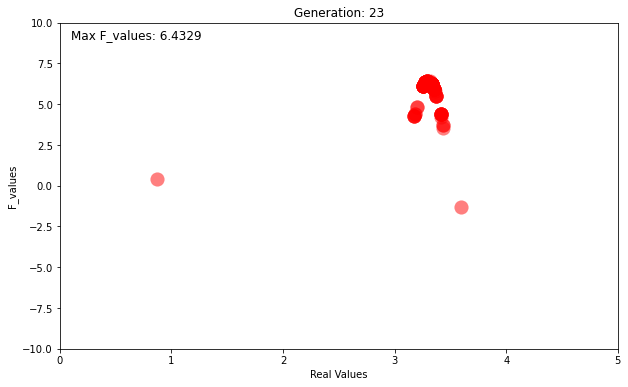

Generation: 23
Max F_values: 6.4329
Time for Generation 23: 0.0446 seconds



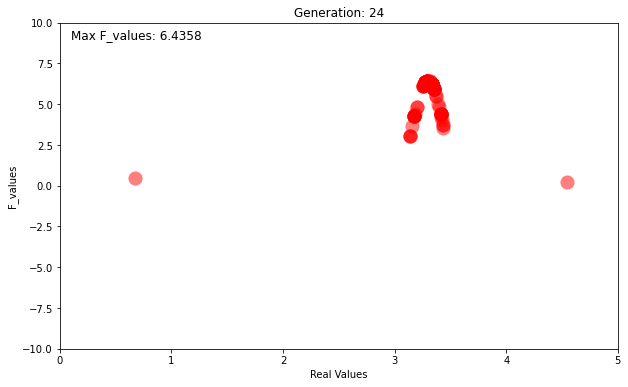

Generation: 24
Max F_values: 6.4358
Time for Generation 24: 0.0450 seconds



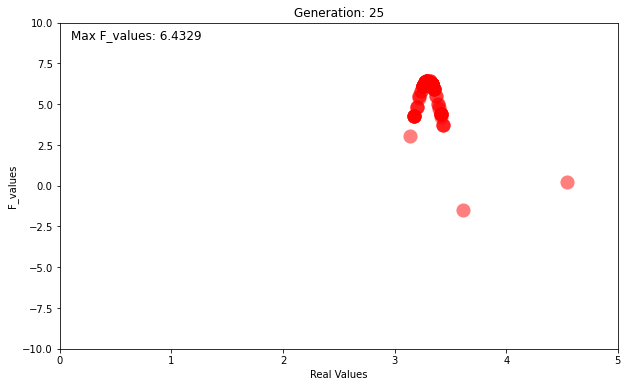

Generation: 25
Max F_values: 6.4329
Time for Generation 25: 0.0458 seconds



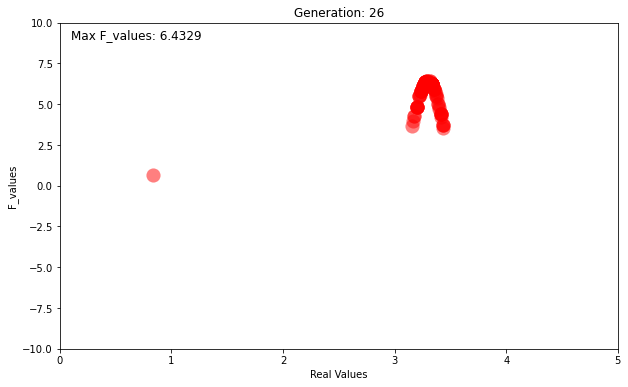

Generation: 26
Max F_values: 6.4329
Time for Generation 26: 0.0459 seconds



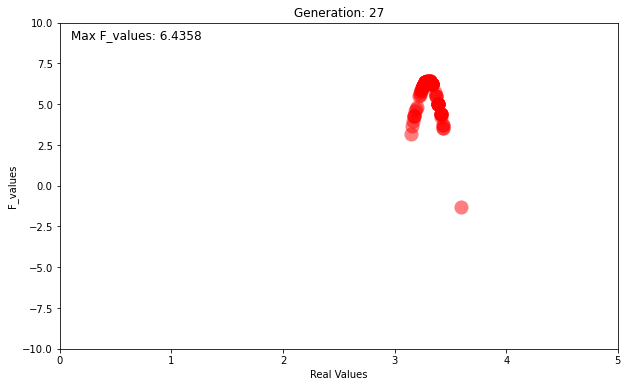

Generation: 27
Max F_values: 6.4358
Time for Generation 27: 0.0837 seconds



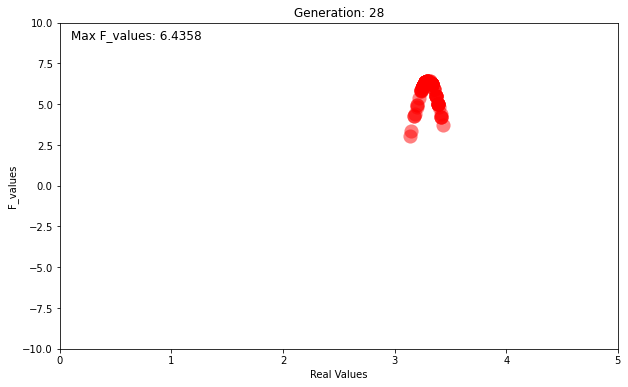

Generation: 28
Max F_values: 6.4358
Time for Generation 28: 0.0455 seconds



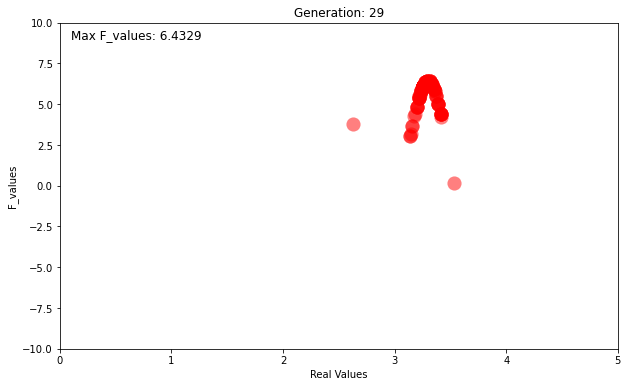

Generation: 29
Max F_values: 6.4329
Time for Generation 29: 0.0460 seconds



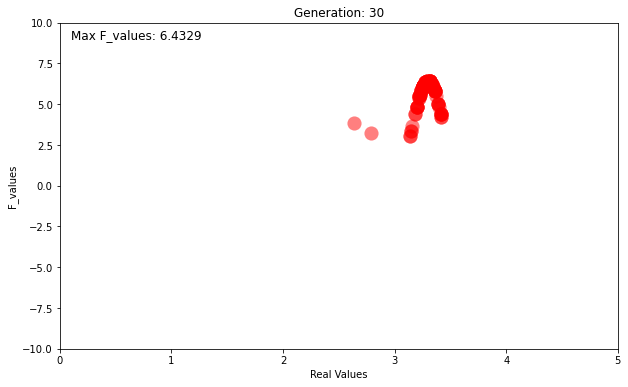

Generation: 30
Max F_values: 6.4329
Time for Generation 30: 0.0461 seconds



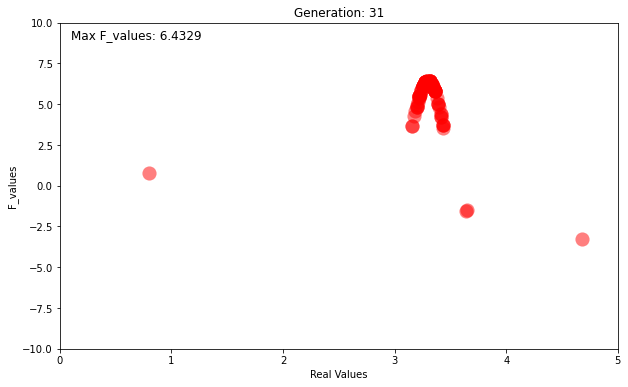

Generation: 31
Max F_values: 6.4329
Time for Generation 31: 0.0456 seconds



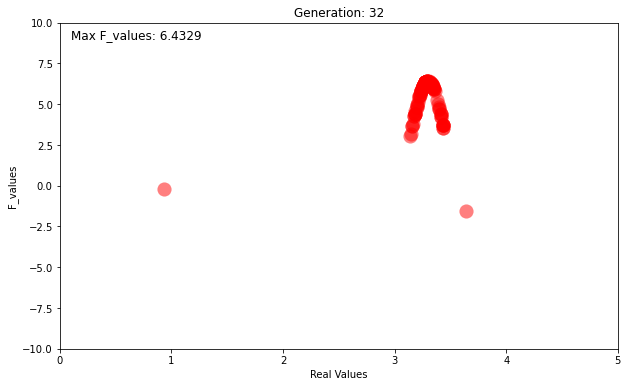

Generation: 32
Max F_values: 6.4329
Time for Generation 32: 0.0466 seconds



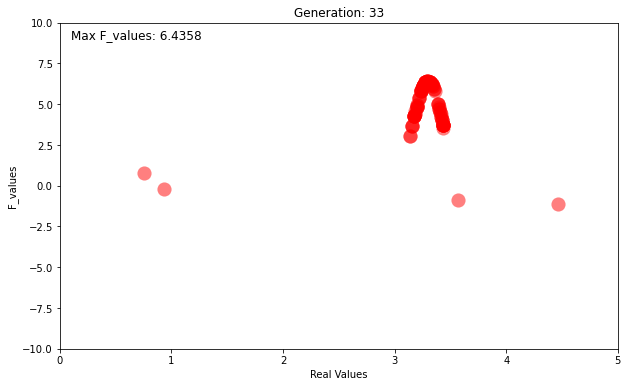

Generation: 33
Max F_values: 6.4358
Time for Generation 33: 0.0464 seconds



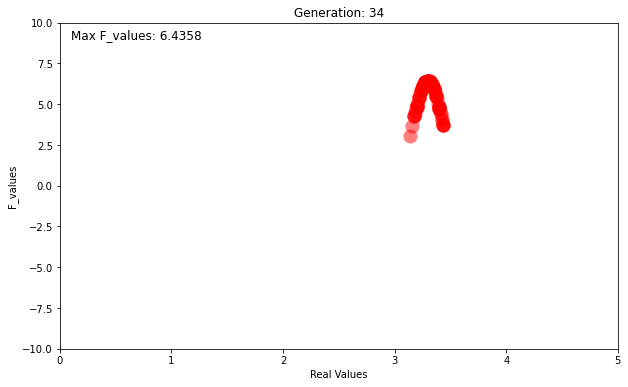

Generation: 34
Max F_values: 6.4358
Time for Generation 34: 0.0448 seconds



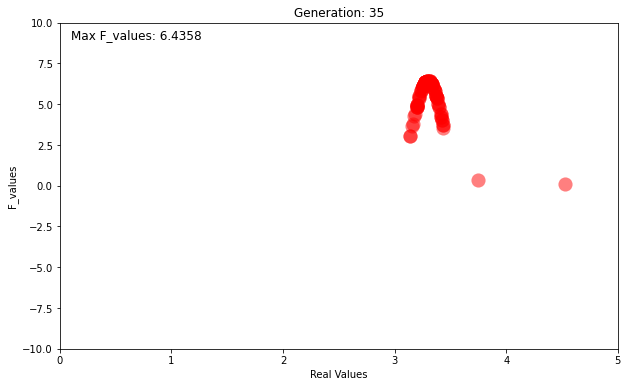

Generation: 35
Max F_values: 6.4358
Time for Generation 35: 0.0491 seconds



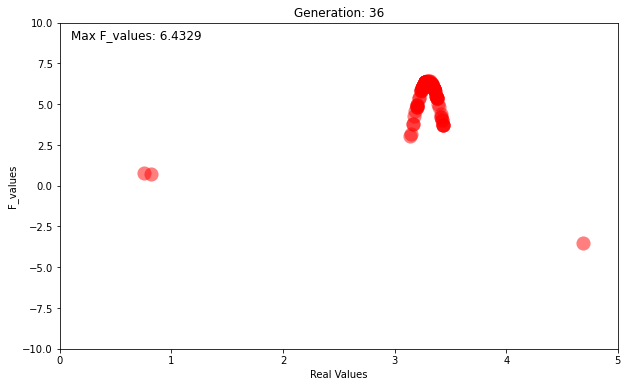

Generation: 36
Max F_values: 6.4329
Time for Generation 36: 0.0463 seconds



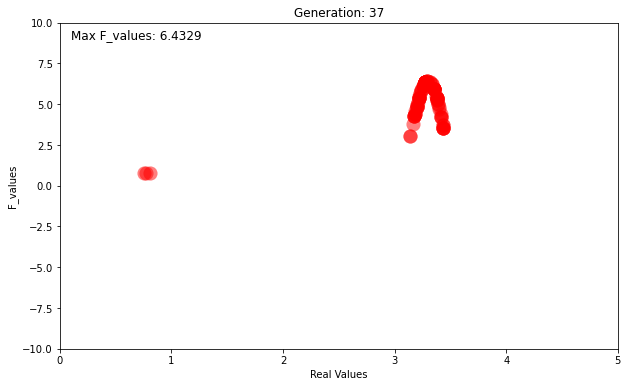

Generation: 37
Max F_values: 6.4329
Time for Generation 37: 0.0460 seconds



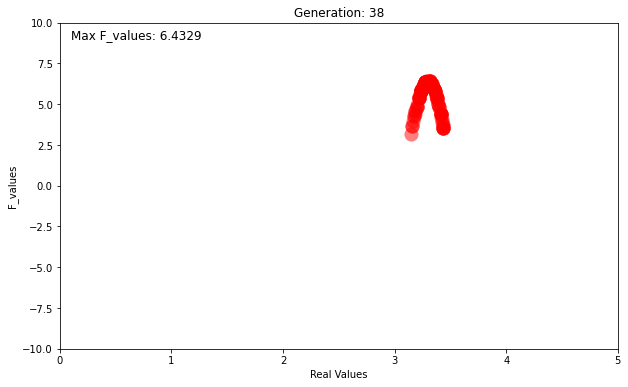

Generation: 38
Max F_values: 6.4329
Time for Generation 38: 0.0455 seconds



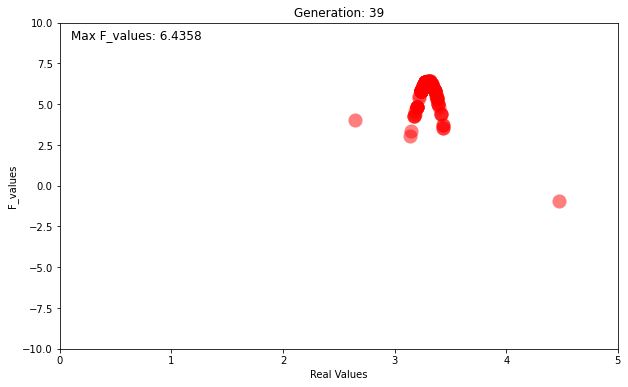

Generation: 39
Max F_values: 6.4358
Time for Generation 39: 0.0461 seconds



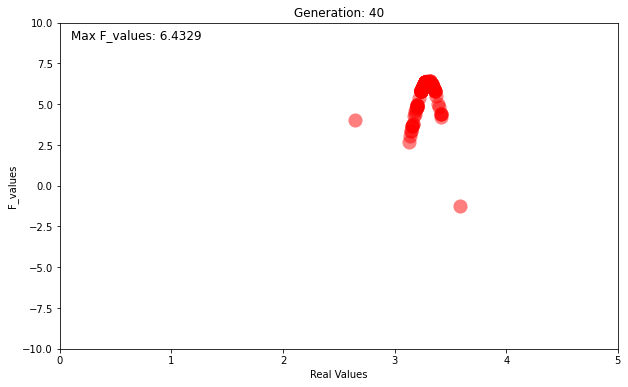

Generation: 40
Max F_values: 6.4329
Time for Generation 40: 0.0819 seconds



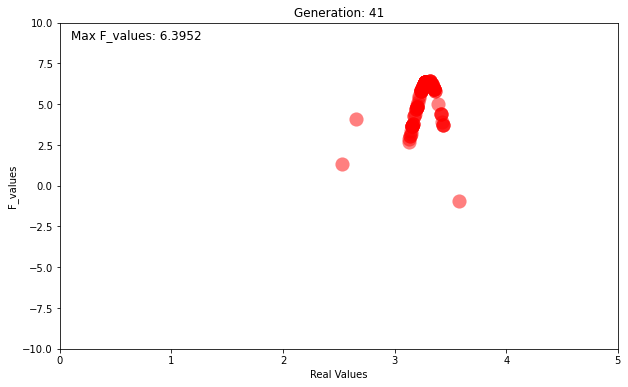

Generation: 41
Max F_values: 6.3952
Time for Generation 41: 0.0460 seconds



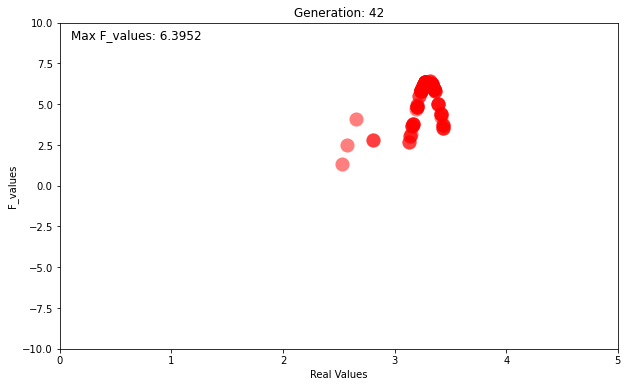

Generation: 42
Max F_values: 6.3952
Time for Generation 42: 0.0463 seconds



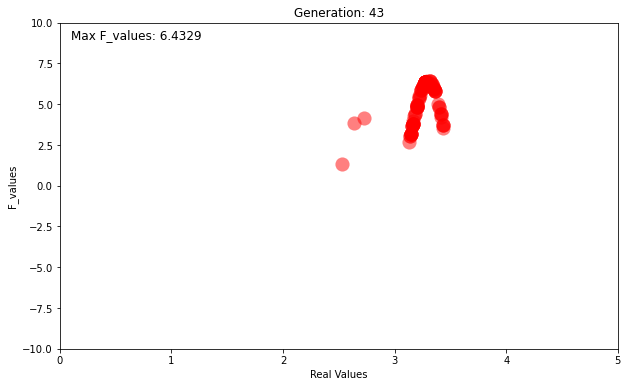

Generation: 43
Max F_values: 6.4329
Time for Generation 43: 0.0462 seconds



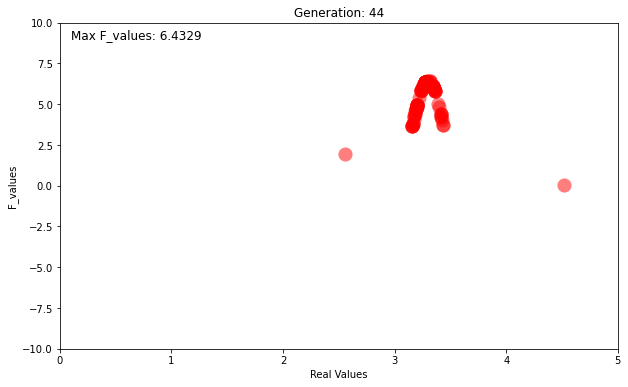

Generation: 44
Max F_values: 6.4329
Time for Generation 44: 0.0469 seconds



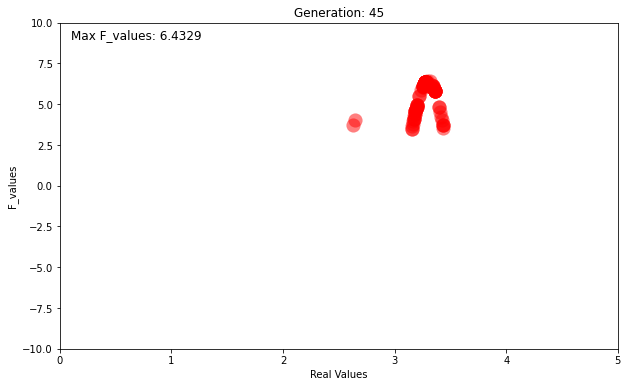

Generation: 45
Max F_values: 6.4329
Time for Generation 45: 0.0462 seconds



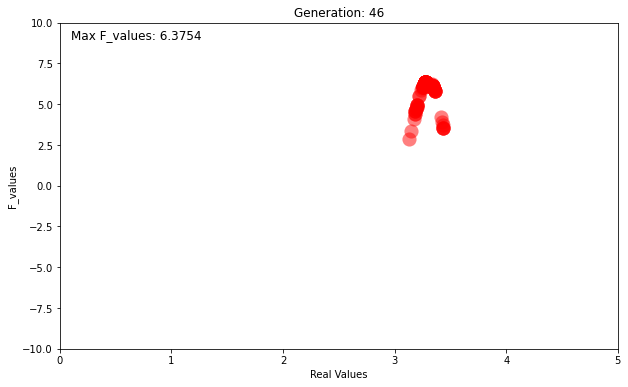

Generation: 46
Max F_values: 6.3754
Time for Generation 46: 0.0465 seconds



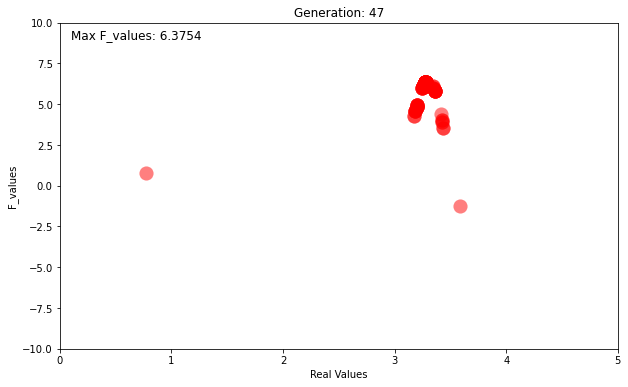

Generation: 47
Max F_values: 6.3754
Time for Generation 47: 0.0460 seconds



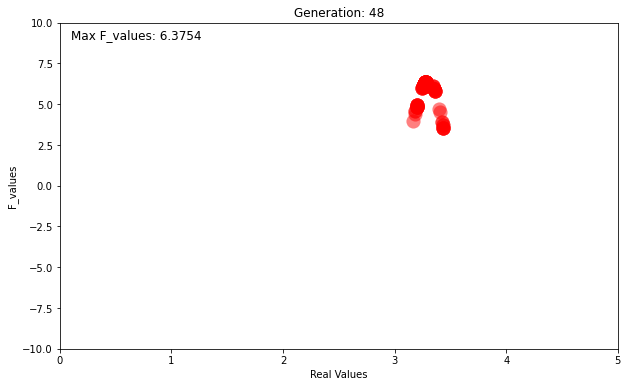

Generation: 48
Max F_values: 6.3754
Time for Generation 48: 0.0460 seconds



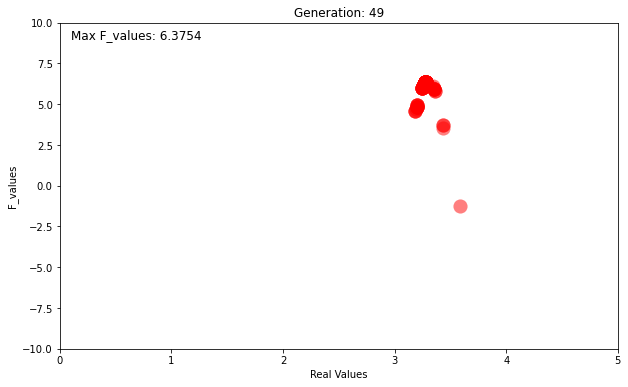

Generation: 49
Max F_values: 6.3754
Time for Generation 49: 0.0459 seconds



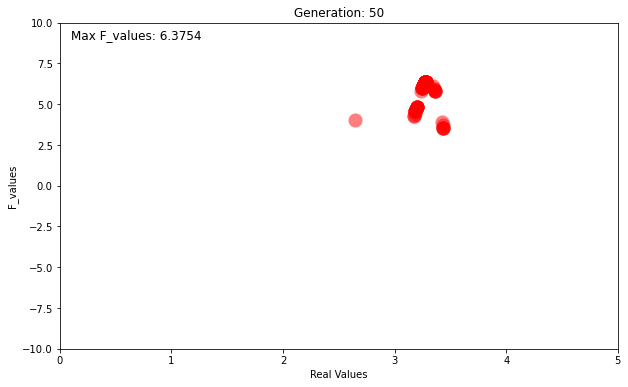

Generation: 50
Max F_values: 6.3754
Time for Generation 50: 0.0458 seconds



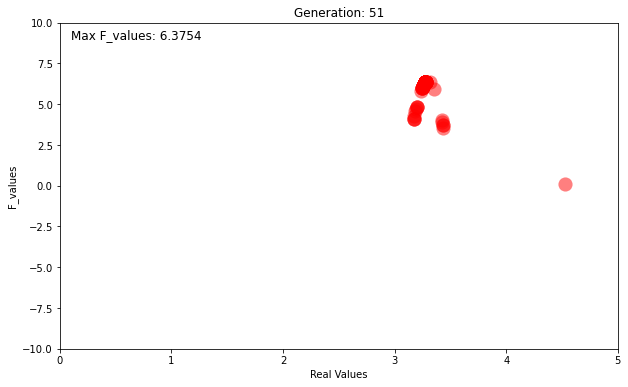

Generation: 51
Max F_values: 6.3754
Time for Generation 51: 0.0470 seconds



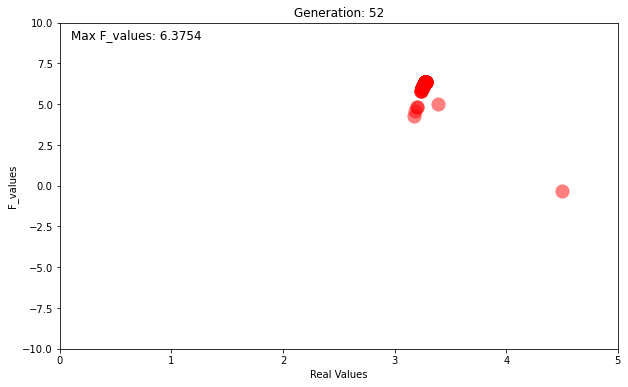

Generation: 52
Max F_values: 6.3754
Time for Generation 52: 0.0457 seconds



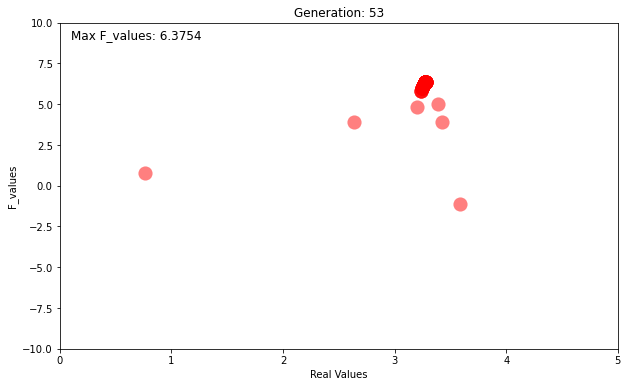

Generation: 53
Max F_values: 6.3754
Time for Generation 53: 0.0821 seconds



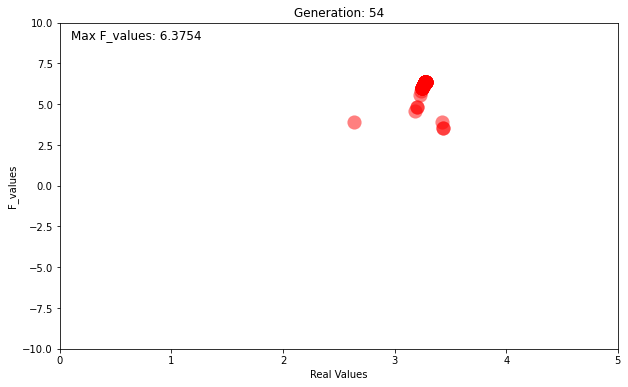

Generation: 54
Max F_values: 6.3754
Time for Generation 54: 0.0454 seconds



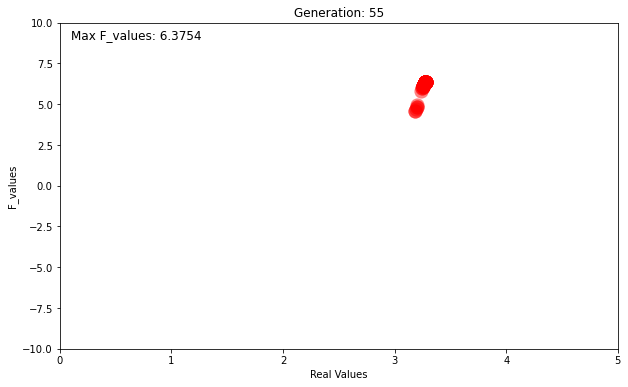

Generation: 55
Max F_values: 6.3754
Time for Generation 55: 0.0458 seconds



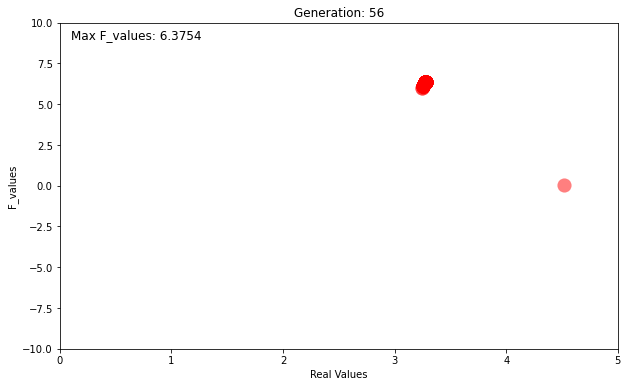

Generation: 56
Max F_values: 6.3754
Time for Generation 56: 0.0459 seconds



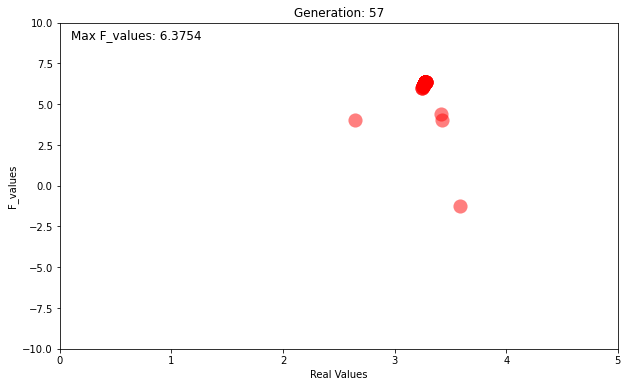

Generation: 57
Max F_values: 6.3754
Time for Generation 57: 0.0464 seconds



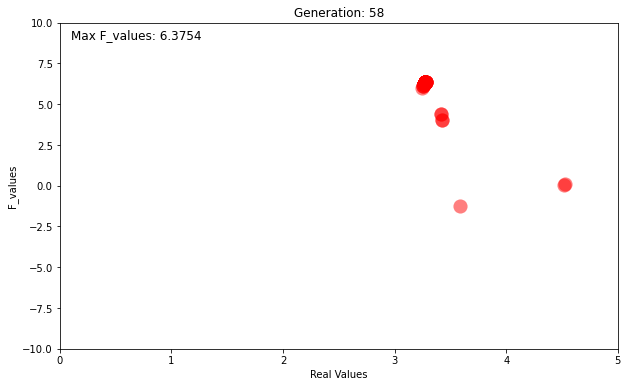

Generation: 58
Max F_values: 6.3754
Time for Generation 58: 0.0463 seconds



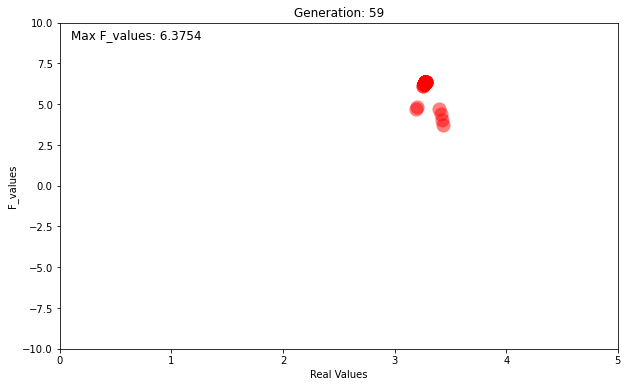

Generation: 59
Max F_values: 6.3754
Time for Generation 59: 0.0462 seconds



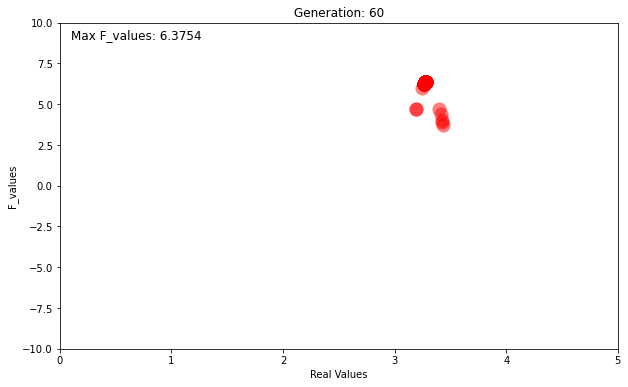

Generation: 60
Max F_values: 6.3754
Time for Generation 60: 0.0446 seconds



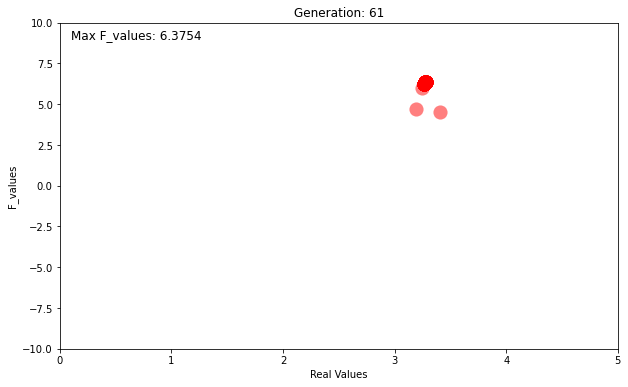

Generation: 61
Max F_values: 6.3754
Time for Generation 61: 0.0461 seconds



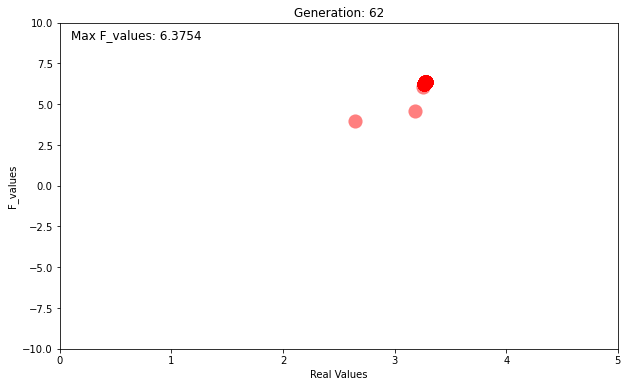

Generation: 62
Max F_values: 6.3754
Time for Generation 62: 0.0460 seconds



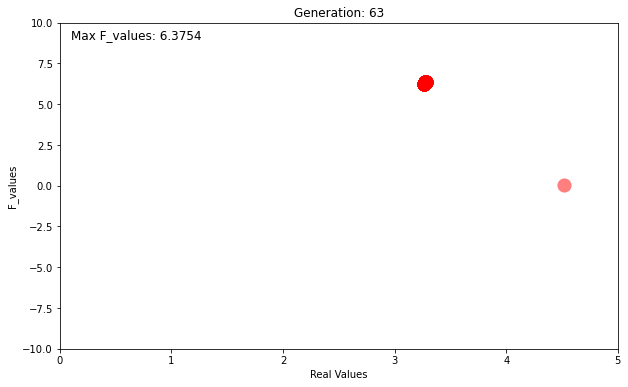

Generation: 63
Max F_values: 6.3754
Time for Generation 63: 0.0455 seconds



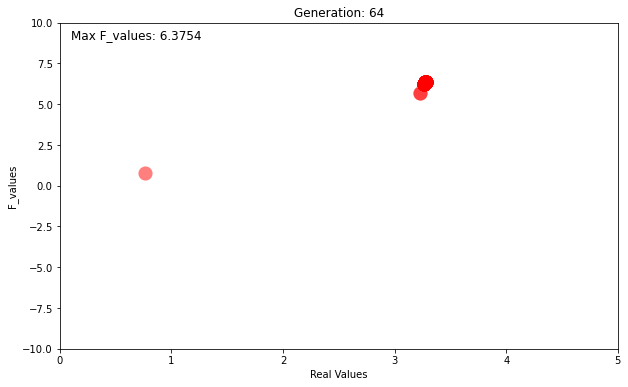

Generation: 64
Max F_values: 6.3754
Time for Generation 64: 0.0461 seconds



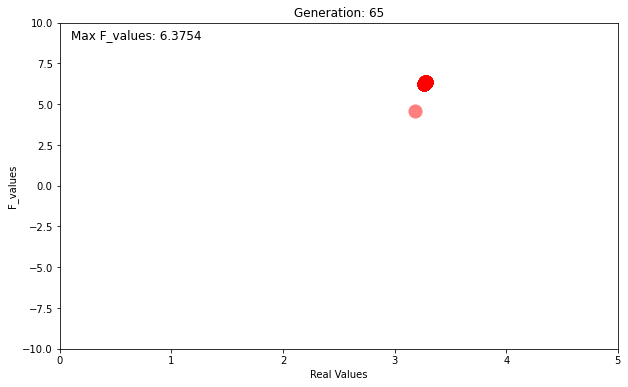

Generation: 65
Max F_values: 6.3754
Time for Generation 65: 0.0457 seconds



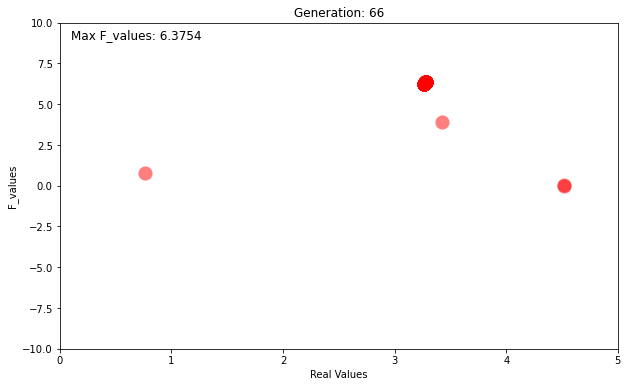

Generation: 66
Max F_values: 6.3754
Time for Generation 66: 0.0835 seconds



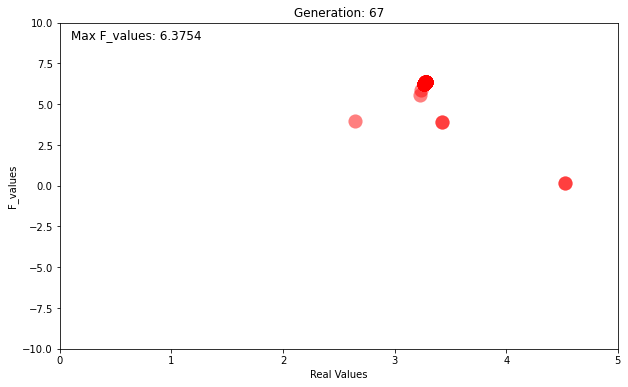

Generation: 67
Max F_values: 6.3754
Time for Generation 67: 0.0487 seconds



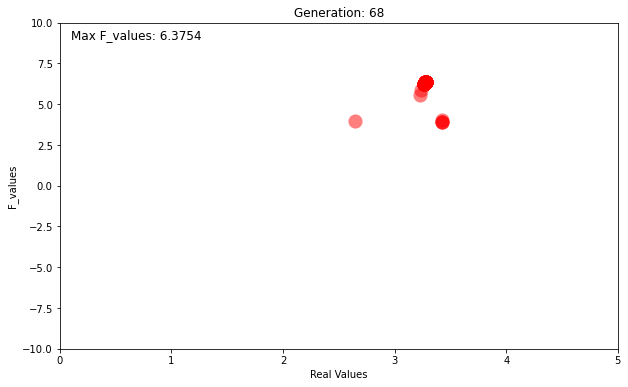

Generation: 68
Max F_values: 6.3754
Time for Generation 68: 0.0491 seconds



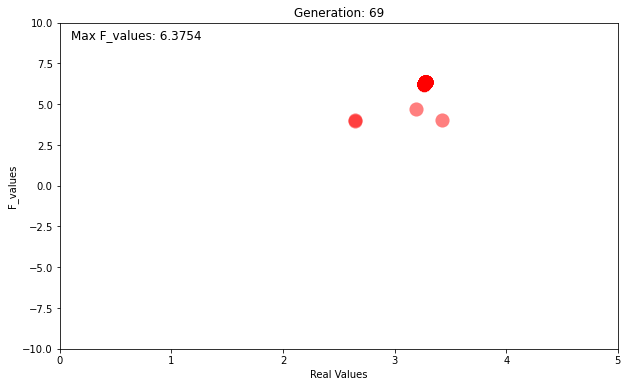

Generation: 69
Max F_values: 6.3754
Time for Generation 69: 0.0461 seconds



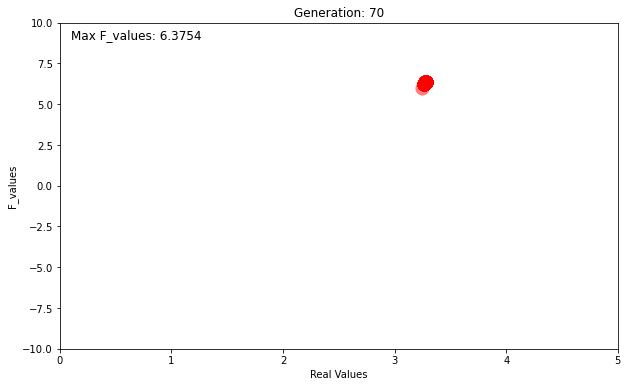

Generation: 70
Max F_values: 6.3754
Time for Generation 70: 0.0458 seconds



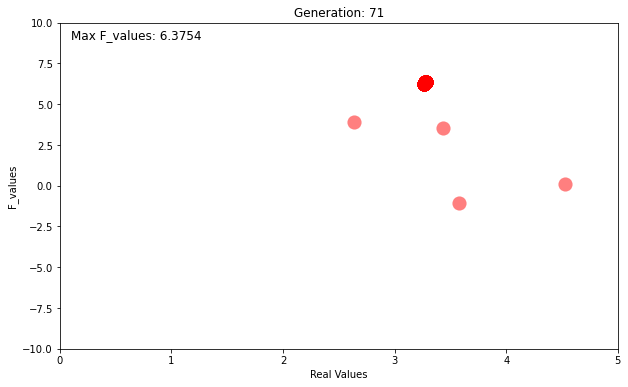

Generation: 71
Max F_values: 6.3754
Time for Generation 71: 0.0461 seconds



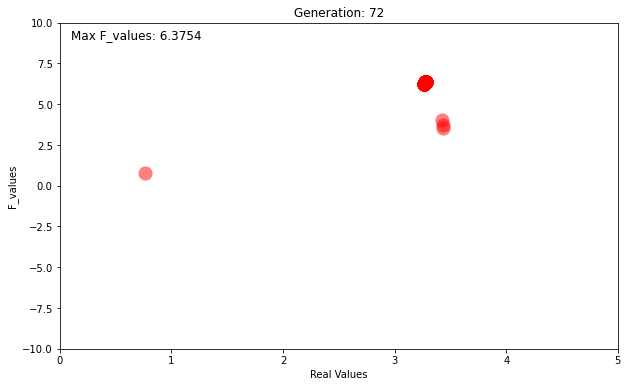

Generation: 72
Max F_values: 6.3754
Time for Generation 72: 0.0460 seconds



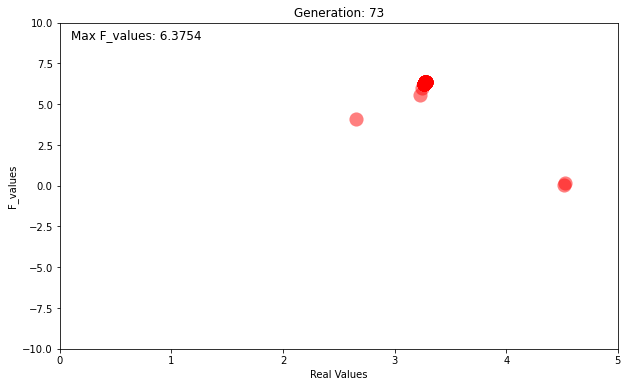

Generation: 73
Max F_values: 6.3754
Time for Generation 73: 0.0470 seconds



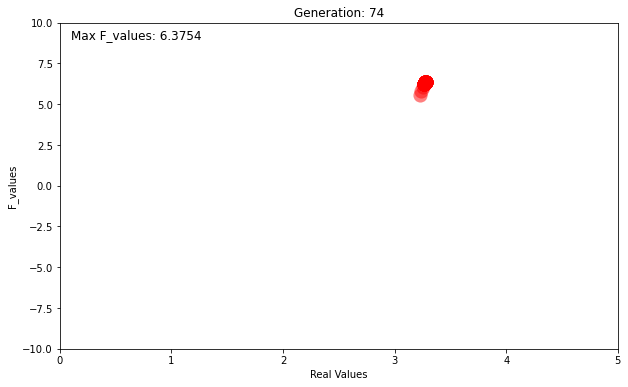

Generation: 74
Max F_values: 6.3754
Time for Generation 74: 0.0448 seconds



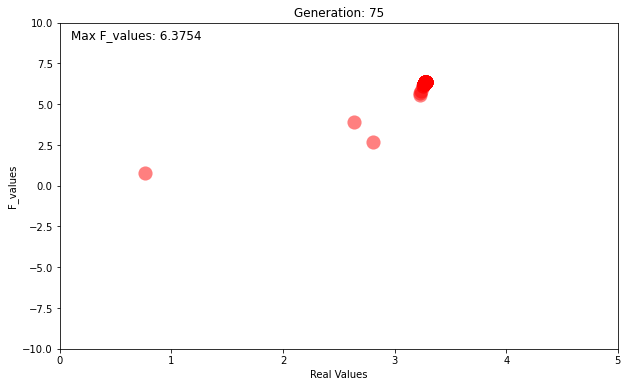

Generation: 75
Max F_values: 6.3754
Time for Generation 75: 0.0458 seconds



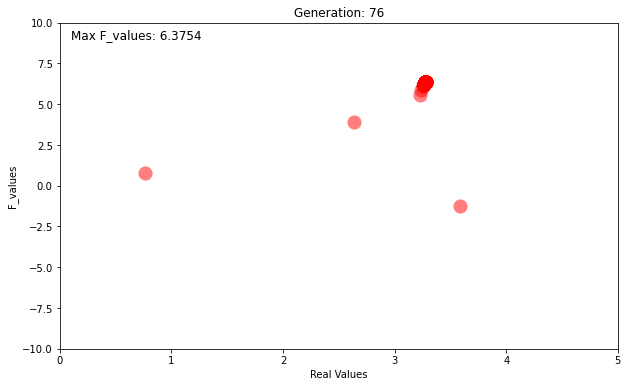

Generation: 76
Max F_values: 6.3754
Time for Generation 76: 0.0439 seconds



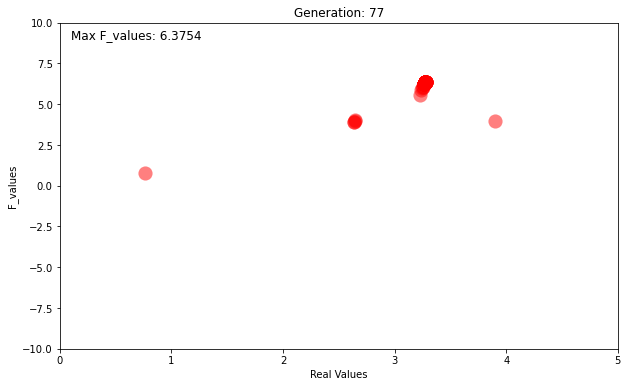

Generation: 77
Max F_values: 6.3754
Time for Generation 77: 0.0438 seconds



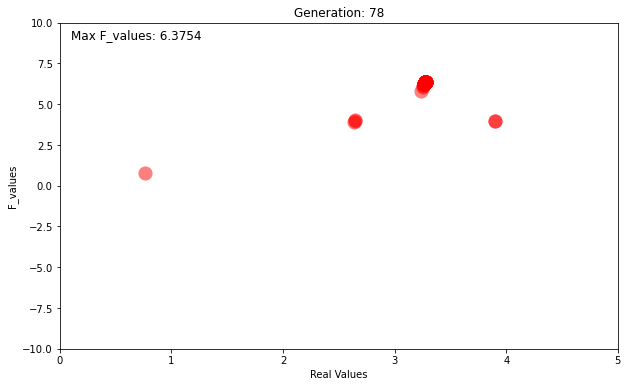

Generation: 78
Max F_values: 6.3754
Time for Generation 78: 0.0440 seconds



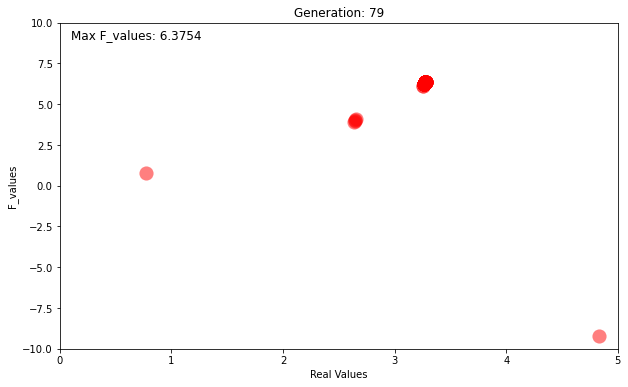

Generation: 79
Max F_values: 6.3754
Time for Generation 79: 0.0838 seconds



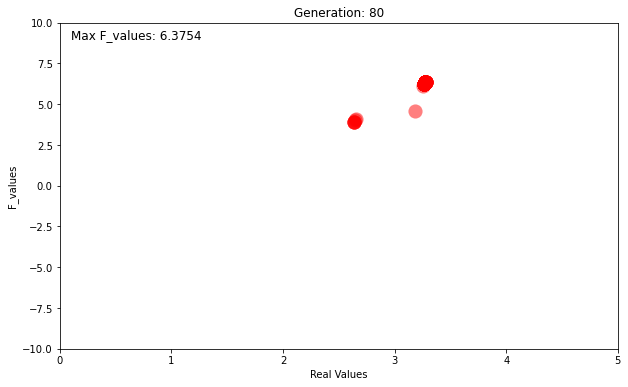

Generation: 80
Max F_values: 6.3754
Time for Generation 80: 0.0458 seconds



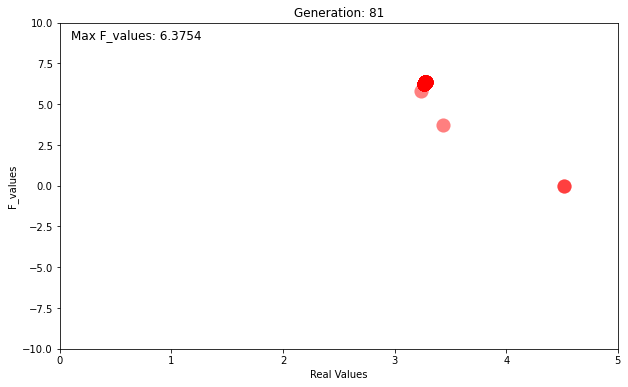

Generation: 81
Max F_values: 6.3754
Time for Generation 81: 0.0448 seconds



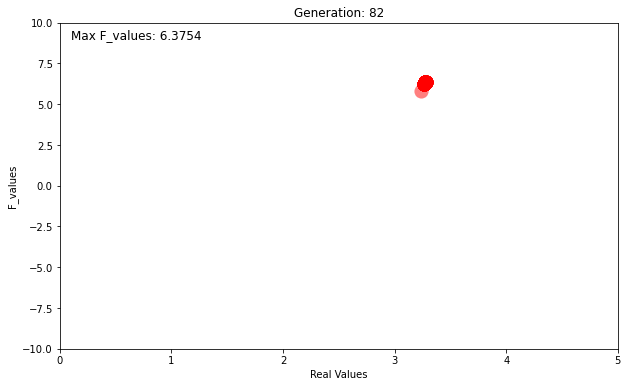

Generation: 82
Max F_values: 6.3754
Time for Generation 82: 0.0442 seconds



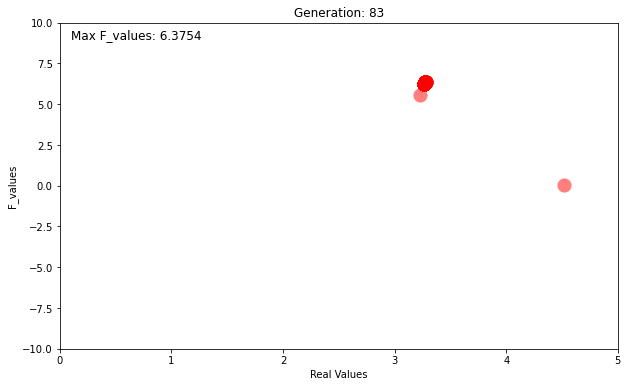

Generation: 83
Max F_values: 6.3754
Time for Generation 83: 0.0448 seconds



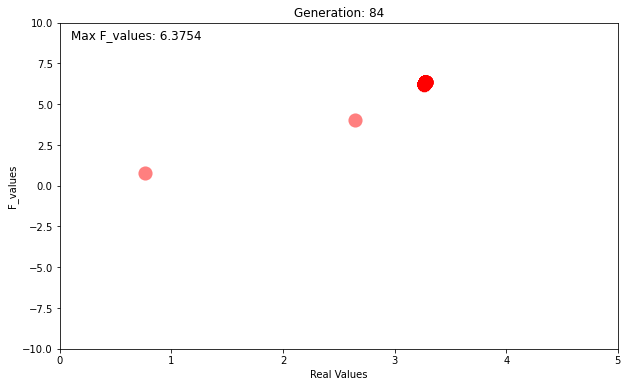

Generation: 84
Max F_values: 6.3754
Time for Generation 84: 0.0451 seconds



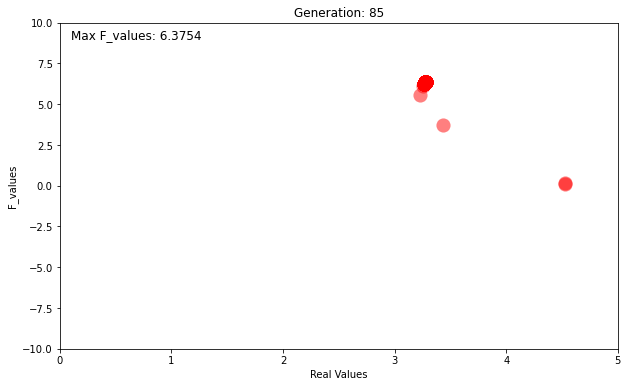

Generation: 85
Max F_values: 6.3754
Time for Generation 85: 0.0447 seconds



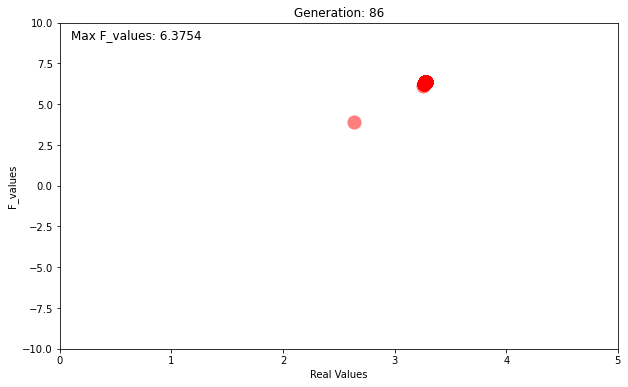

Generation: 86
Max F_values: 6.3754
Time for Generation 86: 0.0450 seconds



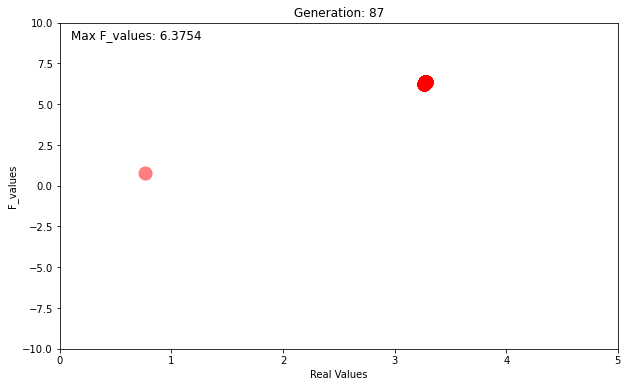

Generation: 87
Max F_values: 6.3754
Time for Generation 87: 0.0444 seconds



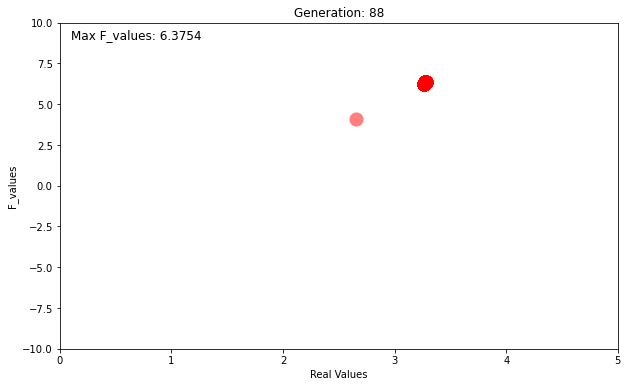

Generation: 88
Max F_values: 6.3754
Time for Generation 88: 0.0443 seconds



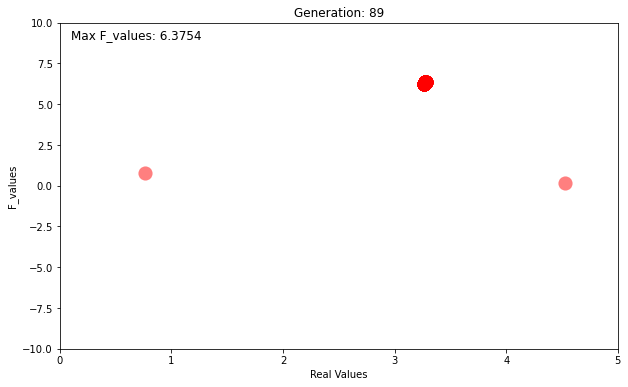

Generation: 89
Max F_values: 6.3754
Time for Generation 89: 0.0456 seconds



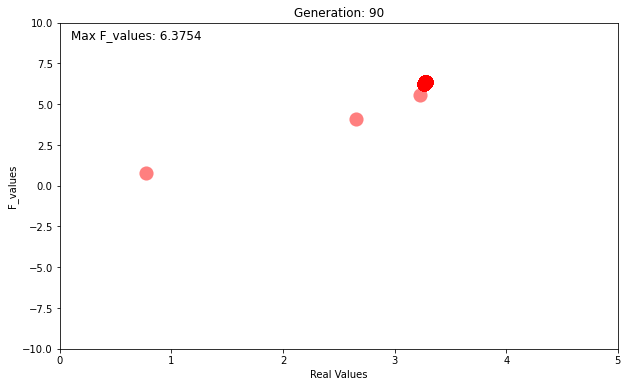

Generation: 90
Max F_values: 6.3754
Time for Generation 90: 0.0443 seconds



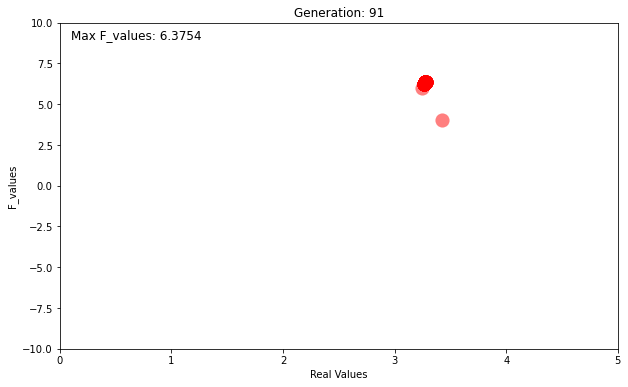

Generation: 91
Max F_values: 6.3754
Time for Generation 91: 0.0442 seconds



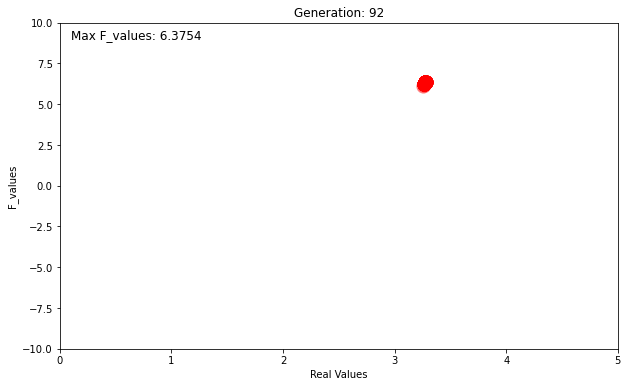

Generation: 92
Max F_values: 6.3754
Time for Generation 92: 0.0808 seconds



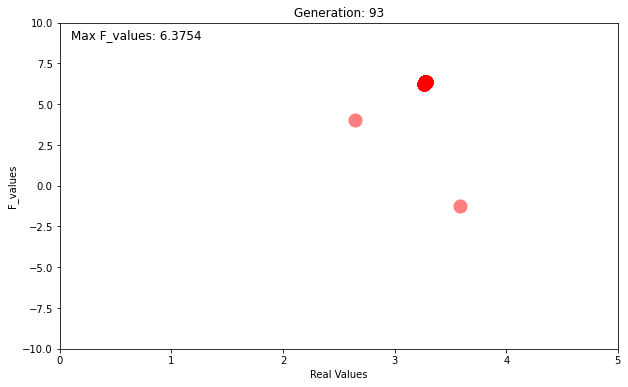

Generation: 93
Max F_values: 6.3754
Time for Generation 93: 0.0442 seconds



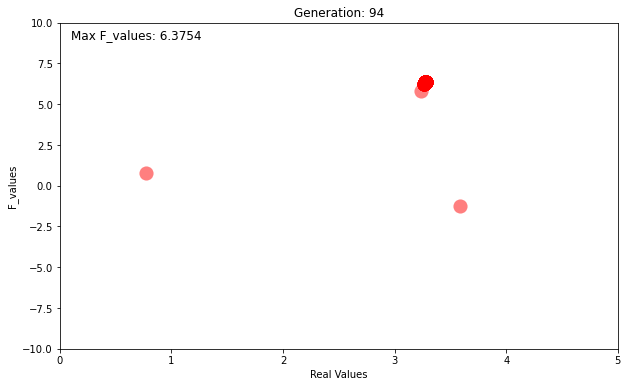

Generation: 94
Max F_values: 6.3754
Time for Generation 94: 0.0488 seconds



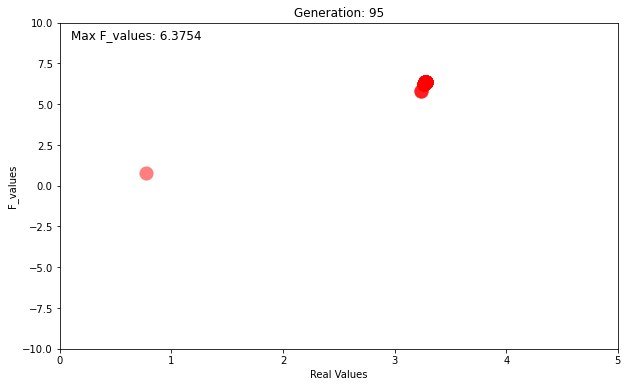

Generation: 95
Max F_values: 6.3754
Time for Generation 95: 0.0453 seconds



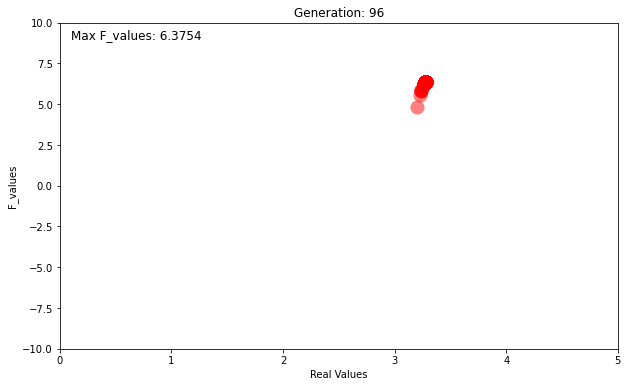

Generation: 96
Max F_values: 6.3754
Time for Generation 96: 0.0445 seconds



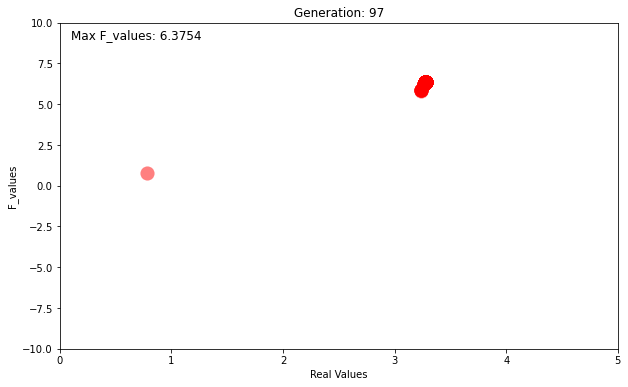

Generation: 97
Max F_values: 6.3754
Time for Generation 97: 0.0457 seconds



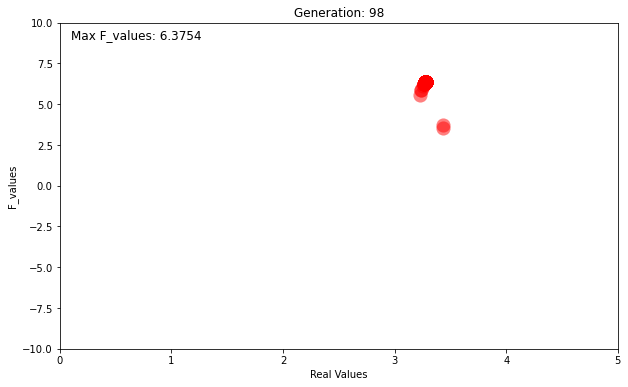

Generation: 98
Max F_values: 6.3754
Time for Generation 98: 0.0453 seconds



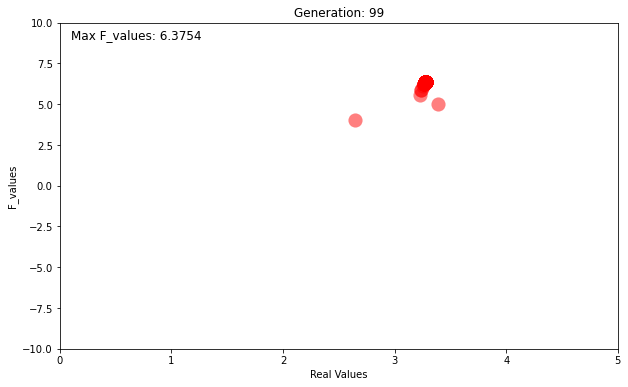

Generation: 99
Max F_values: 6.3754
Time for Generation 99: 0.0471 seconds



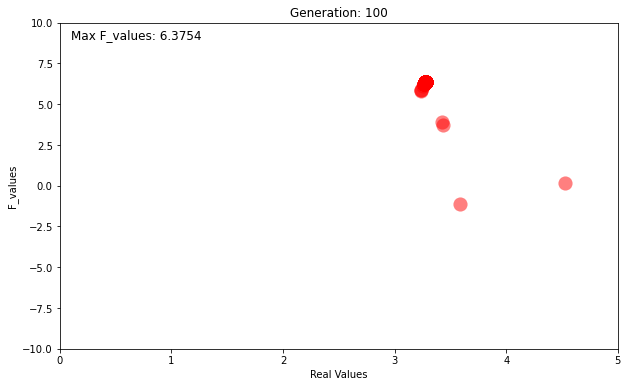

Generation: 100
Max F_values: 6.3754
Time for Generation 100: 0.0455 seconds



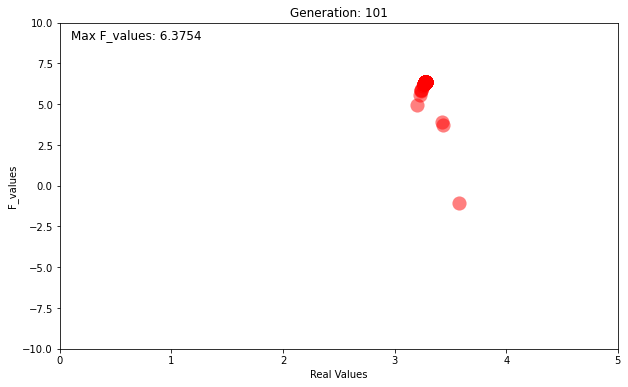

Generation: 101
Max F_values: 6.3754
Time for Generation 101: 0.0492 seconds



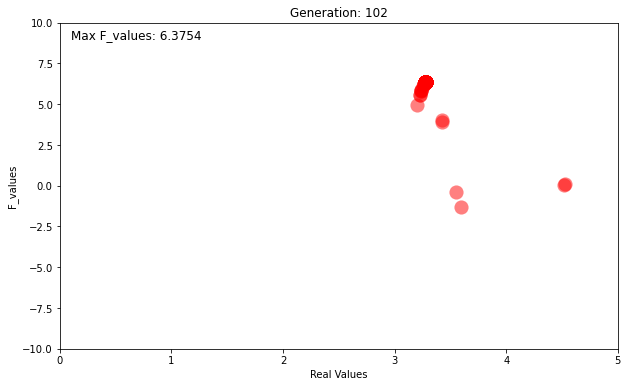

Generation: 102
Max F_values: 6.3754
Time for Generation 102: 0.0446 seconds



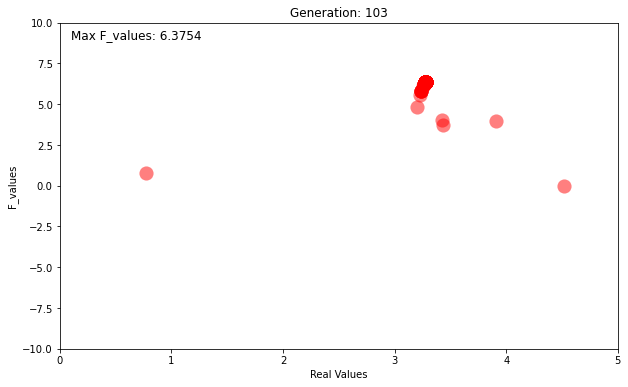

Generation: 103
Max F_values: 6.3754
Time for Generation 103: 0.0504 seconds



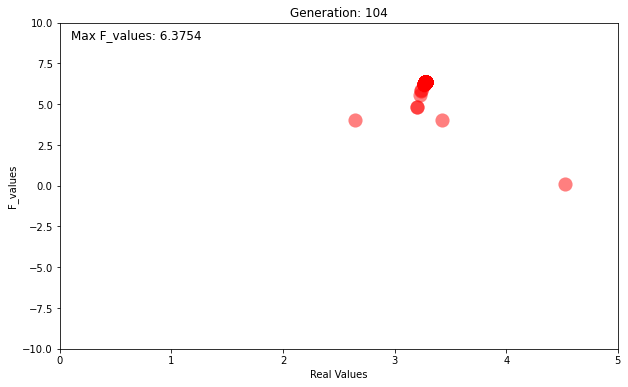

Generation: 104
Max F_values: 6.3754
Time for Generation 104: 0.0447 seconds



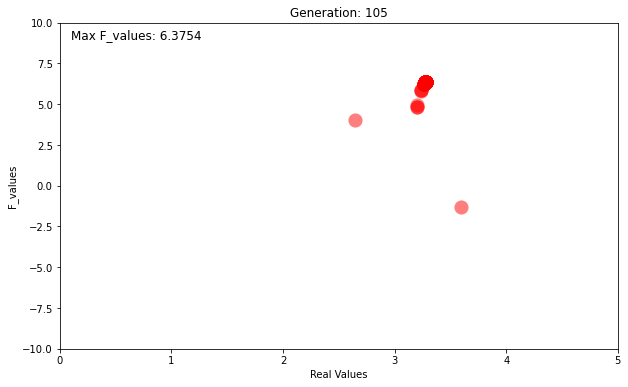

Generation: 105
Max F_values: 6.3754
Time for Generation 105: 0.1024 seconds



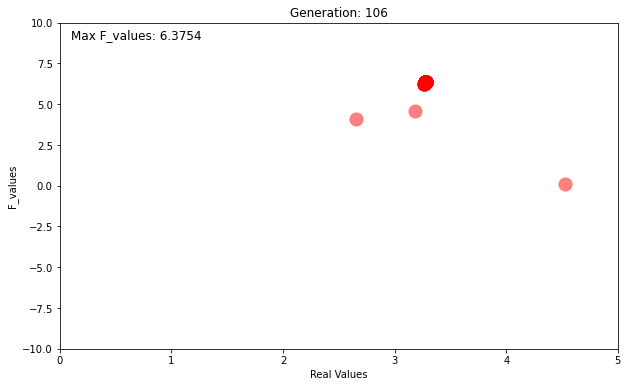

Generation: 106
Max F_values: 6.3754
Time for Generation 106: 0.0503 seconds



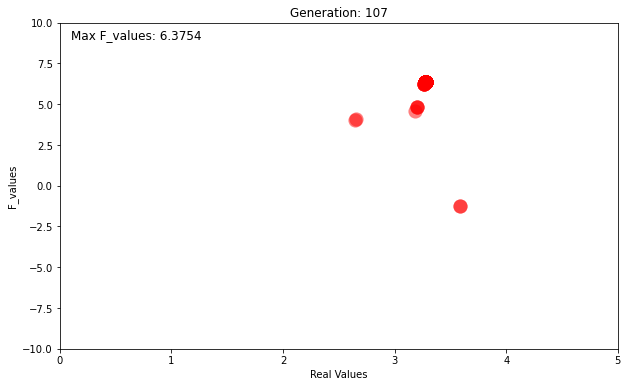

Generation: 107
Max F_values: 6.3754
Time for Generation 107: 0.0465 seconds



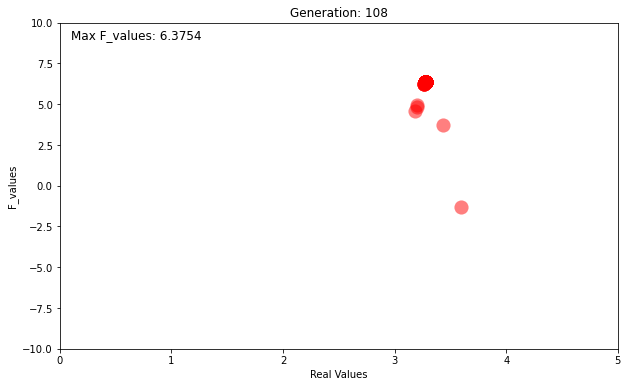

Generation: 108
Max F_values: 6.3754
Time for Generation 108: 0.0477 seconds



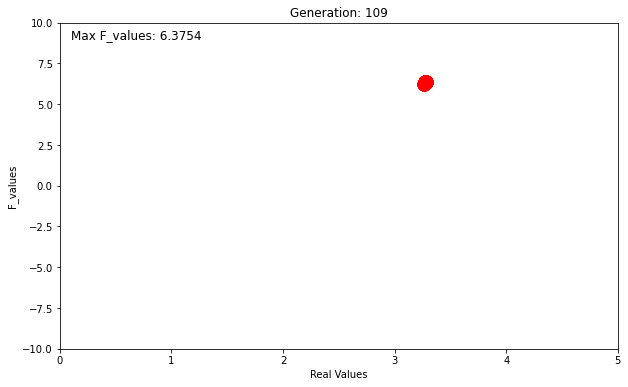

Generation: 109
Max F_values: 6.3754
Time for Generation 109: 0.0503 seconds



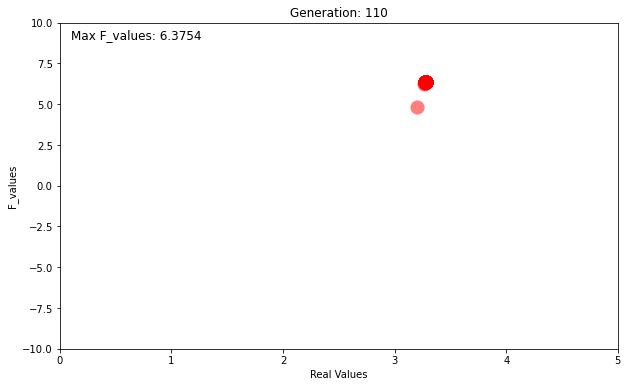

Generation: 110
Max F_values: 6.3754
Time for Generation 110: 0.0457 seconds



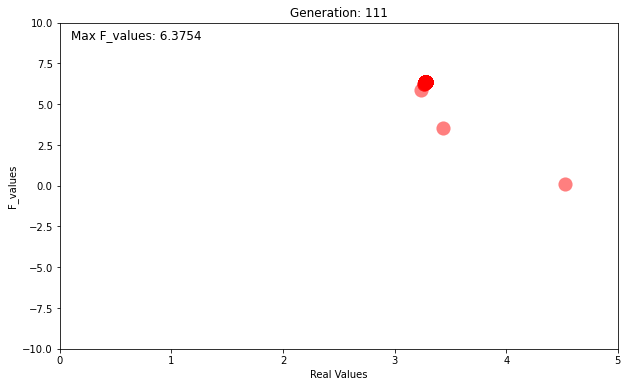

Generation: 111
Max F_values: 6.3754
Time for Generation 111: 0.0474 seconds



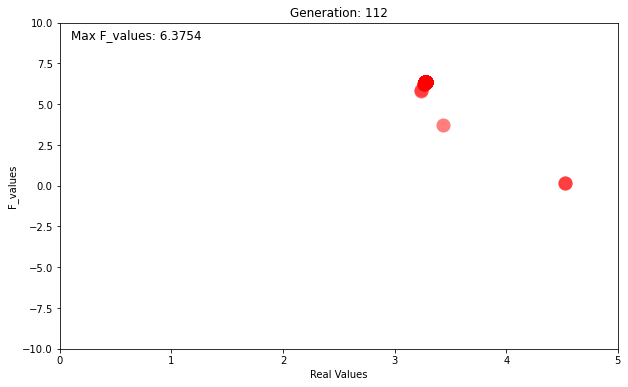

Generation: 112
Max F_values: 6.3754
Time for Generation 112: 0.0496 seconds



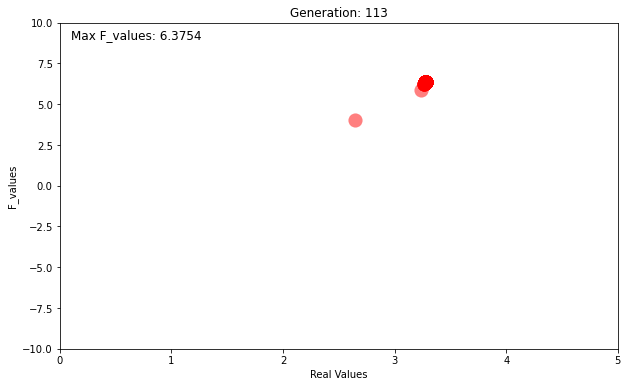

Generation: 113
Max F_values: 6.3754
Time for Generation 113: 0.0462 seconds



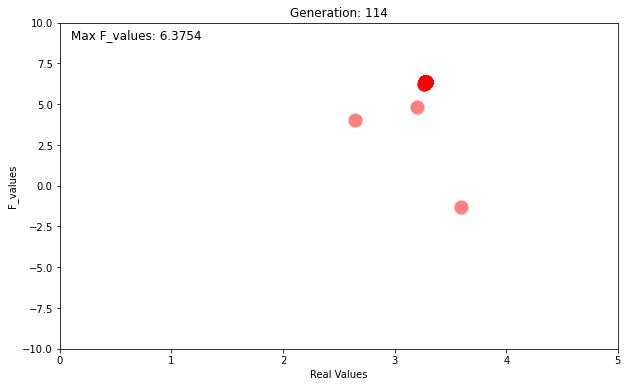

Generation: 114
Max F_values: 6.3754
Time for Generation 114: 0.0483 seconds



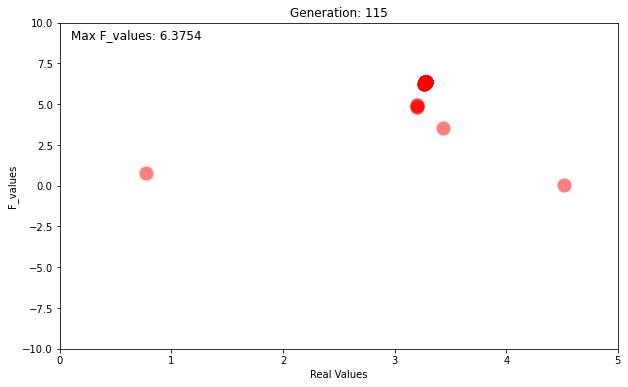

Generation: 115
Max F_values: 6.3754
Time for Generation 115: 0.0498 seconds



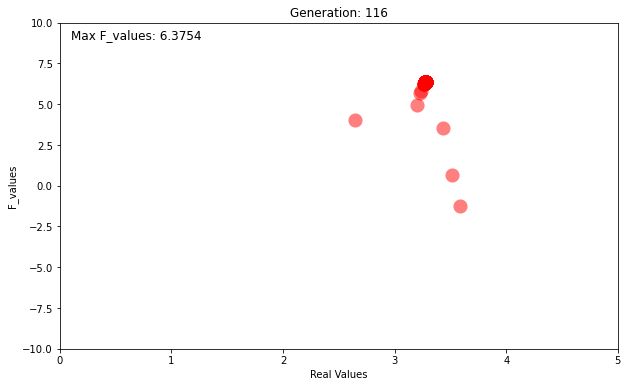

Generation: 116
Max F_values: 6.3754
Time for Generation 116: 0.0472 seconds



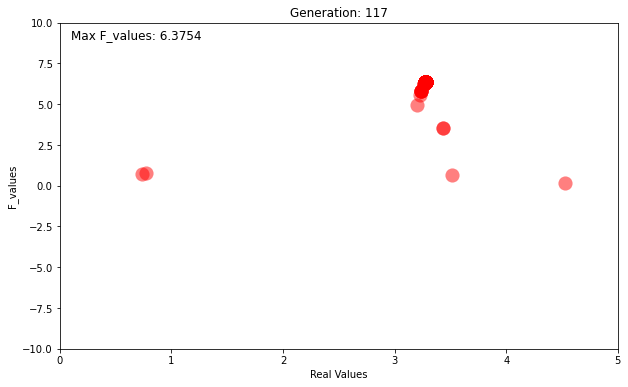

Generation: 117
Max F_values: 6.3754
Time for Generation 117: 0.0454 seconds



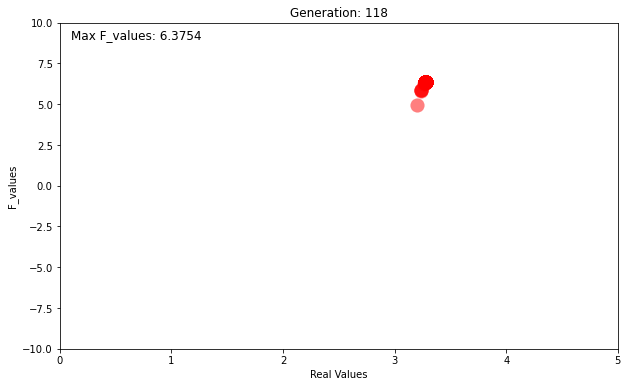

Generation: 118
Max F_values: 6.3754
Time for Generation 118: 0.0827 seconds



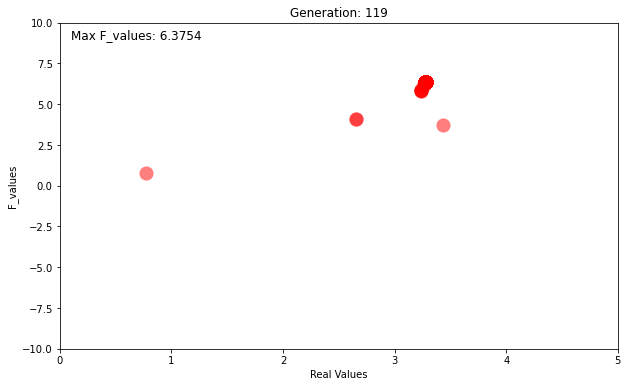

Generation: 119
Max F_values: 6.3754
Time for Generation 119: 0.0490 seconds



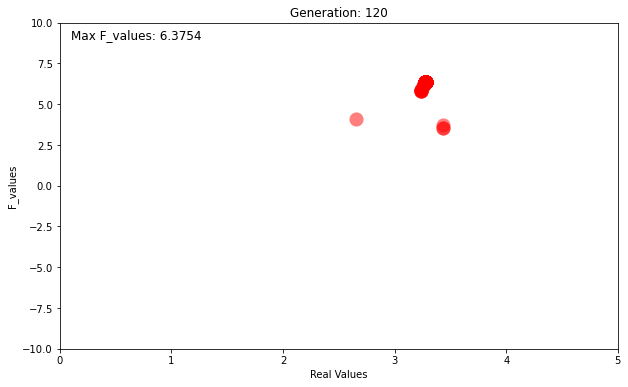

Generation: 120
Max F_values: 6.3754
Time for Generation 120: 0.0455 seconds



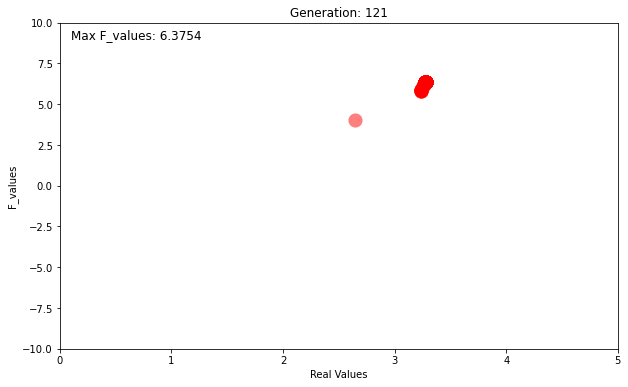

Generation: 121
Max F_values: 6.3754
Time for Generation 121: 0.0452 seconds



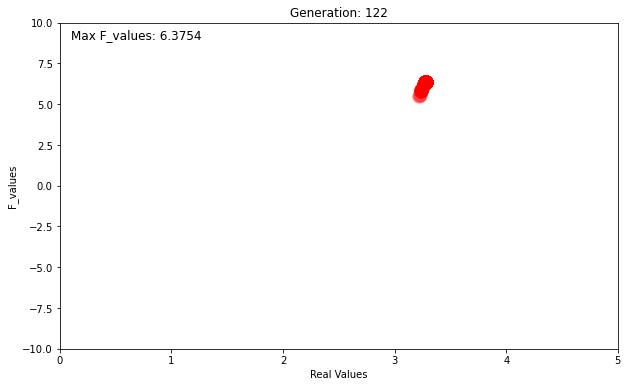

Generation: 122
Max F_values: 6.3754
Time for Generation 122: 0.0462 seconds



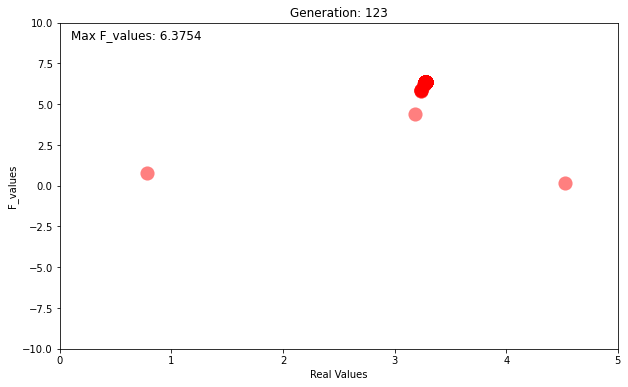

Generation: 123
Max F_values: 6.3754
Time for Generation 123: 0.0475 seconds



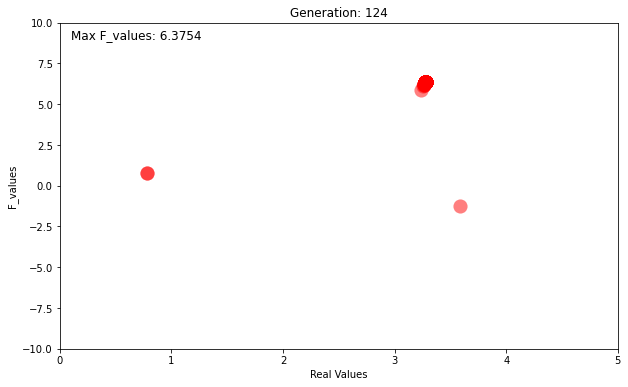

Generation: 124
Max F_values: 6.3754
Time for Generation 124: 0.0473 seconds



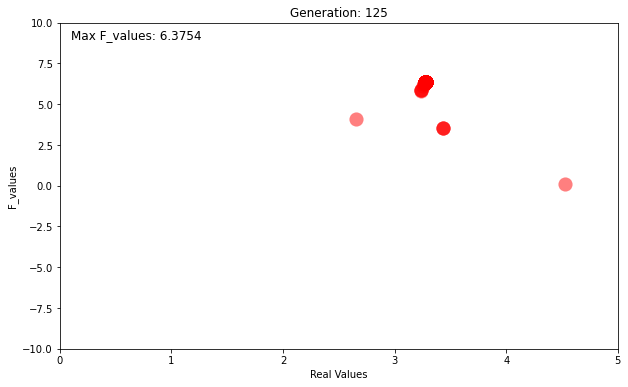

Generation: 125
Max F_values: 6.3754
Time for Generation 125: 0.0454 seconds



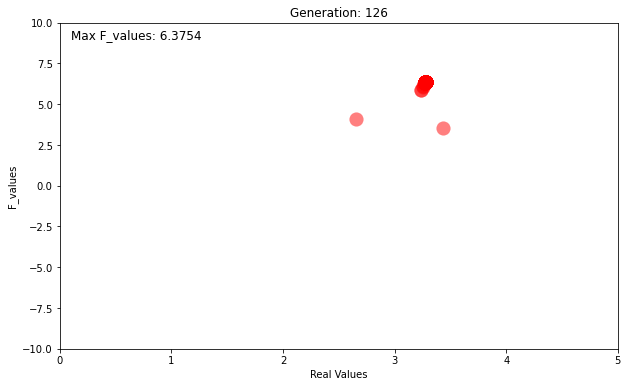

Generation: 126
Max F_values: 6.3754
Time for Generation 126: 0.0447 seconds



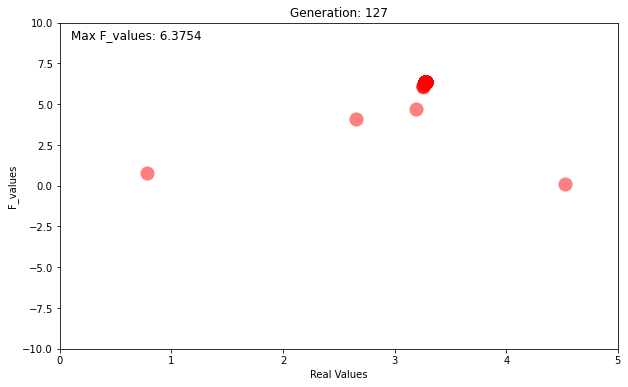

Generation: 127
Max F_values: 6.3754
Time for Generation 127: 0.0487 seconds



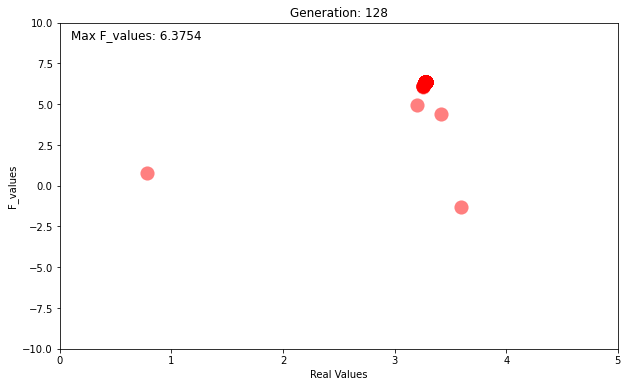

Generation: 128
Max F_values: 6.3754
Time for Generation 128: 0.0465 seconds



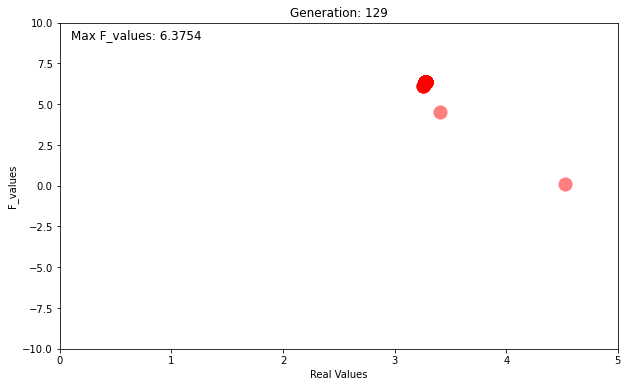

Generation: 129
Max F_values: 6.3754
Time for Generation 129: 0.0537 seconds



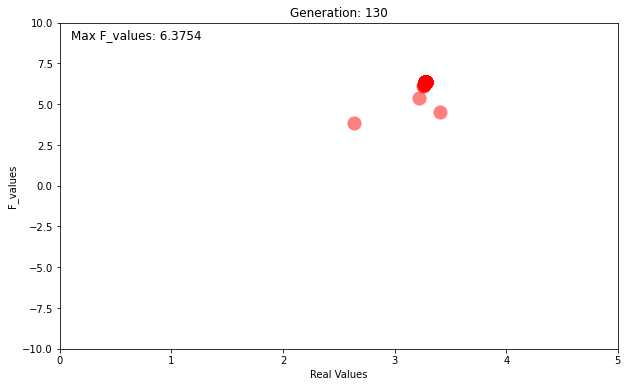

Generation: 130
Max F_values: 6.3754
Time for Generation 130: 0.0476 seconds



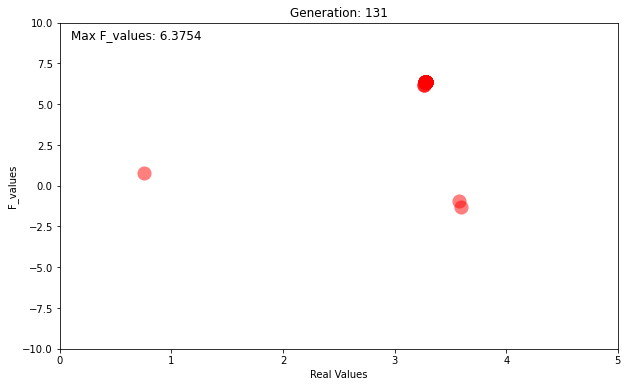

Generation: 131
Max F_values: 6.3754
Time for Generation 131: 0.0845 seconds



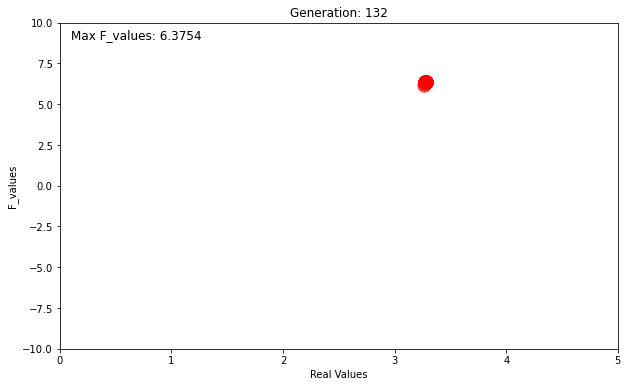

Generation: 132
Max F_values: 6.3754
Time for Generation 132: 0.0454 seconds



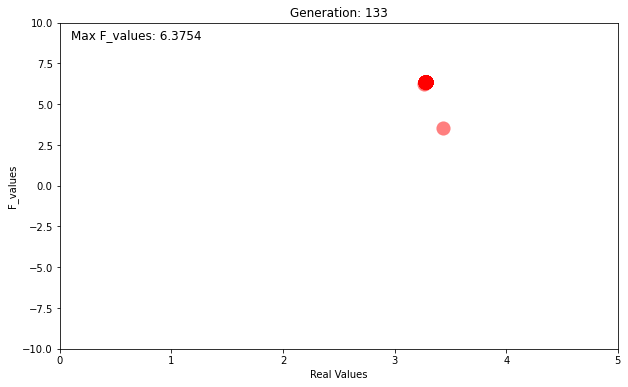

Generation: 133
Max F_values: 6.3754
Time for Generation 133: 0.0700 seconds



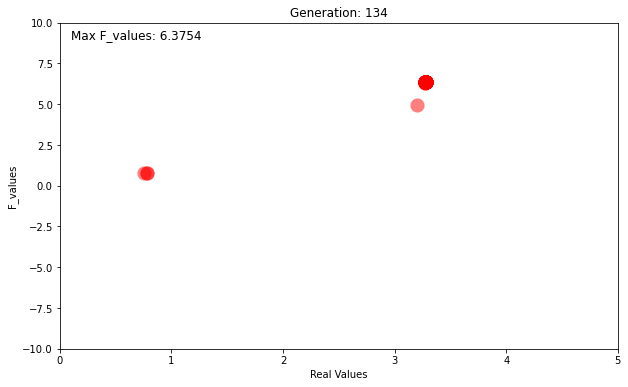

Generation: 134
Max F_values: 6.3754
Time for Generation 134: 0.0480 seconds



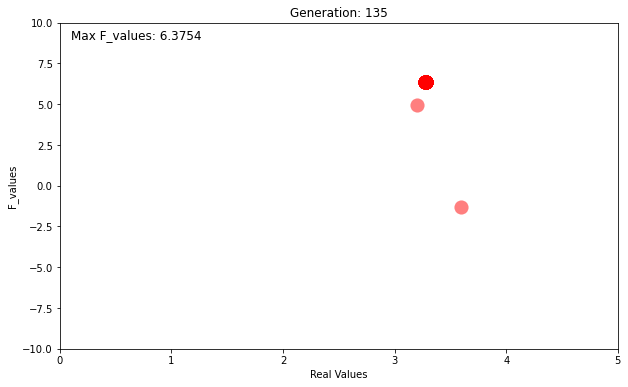

Generation: 135
Max F_values: 6.3754
Time for Generation 135: 0.0491 seconds



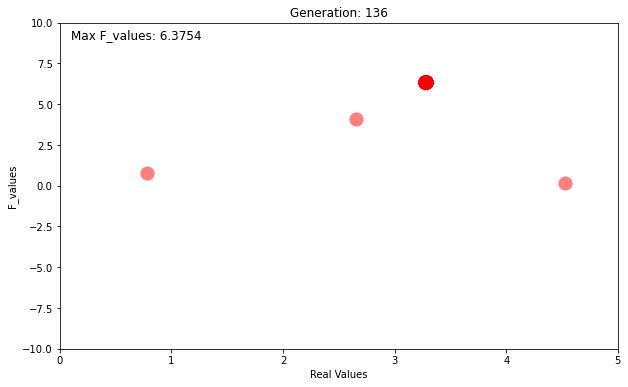

Generation: 136
Max F_values: 6.3754
Time for Generation 136: 0.0477 seconds



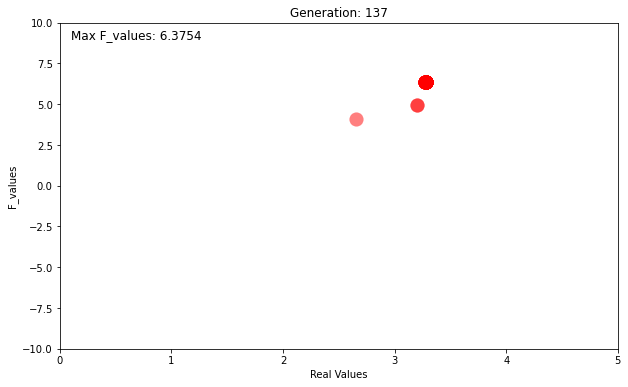

Generation: 137
Max F_values: 6.3754
Time for Generation 137: 0.0474 seconds



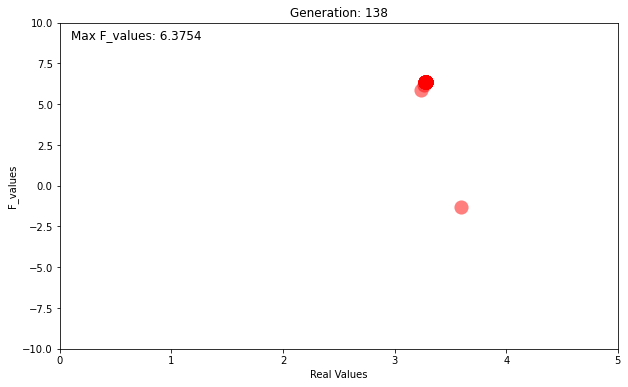

Generation: 138
Max F_values: 6.3754
Time for Generation 138: 0.0464 seconds



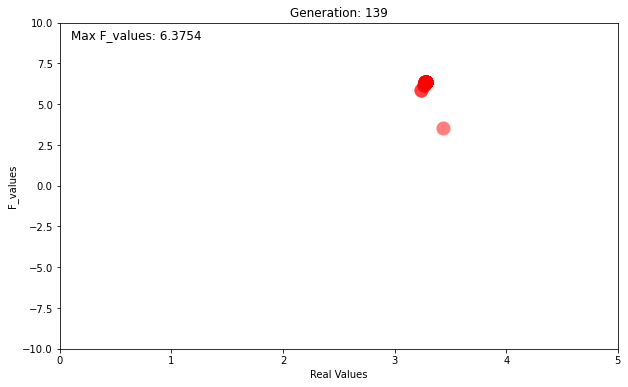

Generation: 139
Max F_values: 6.3754
Time for Generation 139: 0.0586 seconds



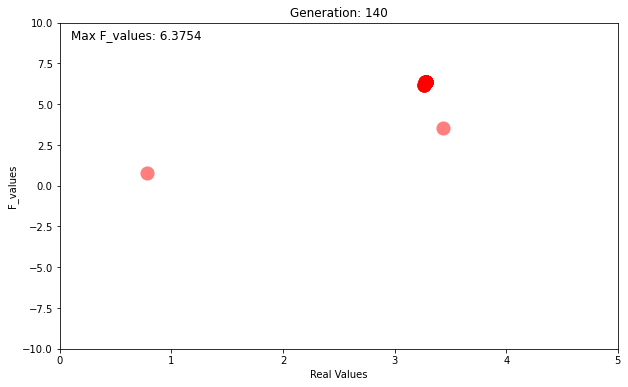

Generation: 140
Max F_values: 6.3754
Time for Generation 140: 0.0463 seconds



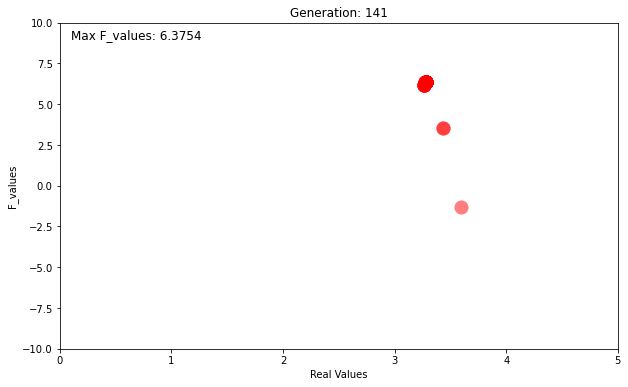

Generation: 141
Max F_values: 6.3754
Time for Generation 141: 0.0456 seconds



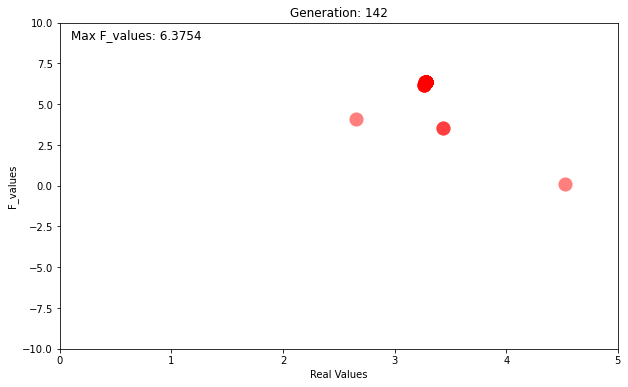

Generation: 142
Max F_values: 6.3754
Time for Generation 142: 0.0465 seconds



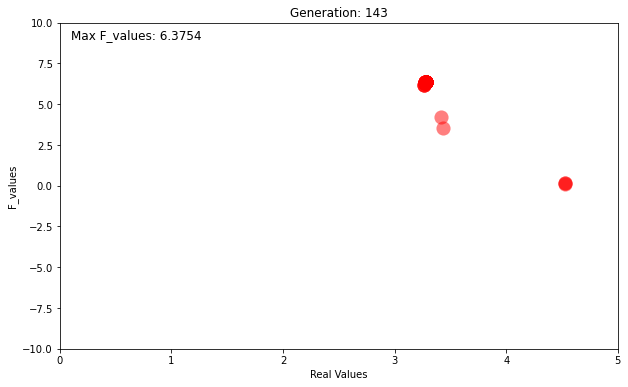

Generation: 143
Max F_values: 6.3754
Time for Generation 143: 0.0497 seconds



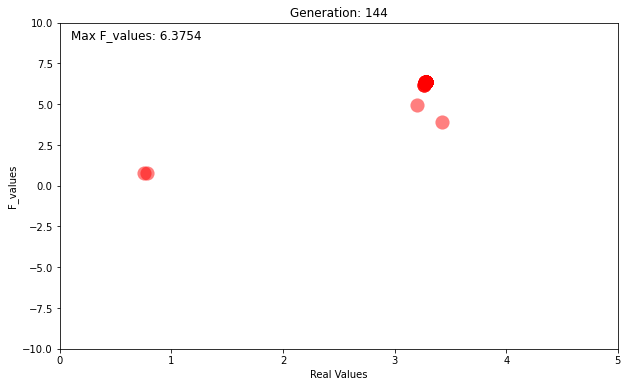

Generation: 144
Max F_values: 6.3754
Time for Generation 144: 0.0936 seconds



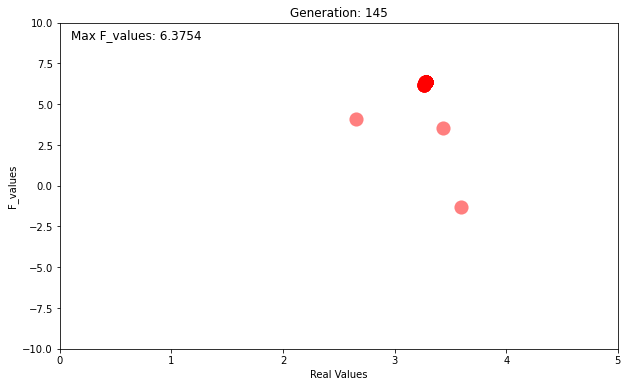

Generation: 145
Max F_values: 6.3754
Time for Generation 145: 0.0464 seconds



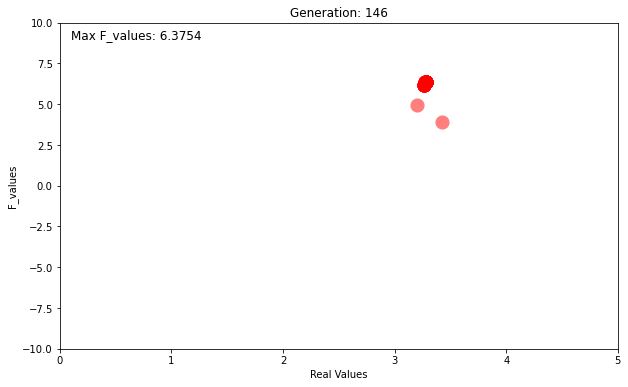

Generation: 146
Max F_values: 6.3754
Time for Generation 146: 0.0454 seconds



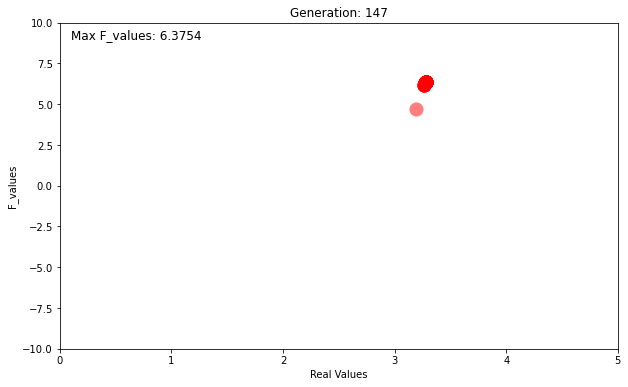

Generation: 147
Max F_values: 6.3754
Time for Generation 147: 0.0497 seconds



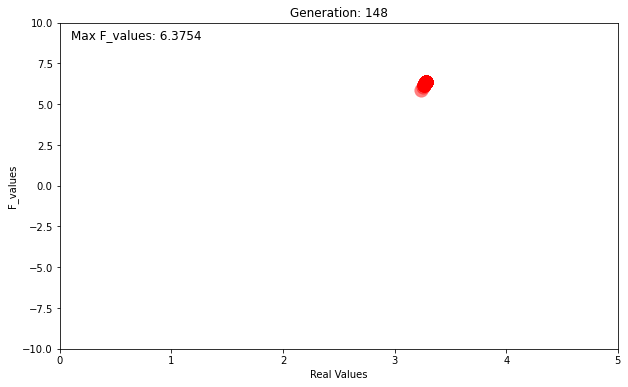

Generation: 148
Max F_values: 6.3754
Time for Generation 148: 0.0459 seconds



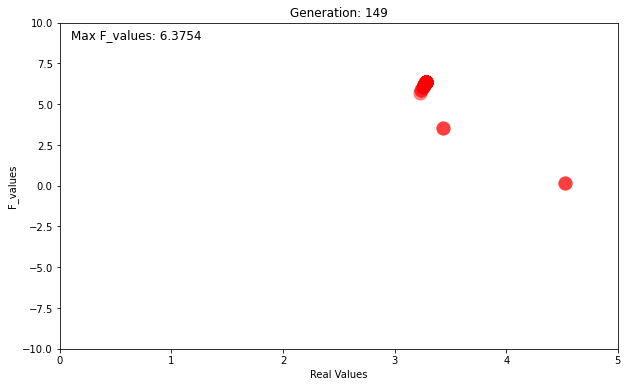

Generation: 149
Max F_values: 6.3754
Time for Generation 149: 0.0468 seconds



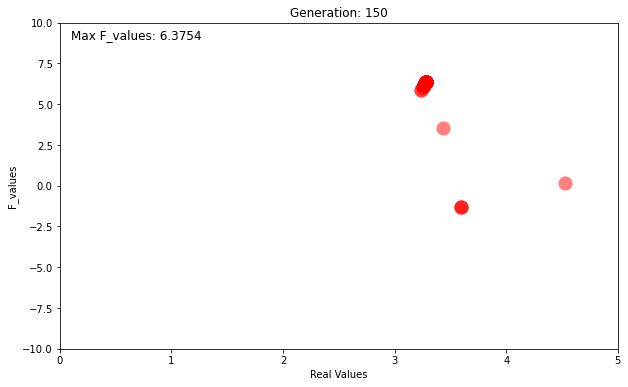

Generation: 150
Max F_values: 6.3754
Time for Generation 150: 0.0470 seconds



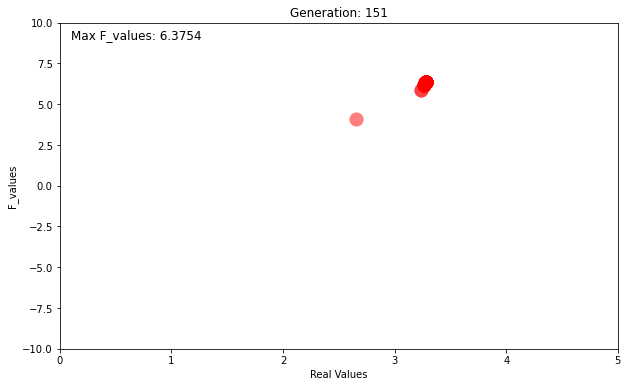

Generation: 151
Max F_values: 6.3754
Time for Generation 151: 0.0529 seconds



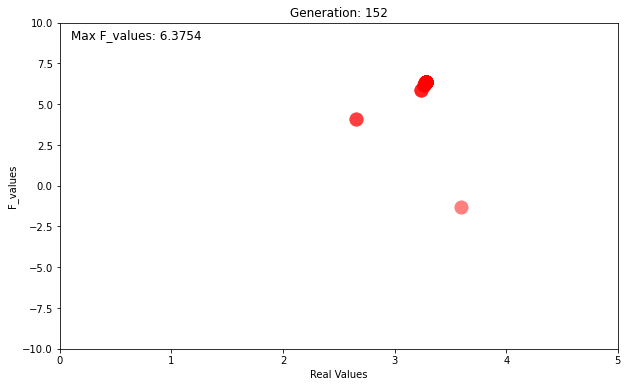

Generation: 152
Max F_values: 6.3754
Time for Generation 152: 0.0478 seconds



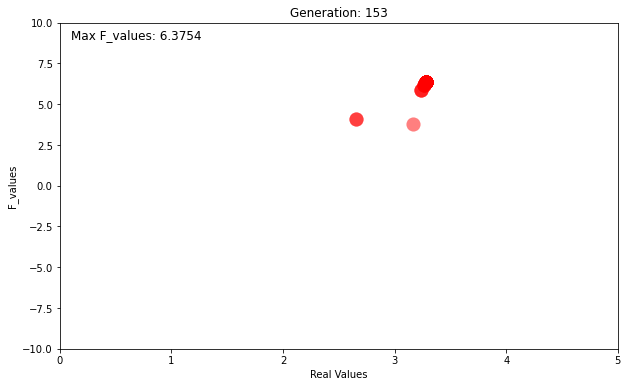

Generation: 153
Max F_values: 6.3754
Time for Generation 153: 0.0470 seconds



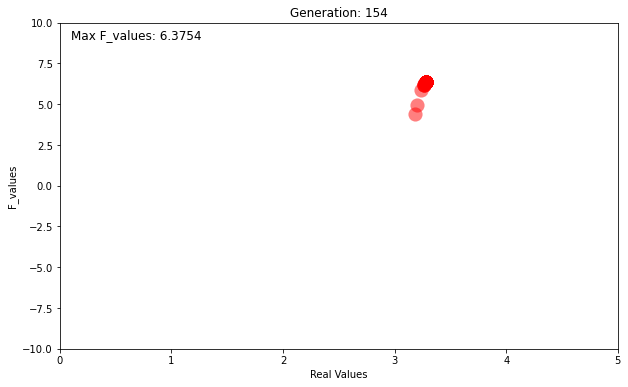

Generation: 154
Max F_values: 6.3754
Time for Generation 154: 0.0460 seconds



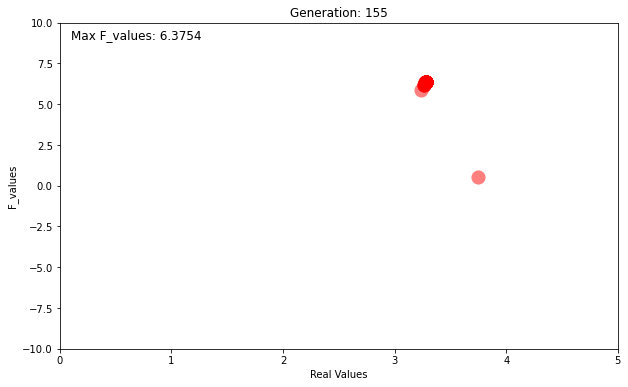

Generation: 155
Max F_values: 6.3754
Time for Generation 155: 0.0452 seconds



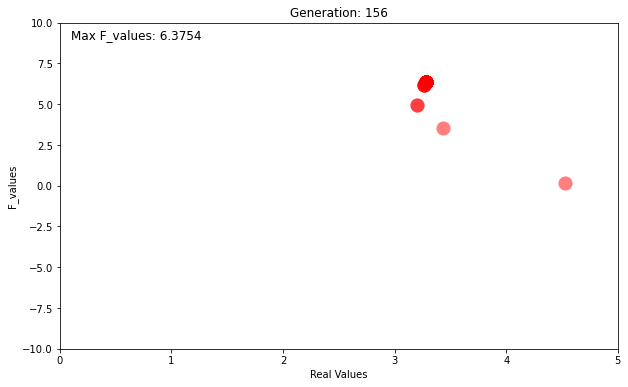

Generation: 156
Max F_values: 6.3754
Time for Generation 156: 0.0450 seconds



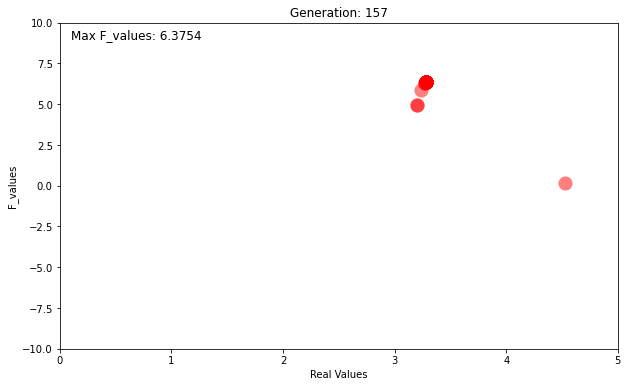

Generation: 157
Max F_values: 6.3754
Time for Generation 157: 0.0982 seconds



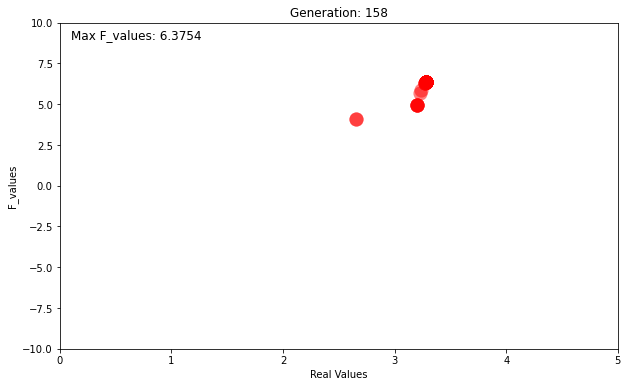

Generation: 158
Max F_values: 6.3754
Time for Generation 158: 0.0464 seconds



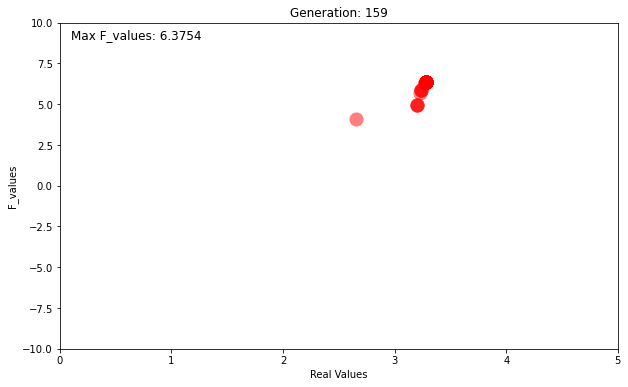

Generation: 159
Max F_values: 6.3754
Time for Generation 159: 0.0465 seconds



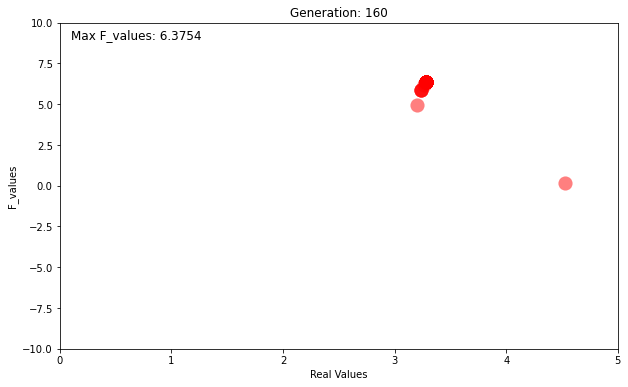

Generation: 160
Max F_values: 6.3754
Time for Generation 160: 0.0464 seconds



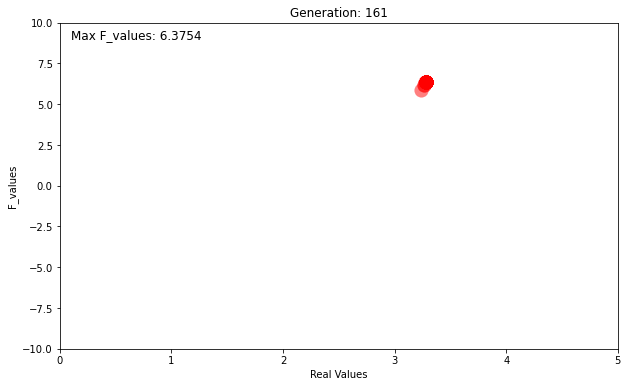

Generation: 161
Max F_values: 6.3754
Time for Generation 161: 0.0476 seconds



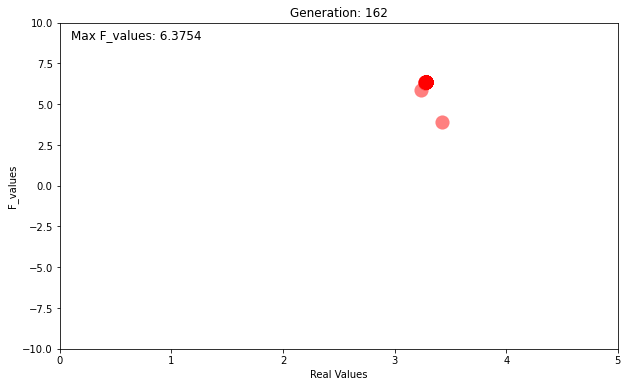

Generation: 162
Max F_values: 6.3754
Time for Generation 162: 0.0495 seconds



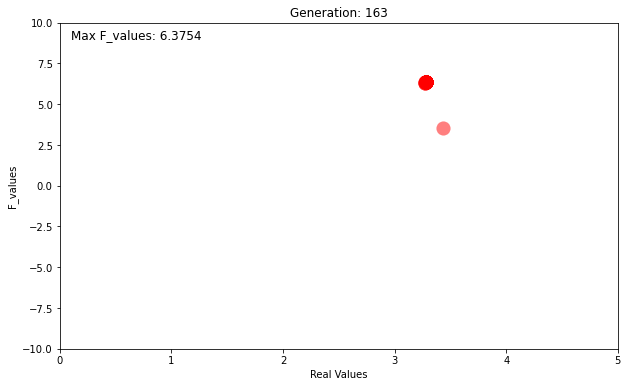

Generation: 163
Max F_values: 6.3754
Time for Generation 163: 0.0508 seconds



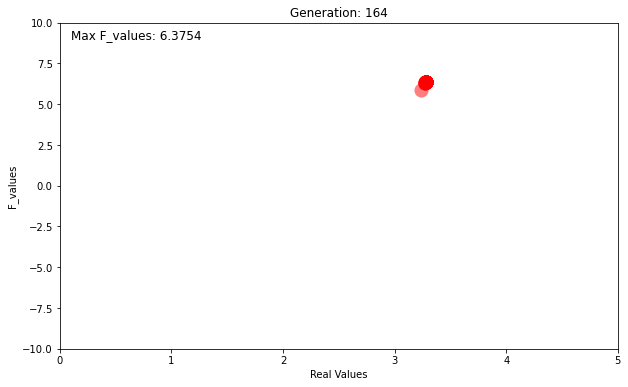

Generation: 164
Max F_values: 6.3754
Time for Generation 164: 0.0469 seconds



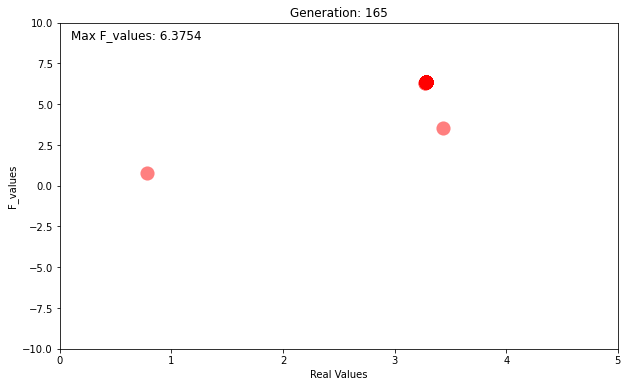

Generation: 165
Max F_values: 6.3754
Time for Generation 165: 0.0456 seconds



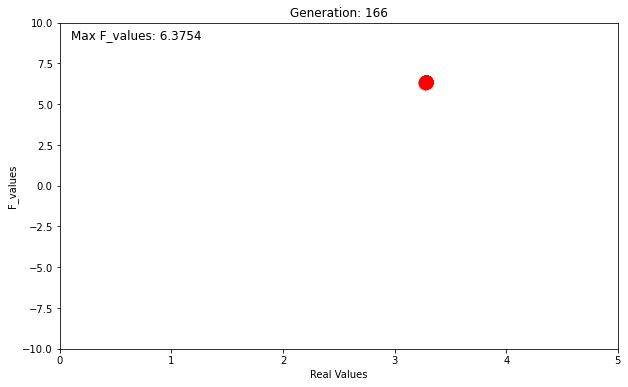

Generation: 166
Max F_values: 6.3754
Time for Generation 166: 0.0641 seconds



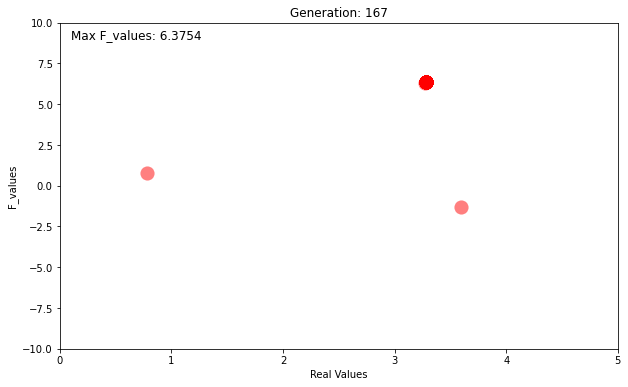

Generation: 167
Max F_values: 6.3754
Time for Generation 167: 0.0485 seconds



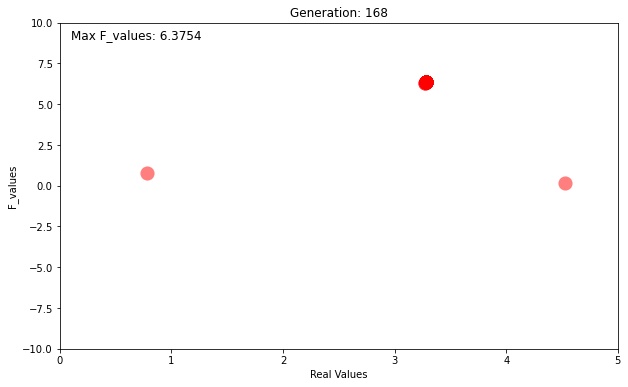

Generation: 168
Max F_values: 6.3754
Time for Generation 168: 0.0485 seconds



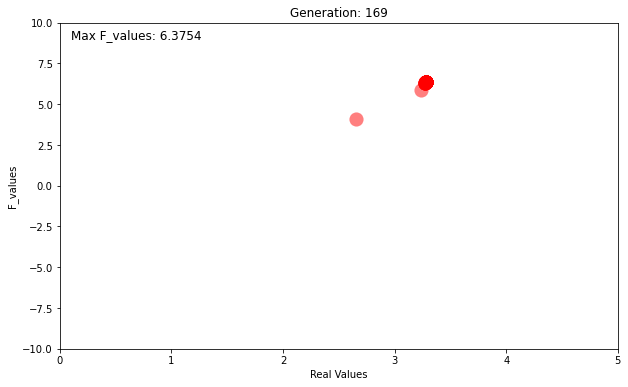

Generation: 169
Max F_values: 6.3754
Time for Generation 169: 0.0452 seconds



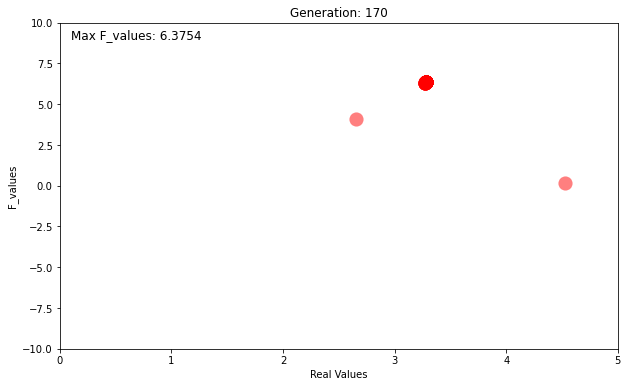

Generation: 170
Max F_values: 6.3754
Time for Generation 170: 0.0806 seconds



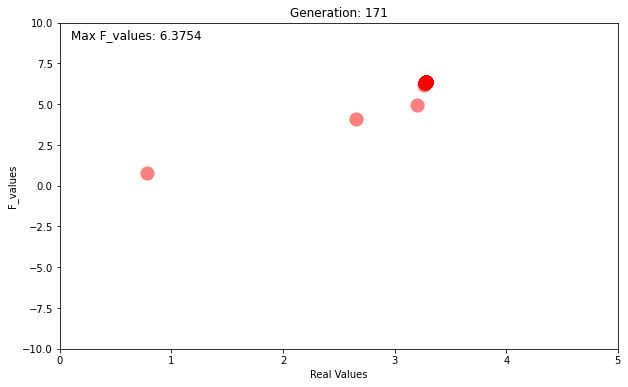

Generation: 171
Max F_values: 6.3754
Time for Generation 171: 0.0552 seconds



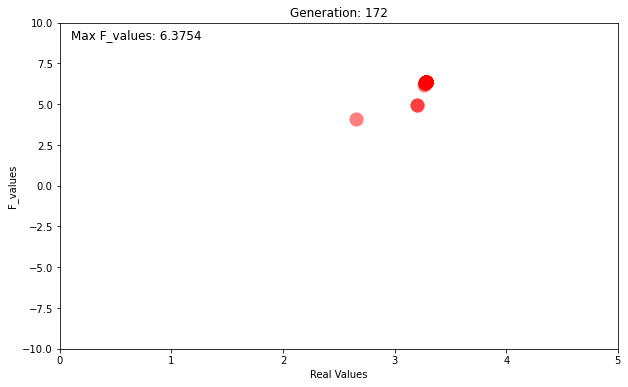

Generation: 172
Max F_values: 6.3754
Time for Generation 172: 0.0474 seconds



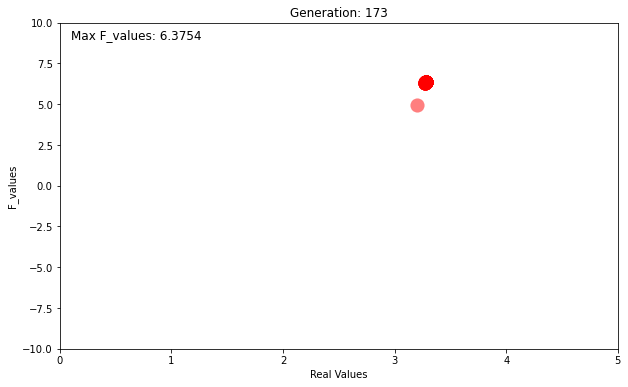

Generation: 173
Max F_values: 6.3754
Time for Generation 173: 0.0447 seconds



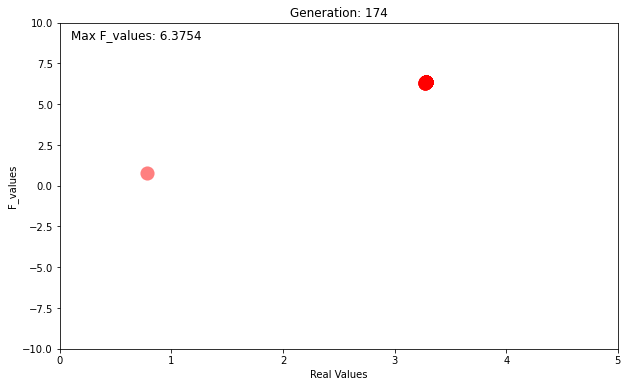

Generation: 174
Max F_values: 6.3754
Time for Generation 174: 0.0437 seconds



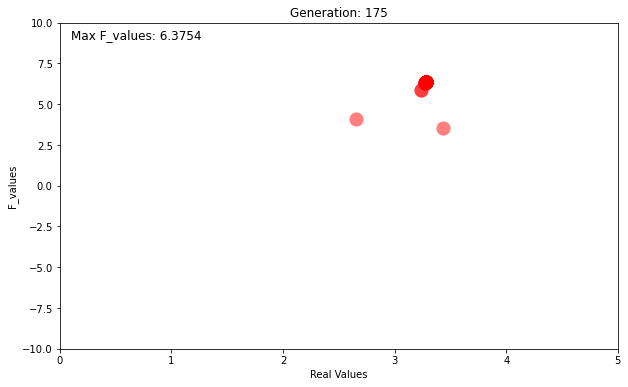

Generation: 175
Max F_values: 6.3754
Time for Generation 175: 0.0601 seconds



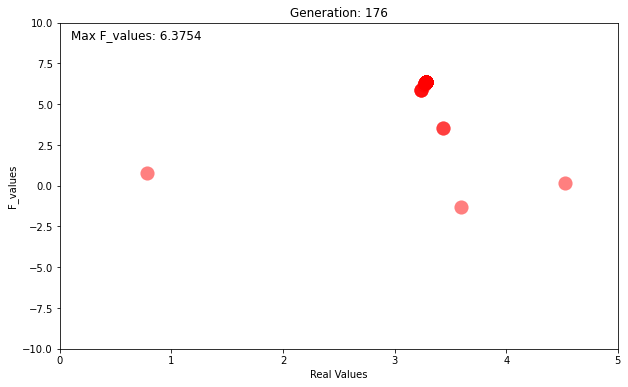

Generation: 176
Max F_values: 6.3754
Time for Generation 176: 0.0450 seconds



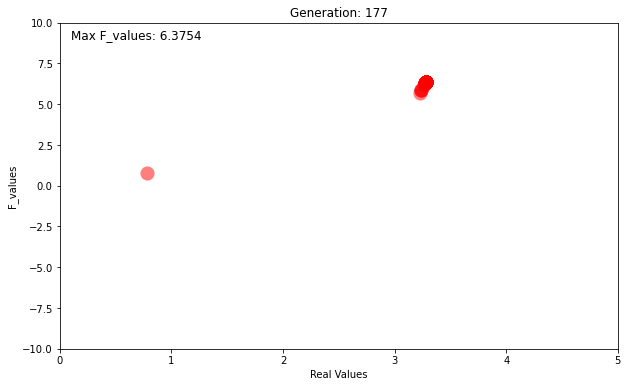

Generation: 177
Max F_values: 6.3754
Time for Generation 177: 0.0442 seconds



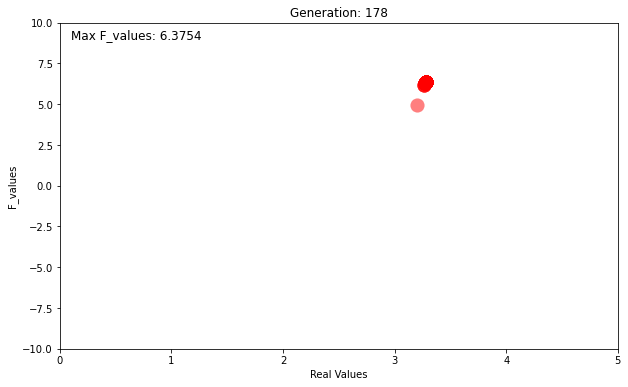

Generation: 178
Max F_values: 6.3754
Time for Generation 178: 0.0623 seconds



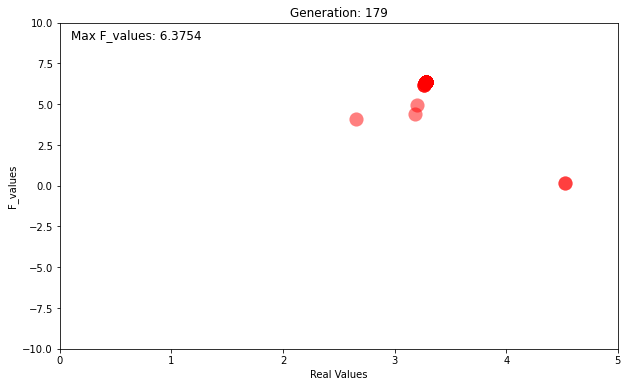

Generation: 179
Max F_values: 6.3754
Time for Generation 179: 0.0438 seconds



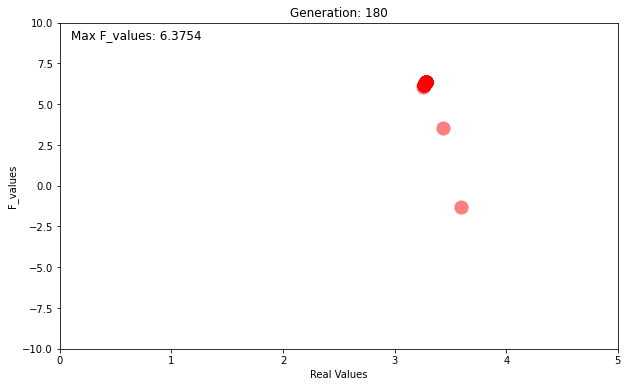

Generation: 180
Max F_values: 6.3754
Time for Generation 180: 0.0439 seconds



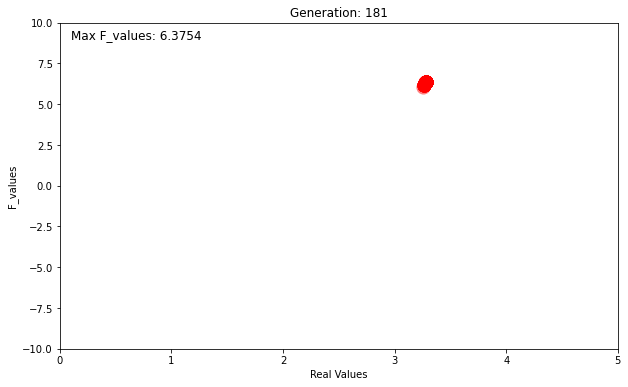

Generation: 181
Max F_values: 6.3754
Time for Generation 181: 0.0442 seconds



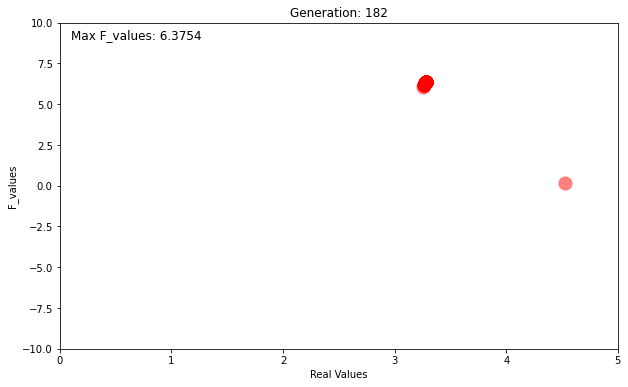

Generation: 182
Max F_values: 6.3754
Time for Generation 182: 0.0445 seconds



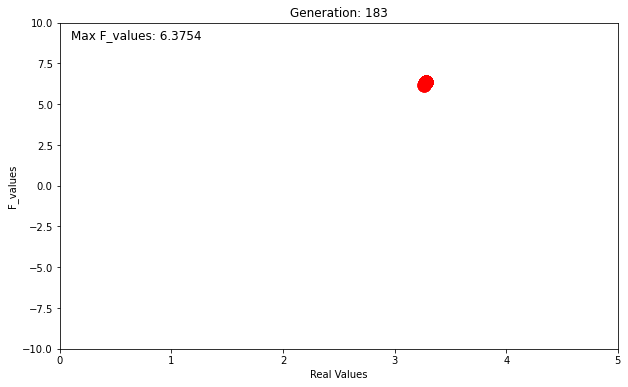

Generation: 183
Max F_values: 6.3754
Time for Generation 183: 0.0986 seconds



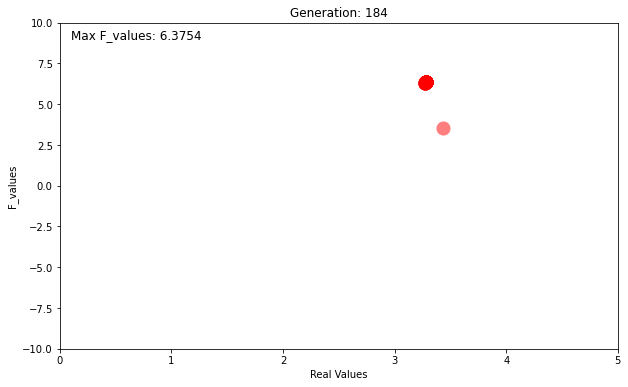

Generation: 184
Max F_values: 6.3754
Time for Generation 184: 0.0445 seconds



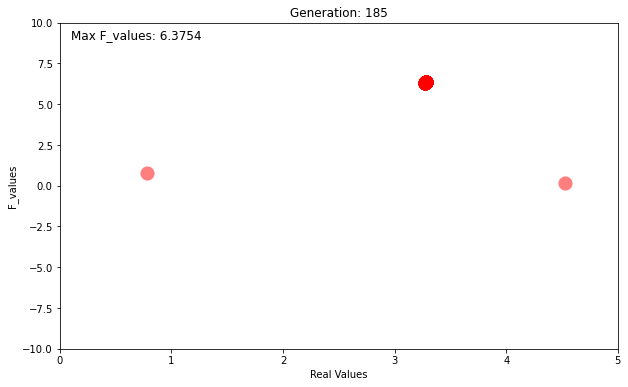

Generation: 185
Max F_values: 6.3754
Time for Generation 185: 0.0462 seconds



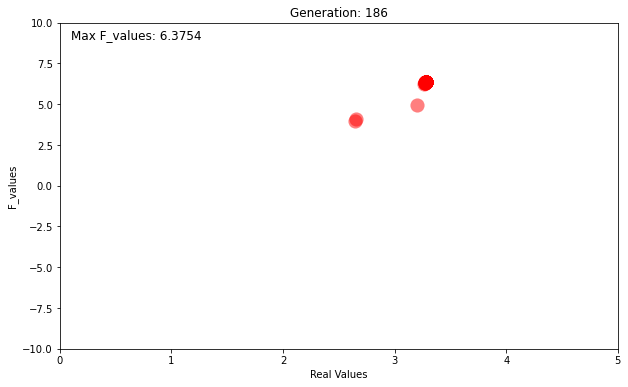

Generation: 186
Max F_values: 6.3754
Time for Generation 186: 0.0465 seconds



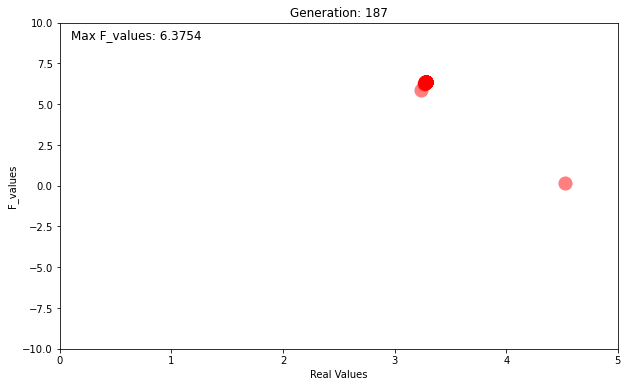

Generation: 187
Max F_values: 6.3754
Time for Generation 187: 0.0553 seconds



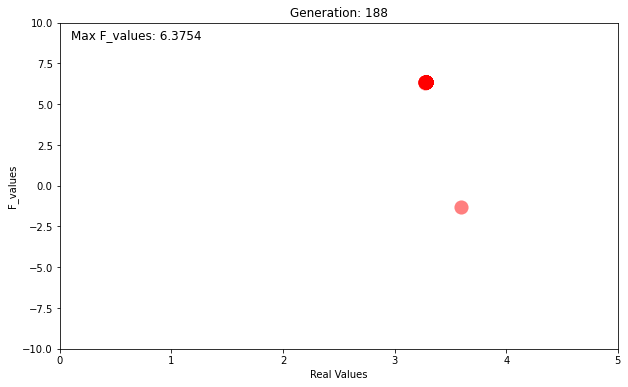

Generation: 188
Max F_values: 6.3754
Time for Generation 188: 0.0469 seconds



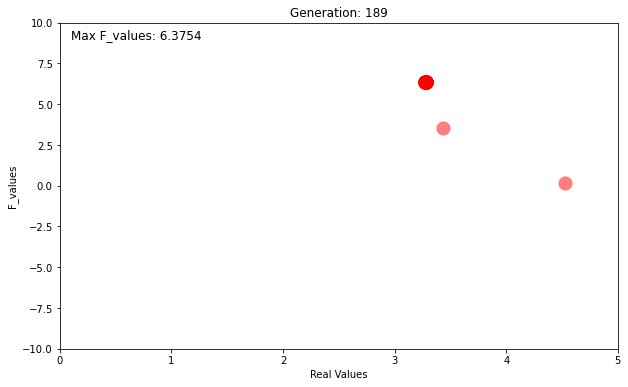

Generation: 189
Max F_values: 6.3754
Time for Generation 189: 0.0460 seconds



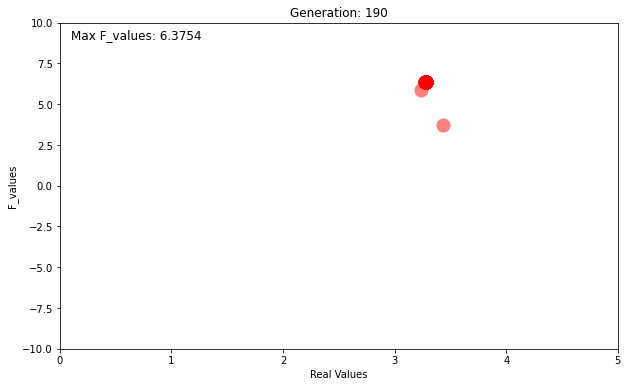

Generation: 190
Max F_values: 6.3754
Time for Generation 190: 0.0483 seconds



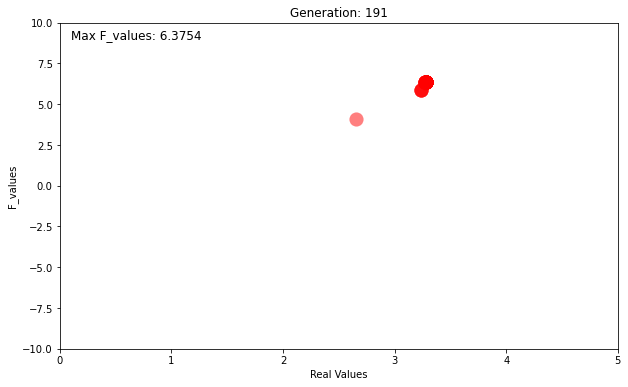

Generation: 191
Max F_values: 6.3754
Time for Generation 191: 0.0484 seconds



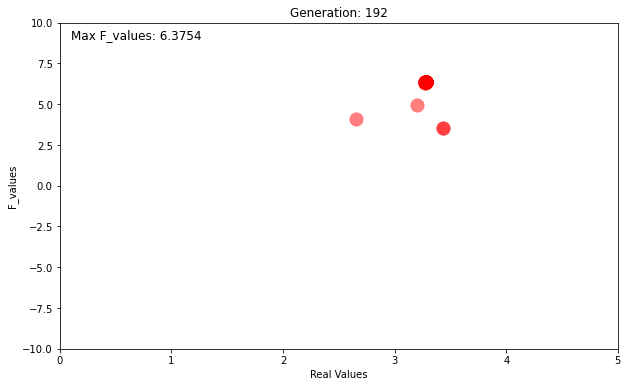

Generation: 192
Max F_values: 6.3754
Time for Generation 192: 0.0464 seconds



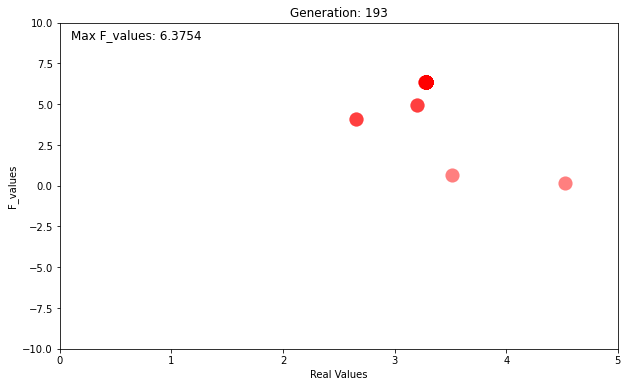

Generation: 193
Max F_values: 6.3754
Time for Generation 193: 0.0467 seconds



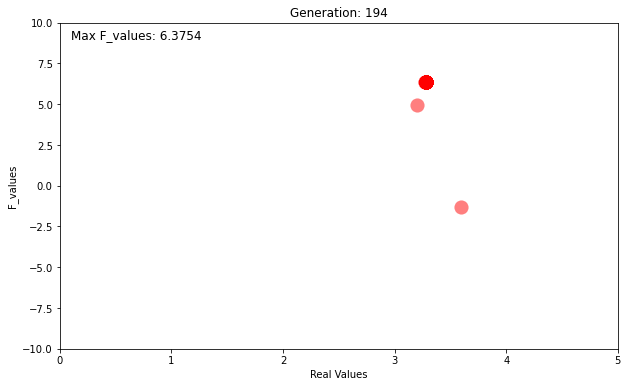

Generation: 194
Max F_values: 6.3754
Time for Generation 194: 0.0511 seconds



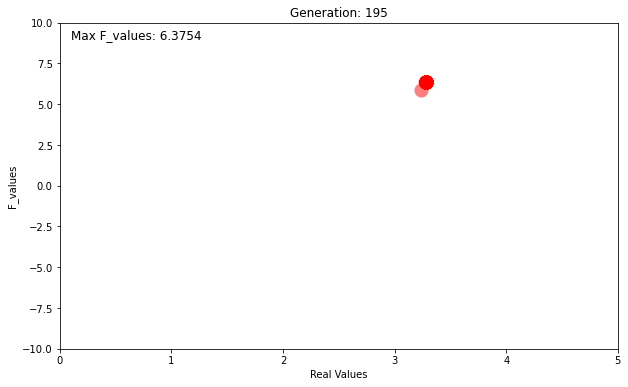

Generation: 195
Max F_values: 6.3754
Time for Generation 195: 0.0635 seconds



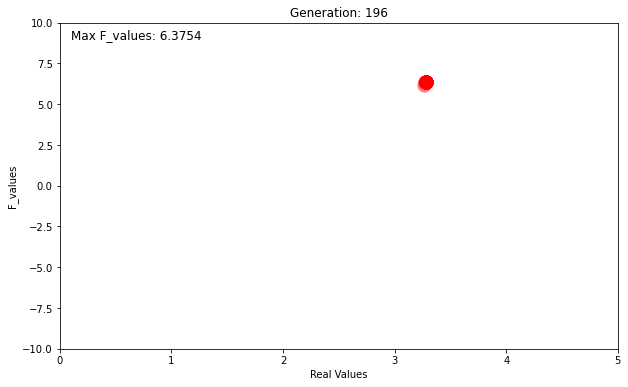

Generation: 196
Max F_values: 6.3754
Time for Generation 196: 0.0829 seconds



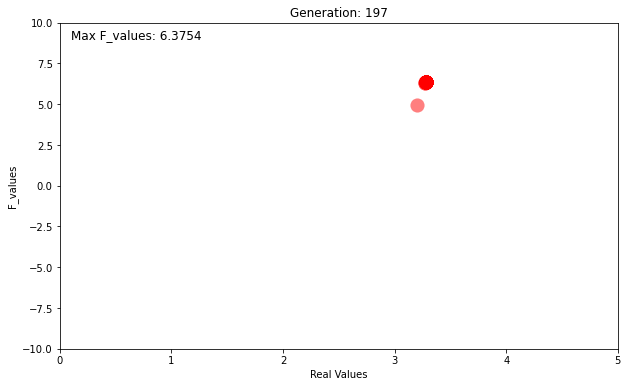

Generation: 197
Max F_values: 6.3754
Time for Generation 197: 0.0470 seconds



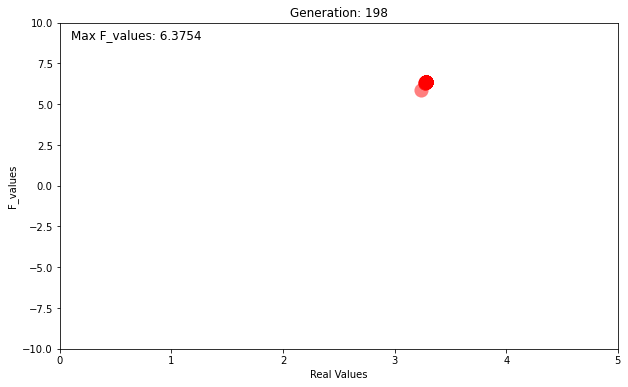

Generation: 198
Max F_values: 6.3754
Time for Generation 198: 0.0656 seconds



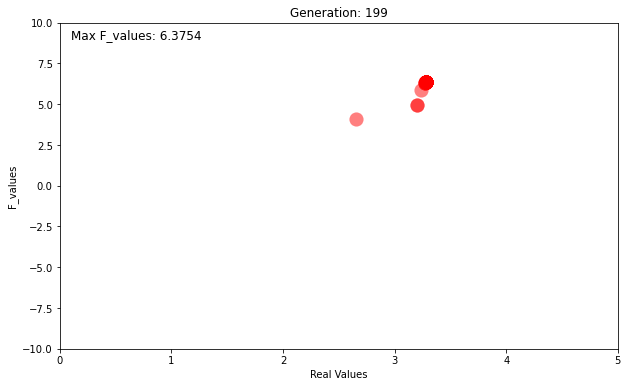

Generation: 199
Max F_values: 6.3754
Time for Generation 199: 0.0455 seconds



([-62.813028192525806,
  -30.030971709694427,
  29.59273205752216,
  88.3547499253382,
  112.78067736562478,
  160.99981495997292,
  310.3139732731559,
  317.6350083546936,
  385.02932274302015,
  420.49926152127546,
  452.96634733247015,
  455.20493928672,
  466.94088439795706,
  486.6726031009382,
  494.0331586584162,
  491.7835639823074,
  506.24885613509514,
  515.9967249411153,
  528.2113384440586,
  533.1404985703442,
  513.7058342143166,
  530.3894475989289,
  570.9258210336485,
  568.3388775853222,
  550.3378523696771,
  558.814065826629,
  566.3311129901424,
  560.7578110605089,
  580.939584743216,
  558.5665063464339,
  561.0618343940042,
  543.5636493236291,
  535.5617906103648,
  505.86498709951877,
  562.31405244373,
  551.3355437038057,
  543.9279155520287,
  525.0961552264345,
  539.5581179359132,
  554.3256953528372,
  552.8798095776043,
  522.012790616347,
  524.0544899047318,
  519.7754237900557,
  542.9125411712473,
  549.7204381853907,
  571.9062426302197,
  559.707

In [271]:
# Initialize the population
performance = []
time_per_iteration = []
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))

# Run the Genetic Algorithm
GA(N_GENERATIONS, pop)

## HW3.8 Performance Visualization
Generates a line plot using matplotlib or other tool to visualize the performance of the genetic algorithm over multiple generations.

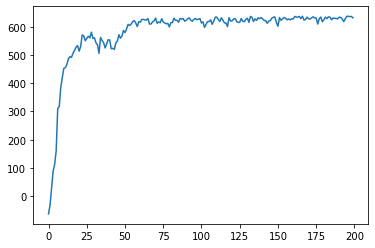

In [272]:
# TODO: Generates a line plot to visualize the genetic algorithm's performance across generations.
x = np.arange(0, N_GENERATIONS,1)
y = performance
plt.plot(x, y)

## HW3.9 Discuss1
Increase the mutation rate, follow the above steps, observe the performance, and provide a discussion.

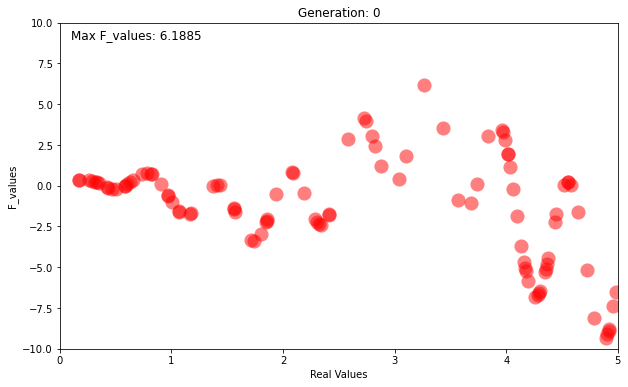

Generation: 0
Max F_values: 6.1885
Time for Generation 0: 0.0514 seconds



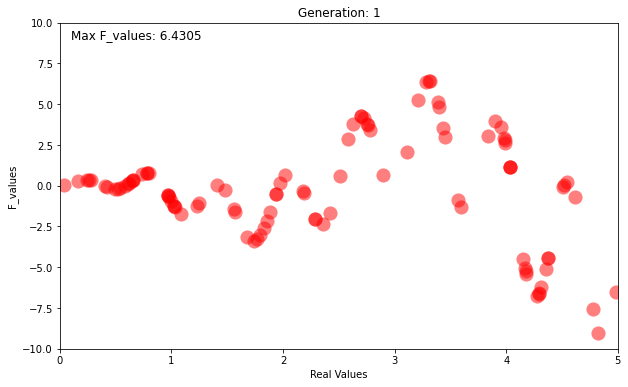

Generation: 1
Max F_values: 6.4305
Time for Generation 1: 0.0482 seconds



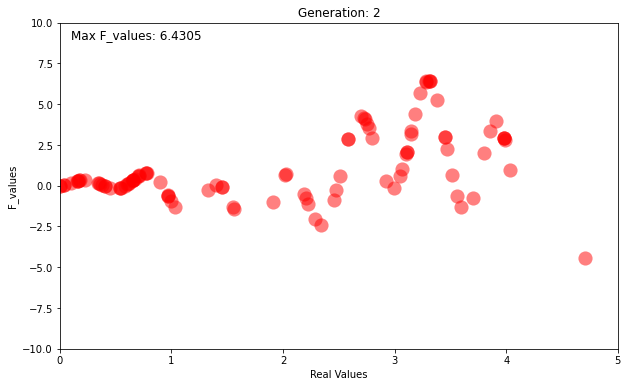

Generation: 2
Max F_values: 6.4305
Time for Generation 2: 0.0468 seconds



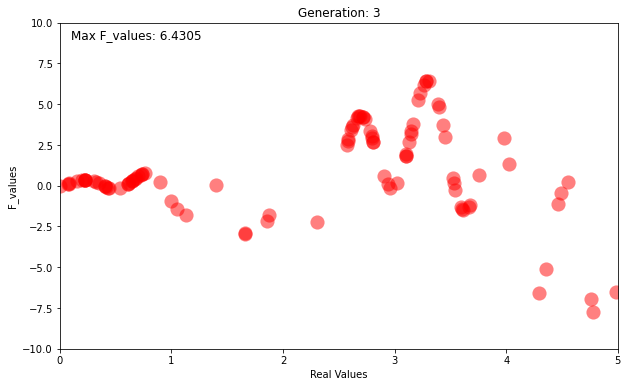

Generation: 3
Max F_values: 6.4305
Time for Generation 3: 0.0472 seconds



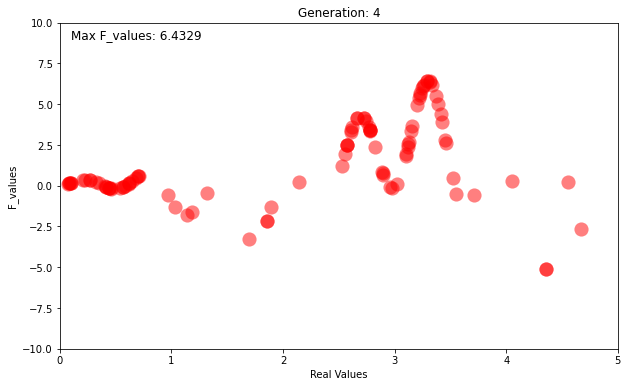

Generation: 4
Max F_values: 6.4329
Time for Generation 4: 0.0497 seconds



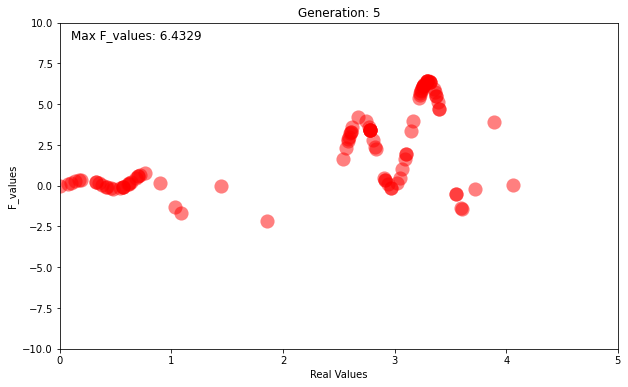

Generation: 5
Max F_values: 6.4329
Time for Generation 5: 0.0470 seconds



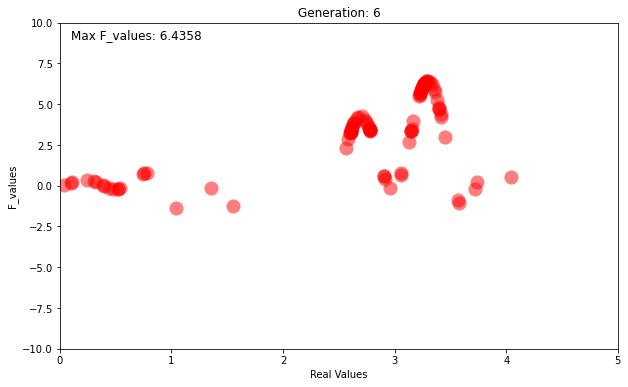

Generation: 6
Max F_values: 6.4358
Time for Generation 6: 0.0469 seconds



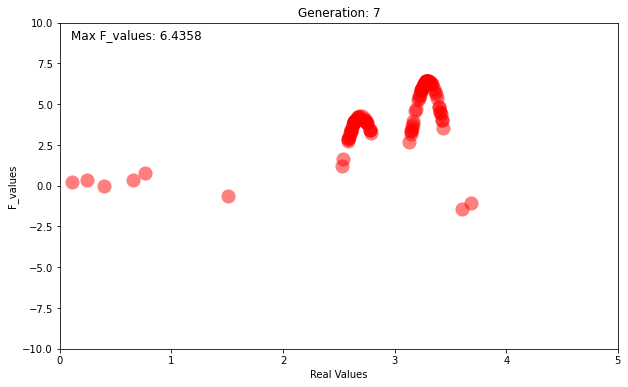

Generation: 7
Max F_values: 6.4358
Time for Generation 7: 0.0466 seconds



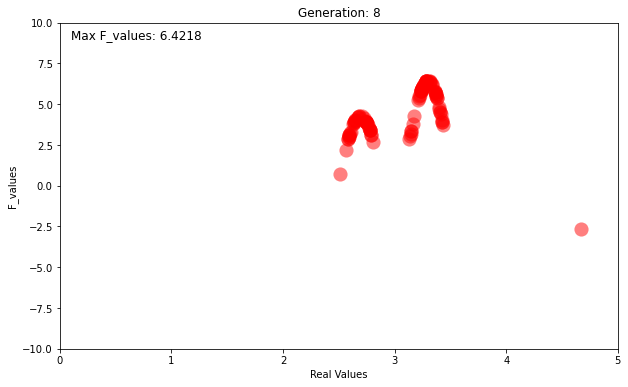

Generation: 8
Max F_values: 6.4218
Time for Generation 8: 0.0996 seconds



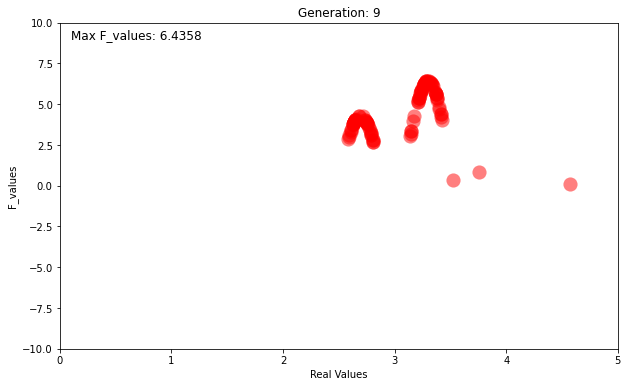

Generation: 9
Max F_values: 6.4358
Time for Generation 9: 0.0448 seconds



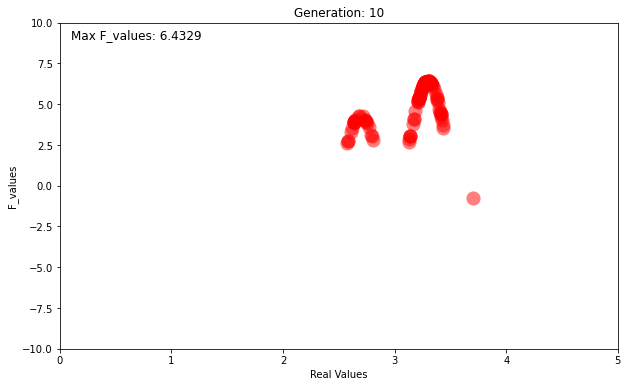

Generation: 10
Max F_values: 6.4329
Time for Generation 10: 0.0460 seconds



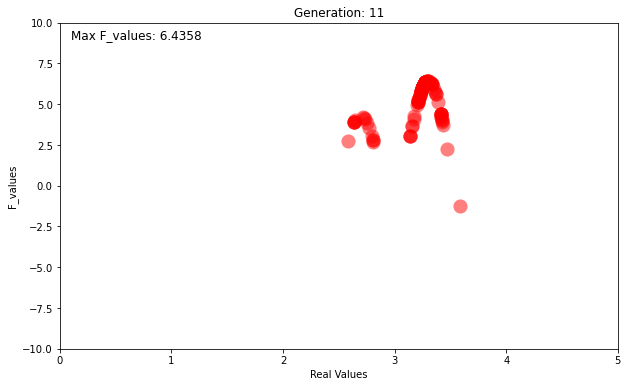

Generation: 11
Max F_values: 6.4358
Time for Generation 11: 0.0461 seconds



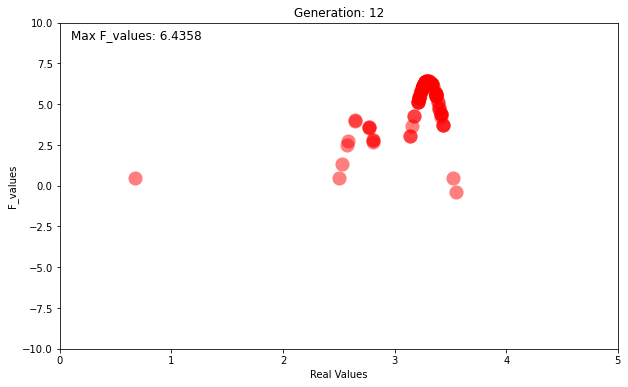

Generation: 12
Max F_values: 6.4358
Time for Generation 12: 0.0489 seconds



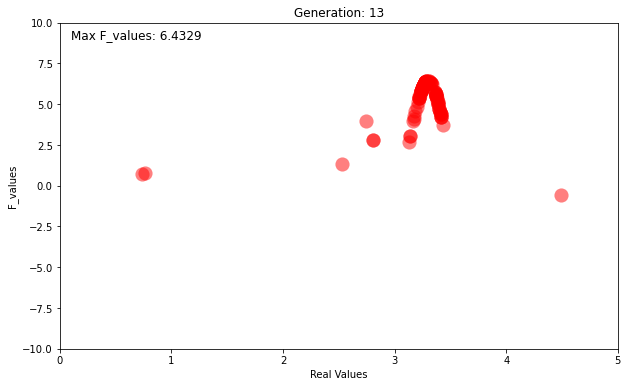

Generation: 13
Max F_values: 6.4329
Time for Generation 13: 0.0465 seconds



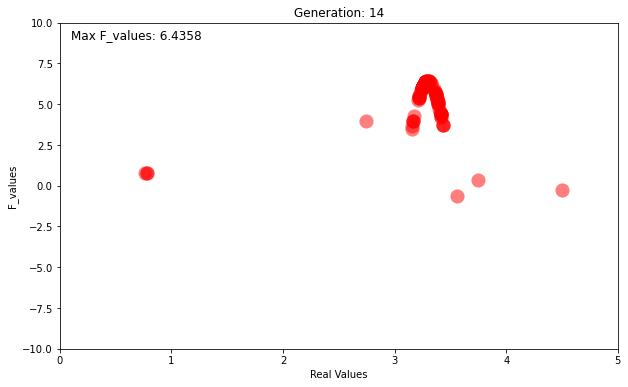

Generation: 14
Max F_values: 6.4358
Time for Generation 14: 0.0461 seconds



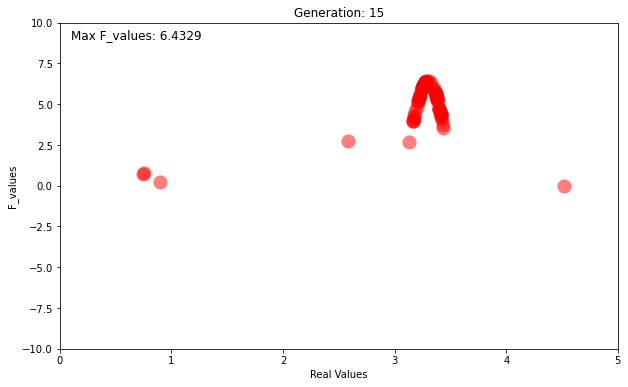

Generation: 15
Max F_values: 6.4329
Time for Generation 15: 0.0457 seconds



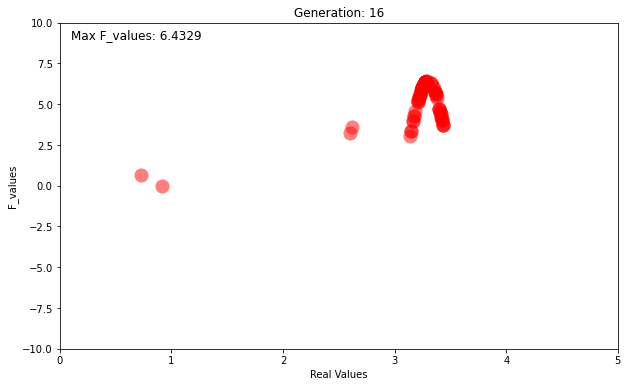

Generation: 16
Max F_values: 6.4329
Time for Generation 16: 0.0459 seconds



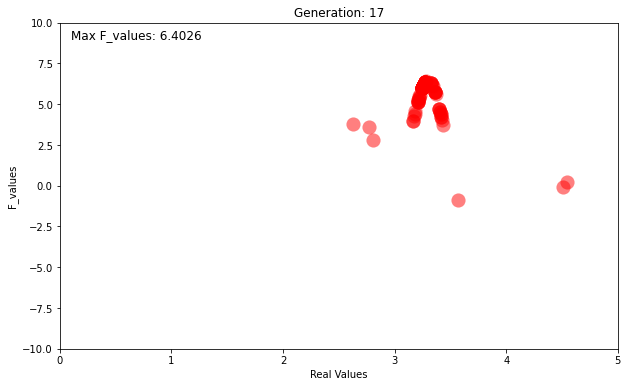

Generation: 17
Max F_values: 6.4026
Time for Generation 17: 0.0462 seconds



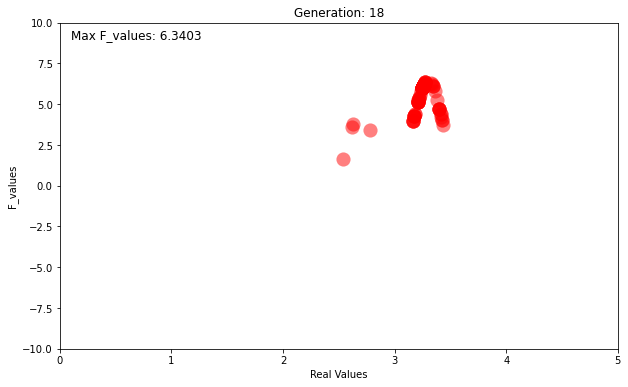

Generation: 18
Max F_values: 6.3403
Time for Generation 18: 0.0457 seconds



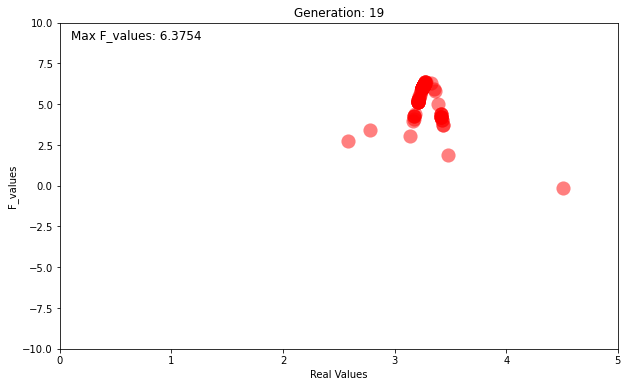

Generation: 19
Max F_values: 6.3754
Time for Generation 19: 0.0454 seconds



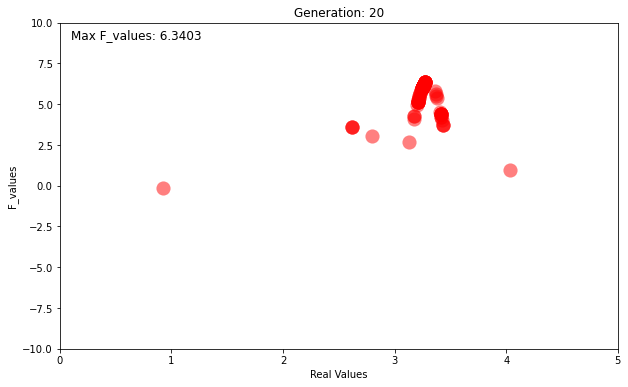

Generation: 20
Max F_values: 6.3403
Time for Generation 20: 0.0587 seconds



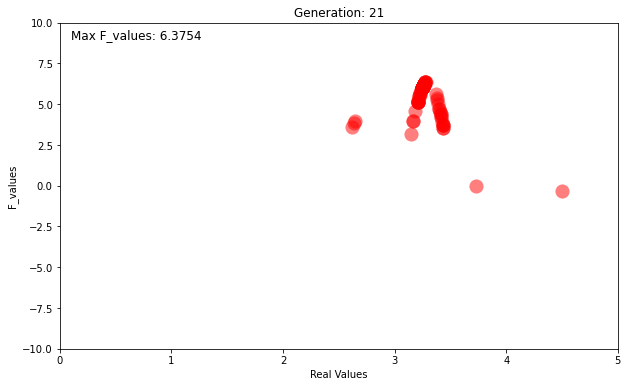

Generation: 21
Max F_values: 6.3754
Time for Generation 21: 0.0920 seconds



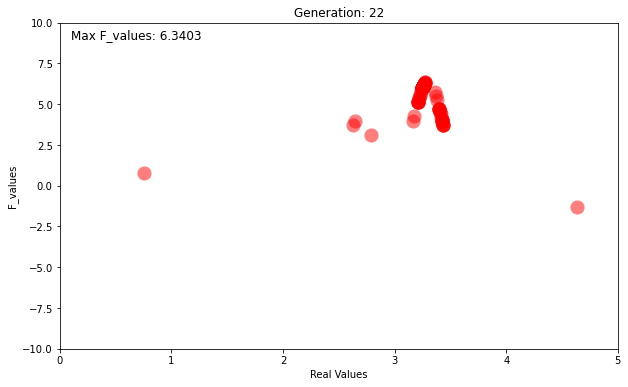

Generation: 22
Max F_values: 6.3403
Time for Generation 22: 0.0455 seconds



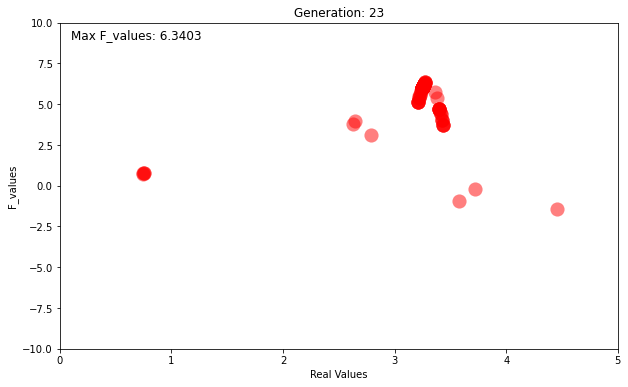

Generation: 23
Max F_values: 6.3403
Time for Generation 23: 0.0481 seconds



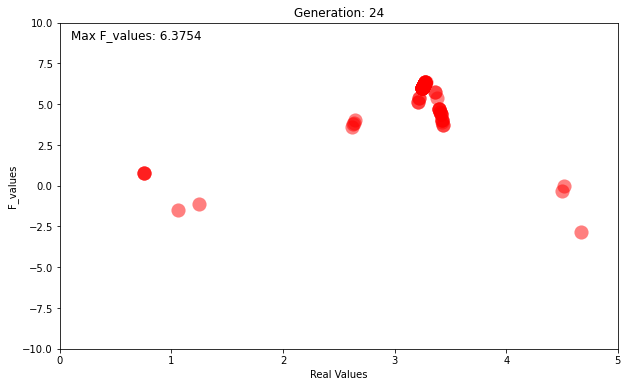

Generation: 24
Max F_values: 6.3754
Time for Generation 24: 0.0452 seconds



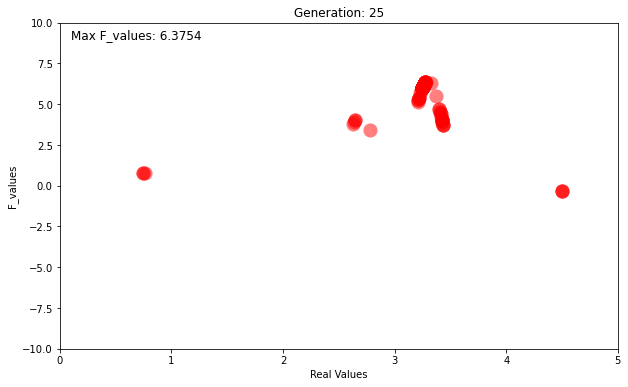

Generation: 25
Max F_values: 6.3754
Time for Generation 25: 0.0460 seconds



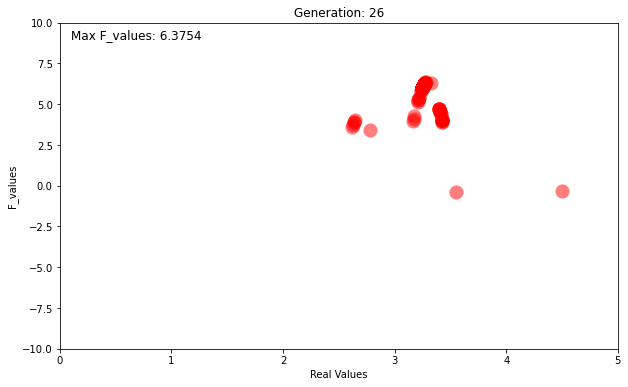

Generation: 26
Max F_values: 6.3754
Time for Generation 26: 0.0465 seconds



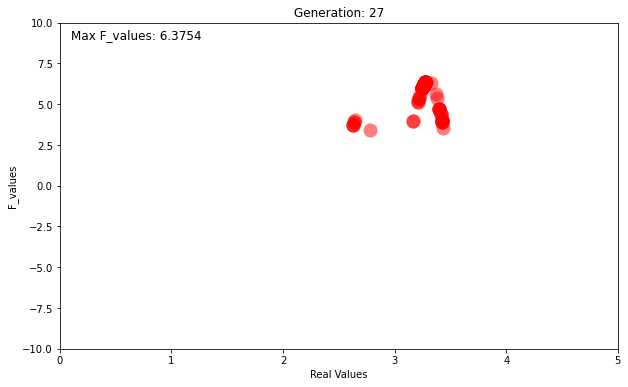

Generation: 27
Max F_values: 6.3754
Time for Generation 27: 0.0462 seconds



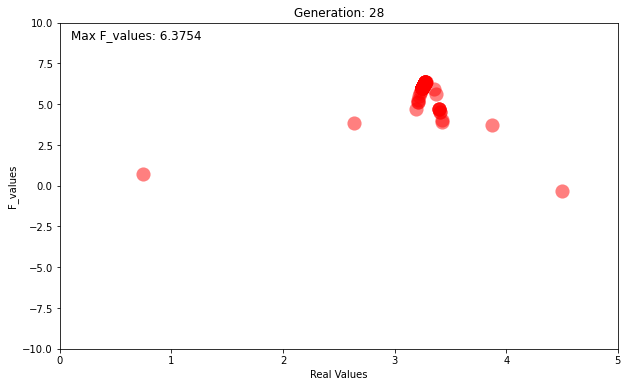

Generation: 28
Max F_values: 6.3754
Time for Generation 28: 0.0463 seconds



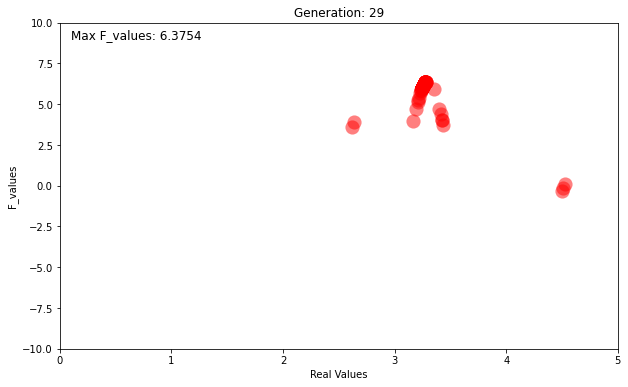

Generation: 29
Max F_values: 6.3754
Time for Generation 29: 0.0461 seconds



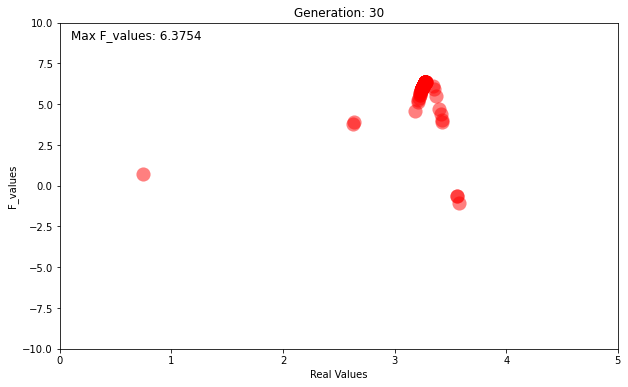

Generation: 30
Max F_values: 6.3754
Time for Generation 30: 0.0502 seconds



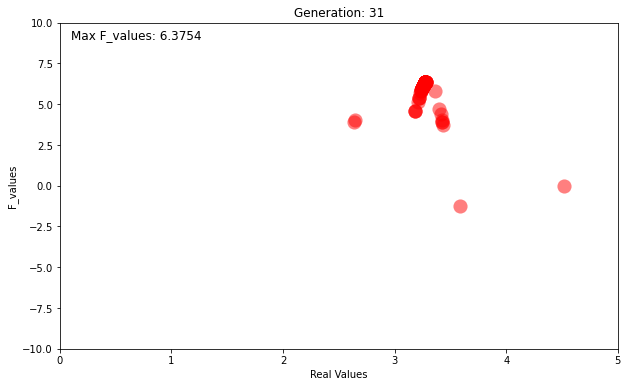

Generation: 31
Max F_values: 6.3754
Time for Generation 31: 0.0479 seconds



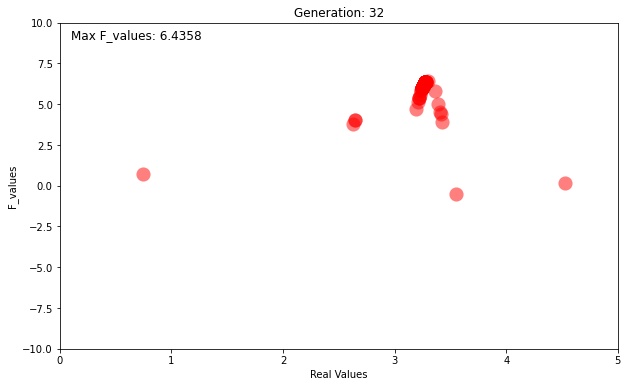

Generation: 32
Max F_values: 6.4358
Time for Generation 32: 0.0458 seconds



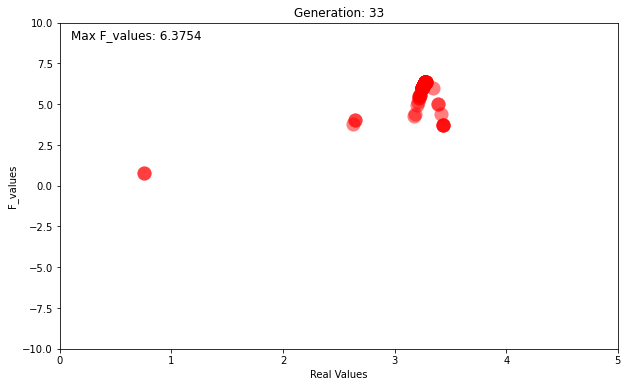

Generation: 33
Max F_values: 6.3754
Time for Generation 33: 0.0455 seconds



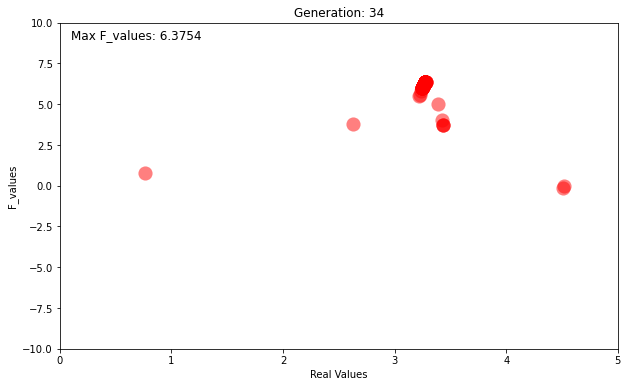

Generation: 34
Max F_values: 6.3754
Time for Generation 34: 0.0841 seconds



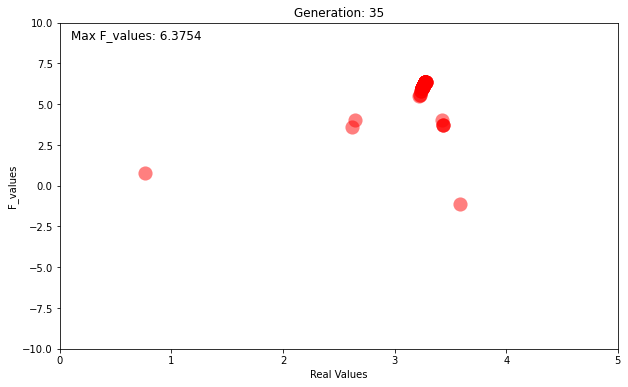

Generation: 35
Max F_values: 6.3754
Time for Generation 35: 0.0480 seconds



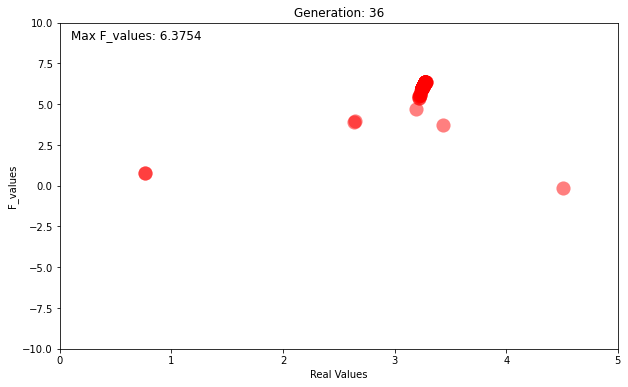

Generation: 36
Max F_values: 6.3754
Time for Generation 36: 0.0462 seconds



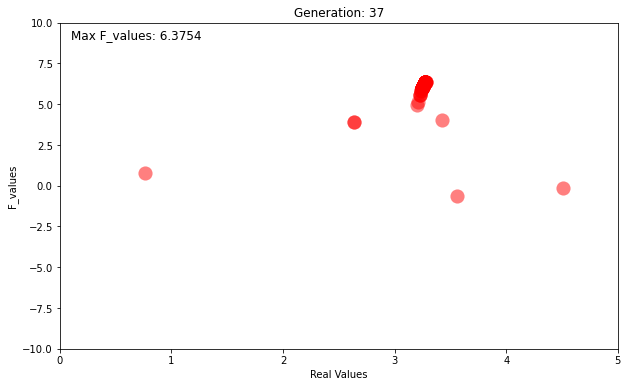

Generation: 37
Max F_values: 6.3754
Time for Generation 37: 0.0481 seconds



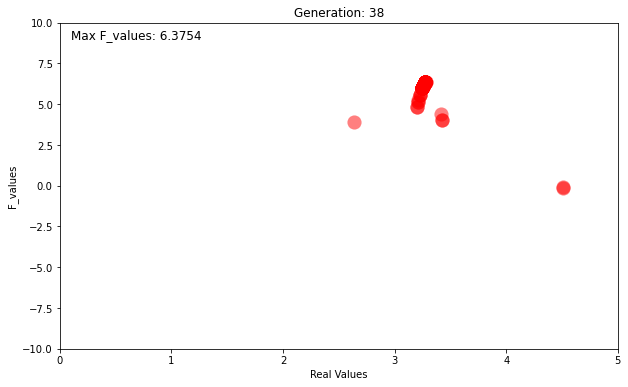

Generation: 38
Max F_values: 6.3754
Time for Generation 38: 0.0502 seconds



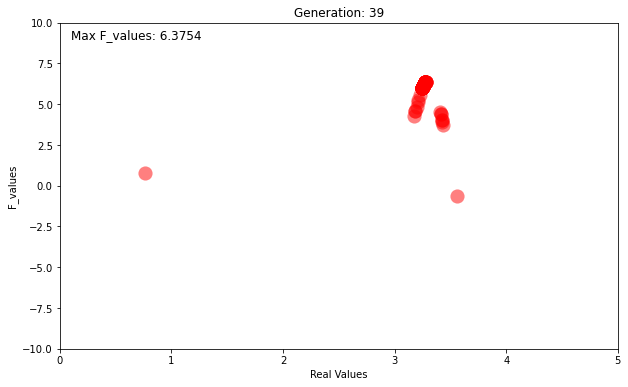

Generation: 39
Max F_values: 6.3754
Time for Generation 39: 0.0487 seconds



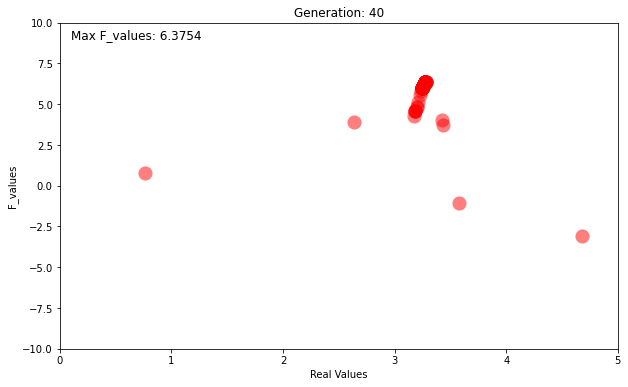

Generation: 40
Max F_values: 6.3754
Time for Generation 40: 0.0462 seconds



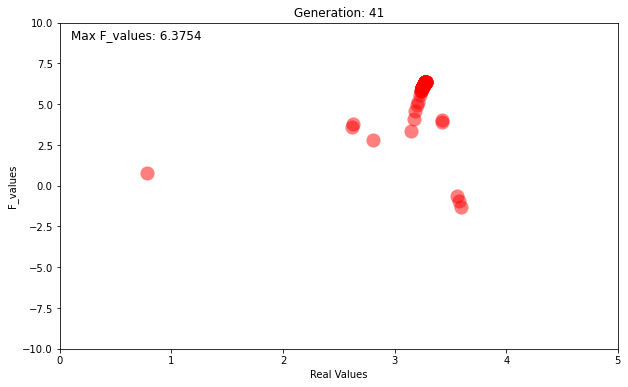

Generation: 41
Max F_values: 6.3754
Time for Generation 41: 0.0461 seconds



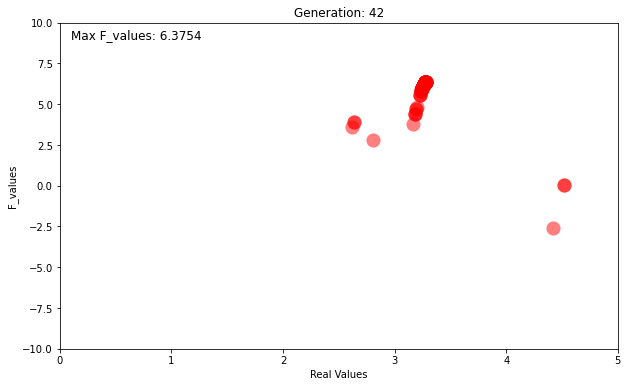

Generation: 42
Max F_values: 6.3754
Time for Generation 42: 0.0471 seconds



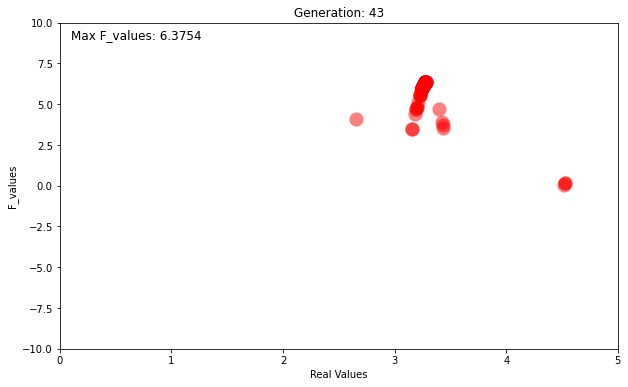

Generation: 43
Max F_values: 6.3754
Time for Generation 43: 0.0464 seconds



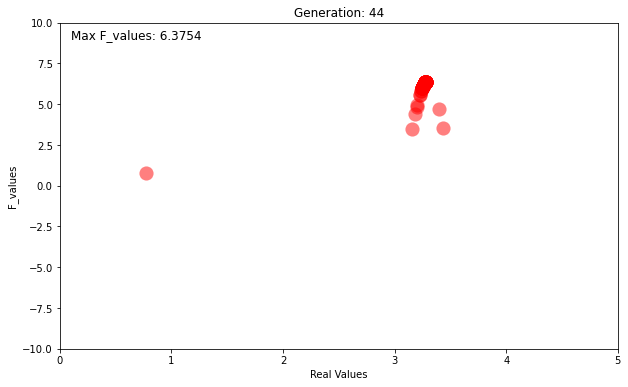

Generation: 44
Max F_values: 6.3754
Time for Generation 44: 0.0460 seconds



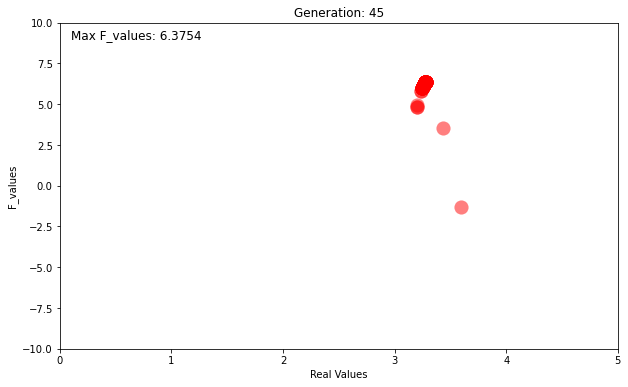

Generation: 45
Max F_values: 6.3754
Time for Generation 45: 0.0456 seconds



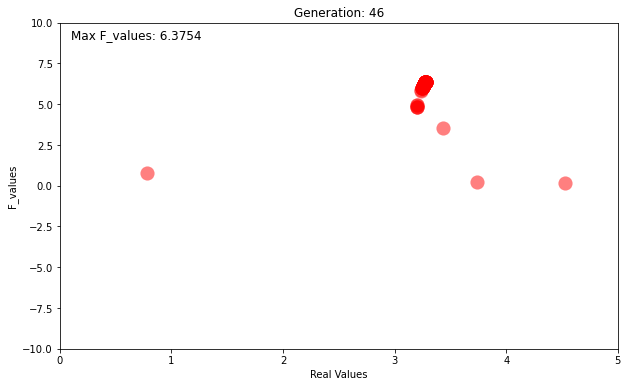

Generation: 46
Max F_values: 6.3754
Time for Generation 46: 0.0701 seconds



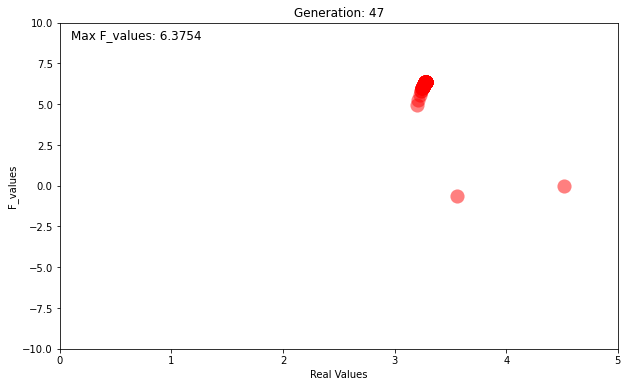

Generation: 47
Max F_values: 6.3754
Time for Generation 47: 0.0839 seconds



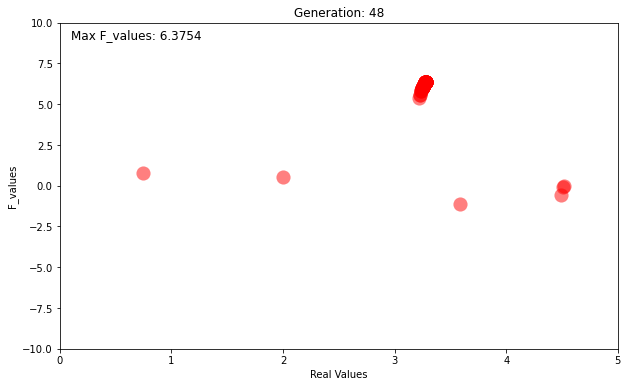

Generation: 48
Max F_values: 6.3754
Time for Generation 48: 0.0446 seconds



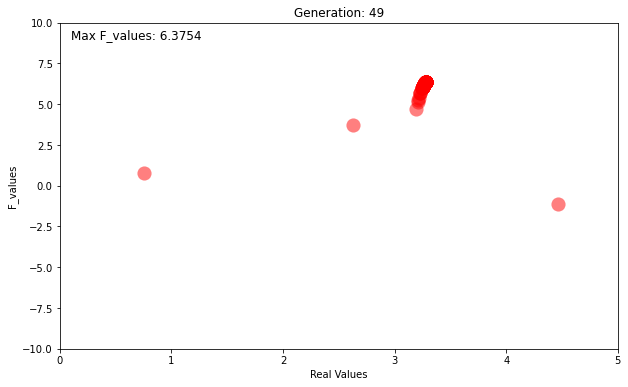

Generation: 49
Max F_values: 6.3754
Time for Generation 49: 0.0454 seconds



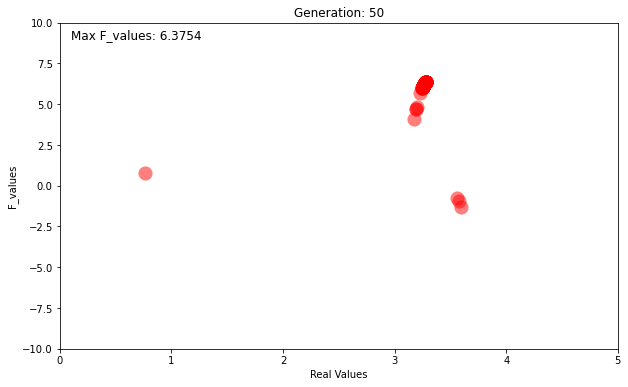

Generation: 50
Max F_values: 6.3754
Time for Generation 50: 0.0463 seconds



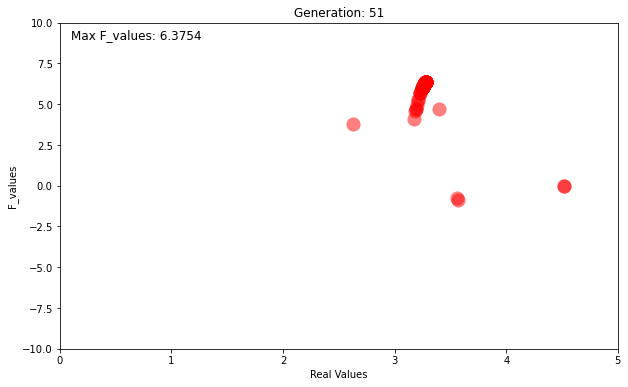

Generation: 51
Max F_values: 6.3754
Time for Generation 51: 0.0459 seconds



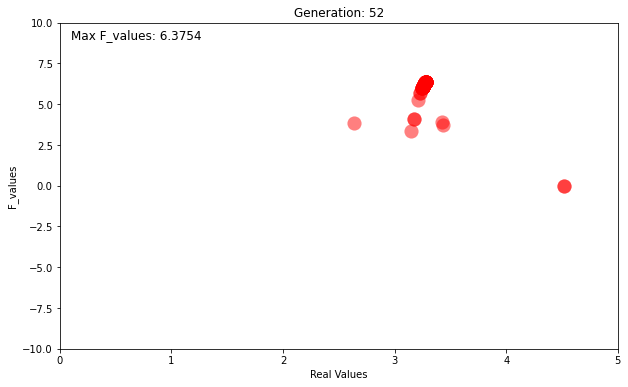

Generation: 52
Max F_values: 6.3754
Time for Generation 52: 0.0465 seconds



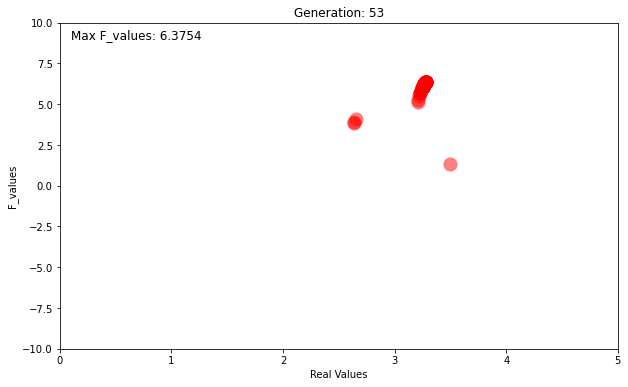

Generation: 53
Max F_values: 6.3754
Time for Generation 53: 0.0499 seconds



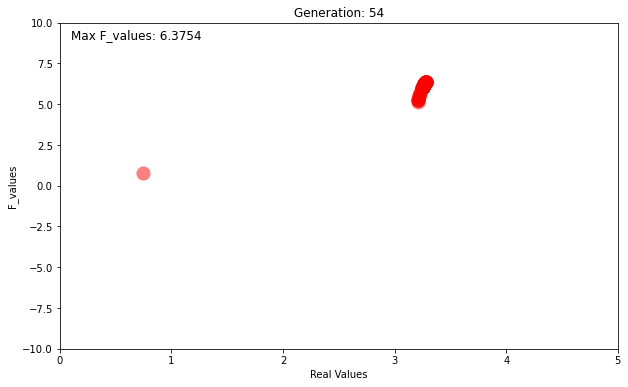

Generation: 54
Max F_values: 6.3754
Time for Generation 54: 0.0460 seconds



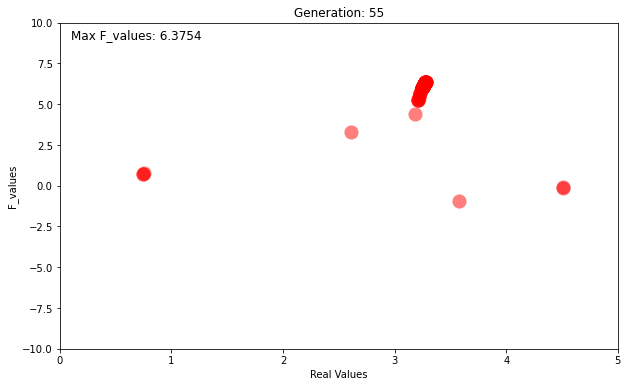

Generation: 55
Max F_values: 6.3754
Time for Generation 55: 0.0472 seconds



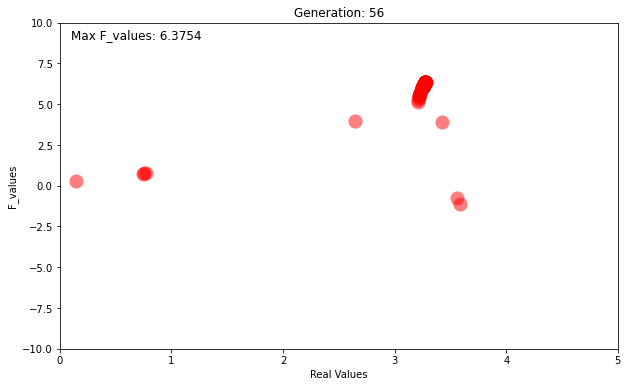

Generation: 56
Max F_values: 6.3754
Time for Generation 56: 0.0454 seconds



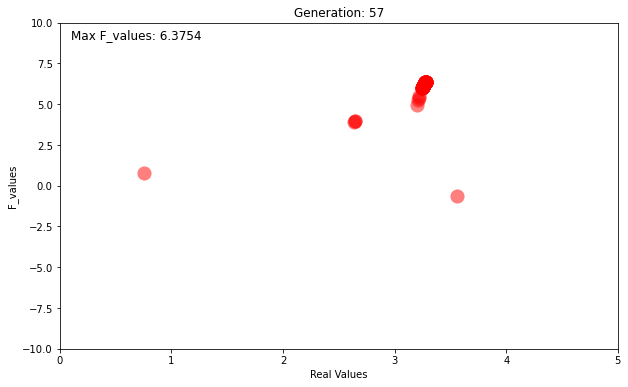

Generation: 57
Max F_values: 6.3754
Time for Generation 57: 0.0460 seconds



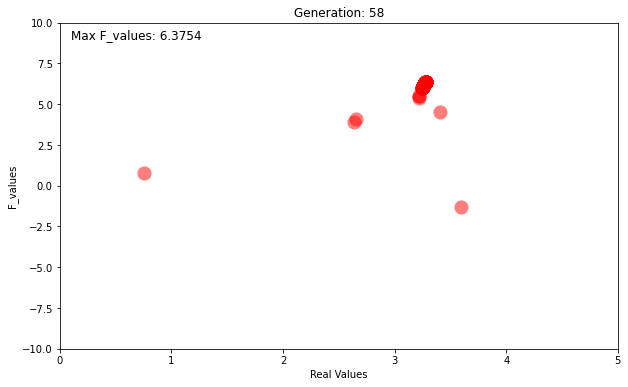

Generation: 58
Max F_values: 6.3754
Time for Generation 58: 0.0480 seconds



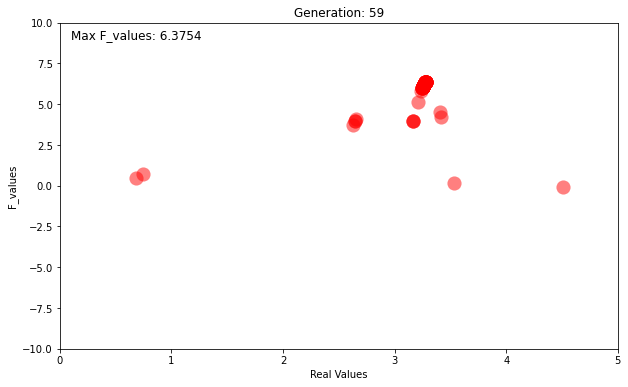

Generation: 59
Max F_values: 6.3754
Time for Generation 59: 0.0484 seconds



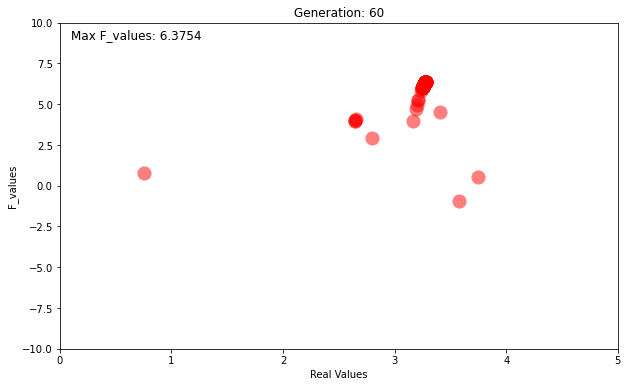

Generation: 60
Max F_values: 6.3754
Time for Generation 60: 0.0852 seconds



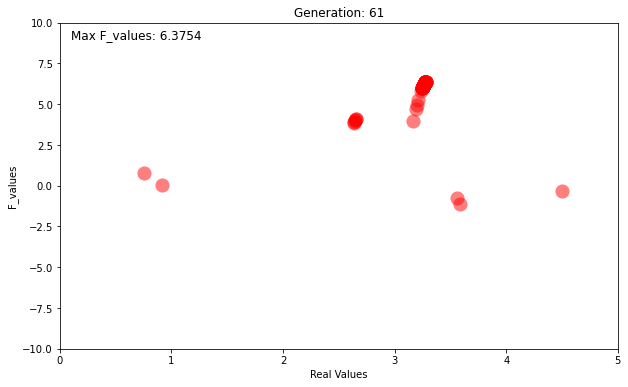

Generation: 61
Max F_values: 6.3754
Time for Generation 61: 0.0469 seconds



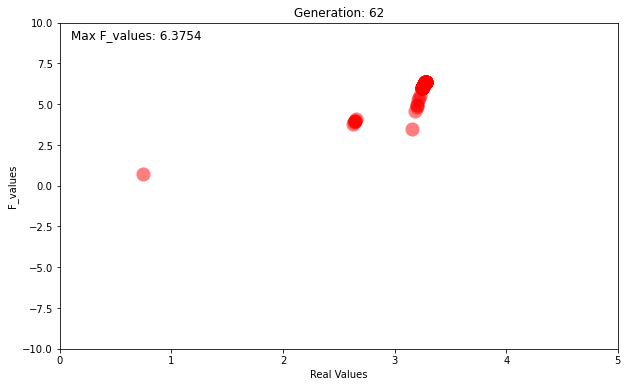

Generation: 62
Max F_values: 6.3754
Time for Generation 62: 0.0474 seconds



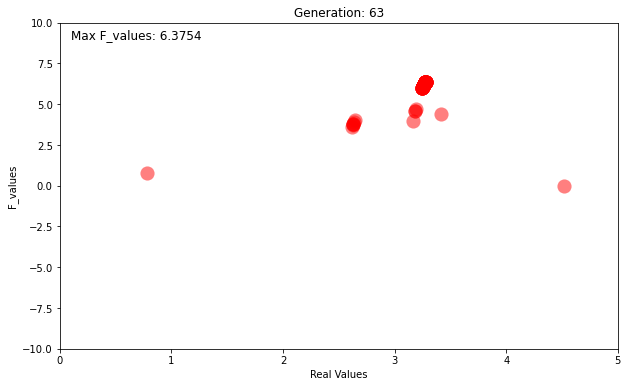

Generation: 63
Max F_values: 6.3754
Time for Generation 63: 0.0475 seconds



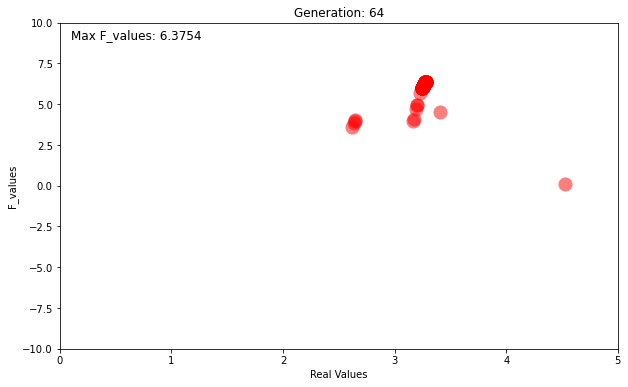

Generation: 64
Max F_values: 6.3754
Time for Generation 64: 0.0498 seconds



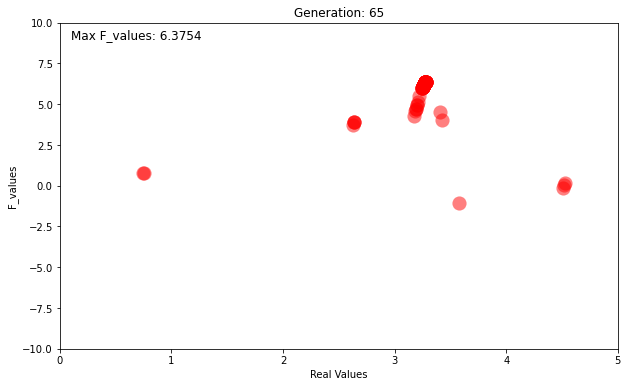

Generation: 65
Max F_values: 6.3754
Time for Generation 65: 0.0473 seconds



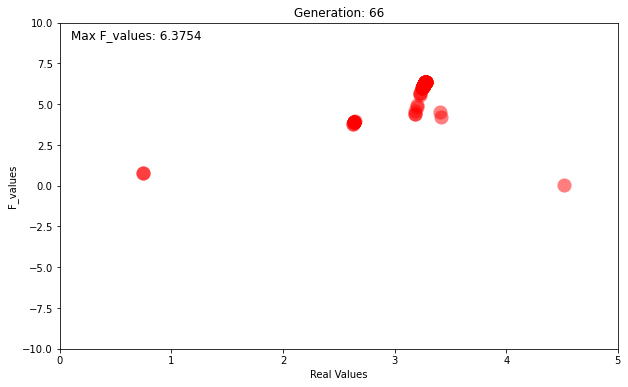

Generation: 66
Max F_values: 6.3754
Time for Generation 66: 0.0467 seconds



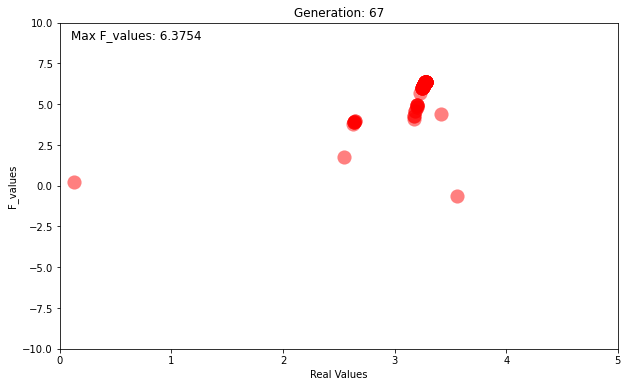

Generation: 67
Max F_values: 6.3754
Time for Generation 67: 0.0465 seconds



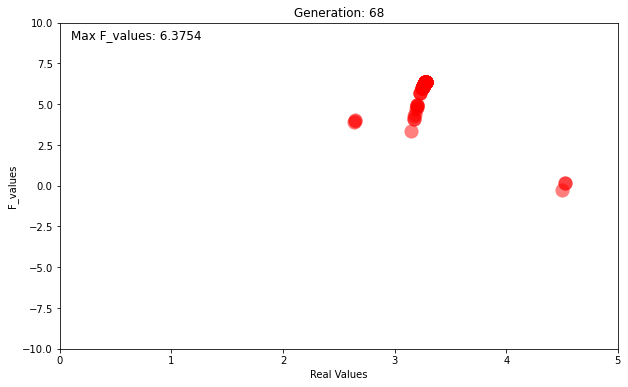

Generation: 68
Max F_values: 6.3754
Time for Generation 68: 0.0470 seconds



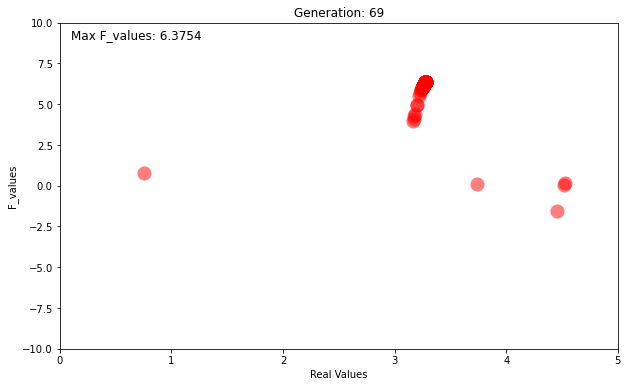

Generation: 69
Max F_values: 6.3754
Time for Generation 69: 0.0497 seconds



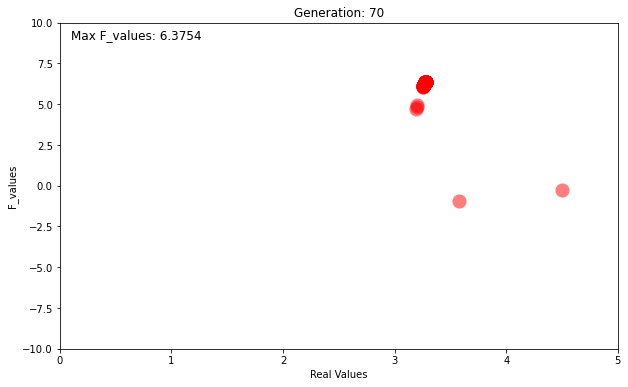

Generation: 70
Max F_values: 6.3754
Time for Generation 70: 0.0462 seconds



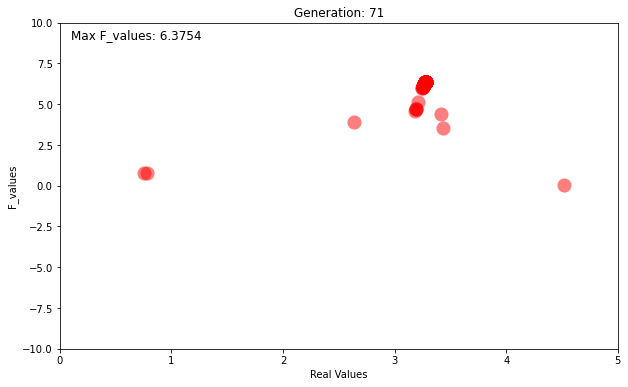

Generation: 71
Max F_values: 6.3754
Time for Generation 71: 0.0463 seconds



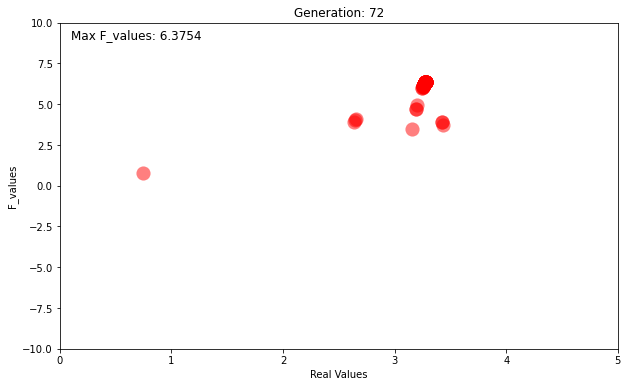

Generation: 72
Max F_values: 6.3754
Time for Generation 72: 0.0464 seconds



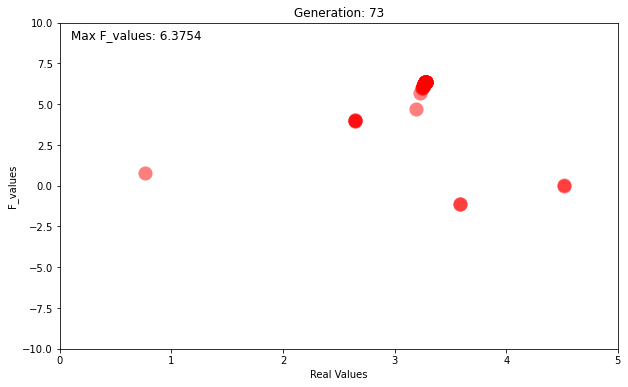

Generation: 73
Max F_values: 6.3754
Time for Generation 73: 0.0857 seconds



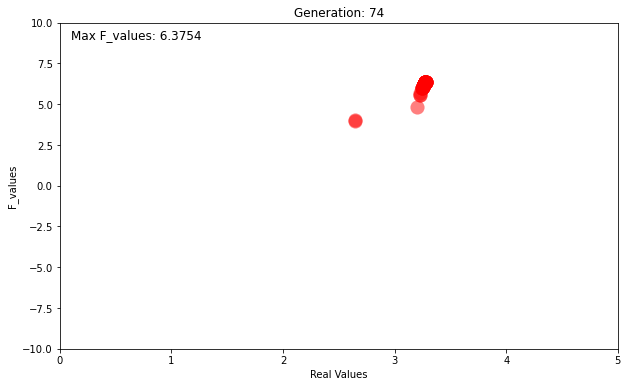

Generation: 74
Max F_values: 6.3754
Time for Generation 74: 0.0478 seconds



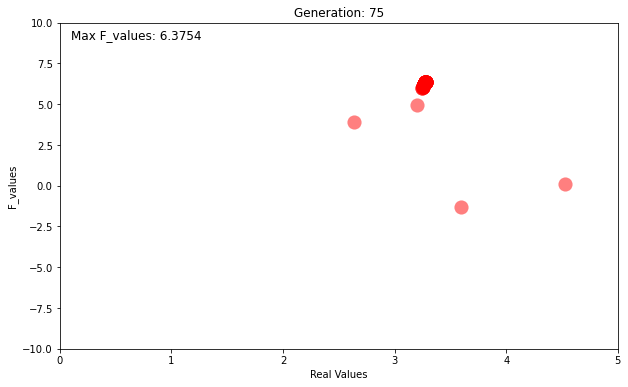

Generation: 75
Max F_values: 6.3754
Time for Generation 75: 0.0488 seconds



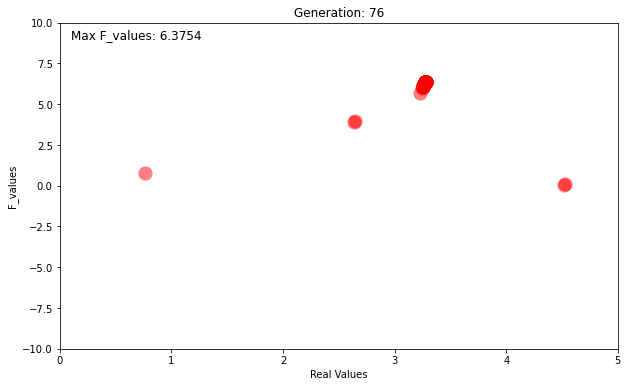

Generation: 76
Max F_values: 6.3754
Time for Generation 76: 0.0467 seconds



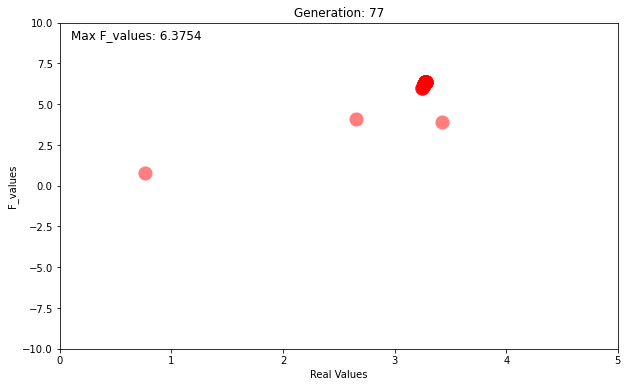

Generation: 77
Max F_values: 6.3754
Time for Generation 77: 0.0459 seconds



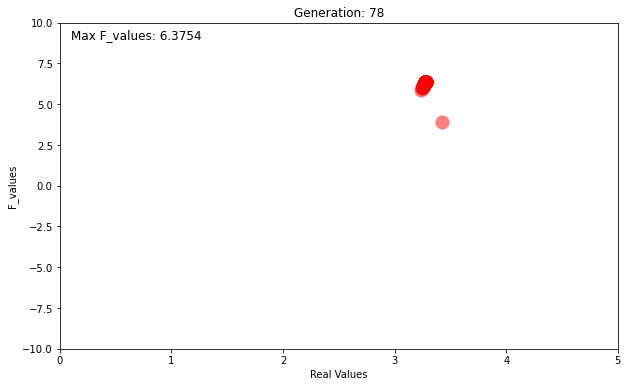

Generation: 78
Max F_values: 6.3754
Time for Generation 78: 0.0470 seconds



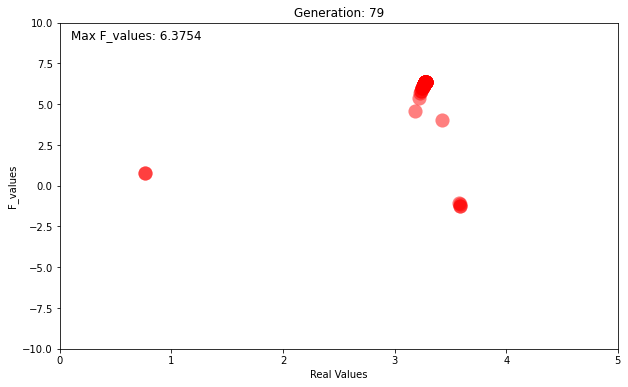

Generation: 79
Max F_values: 6.3754
Time for Generation 79: 0.0465 seconds



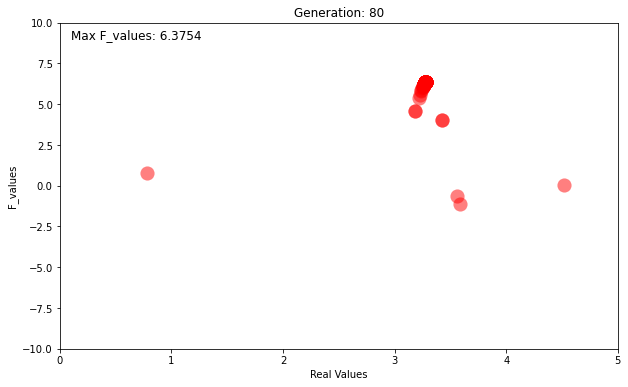

Generation: 80
Max F_values: 6.3754
Time for Generation 80: 0.0465 seconds



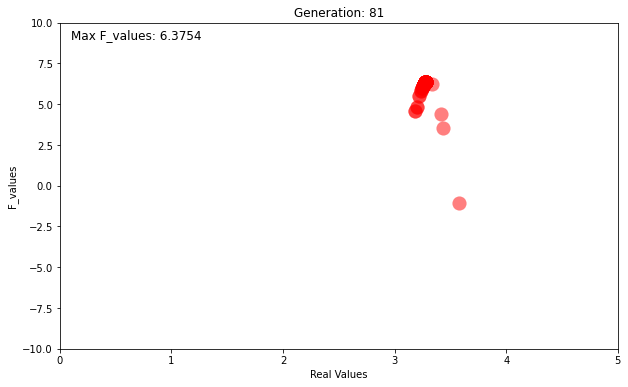

Generation: 81
Max F_values: 6.3754
Time for Generation 81: 0.0460 seconds



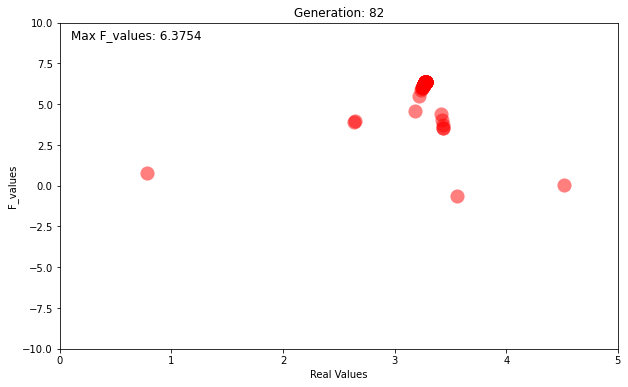

Generation: 82
Max F_values: 6.3754
Time for Generation 82: 0.0511 seconds



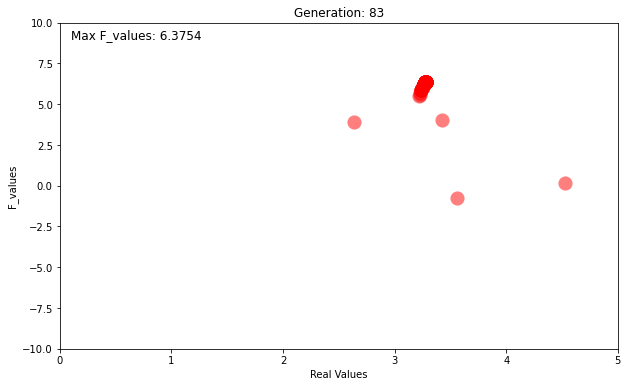

Generation: 83
Max F_values: 6.3754
Time for Generation 83: 0.0461 seconds



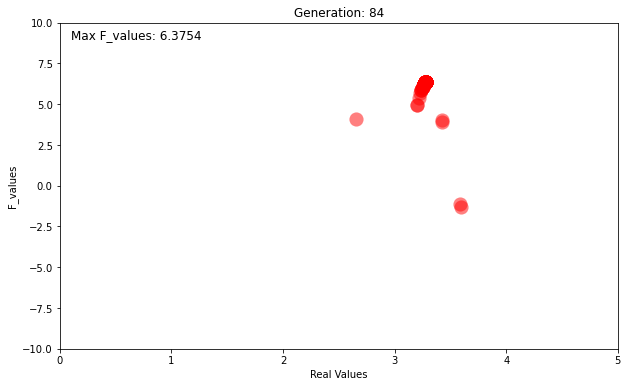

Generation: 84
Max F_values: 6.3754
Time for Generation 84: 0.0452 seconds



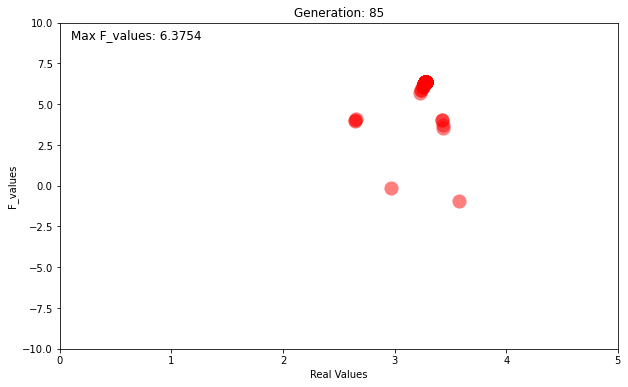

Generation: 85
Max F_values: 6.3754
Time for Generation 85: 0.0456 seconds



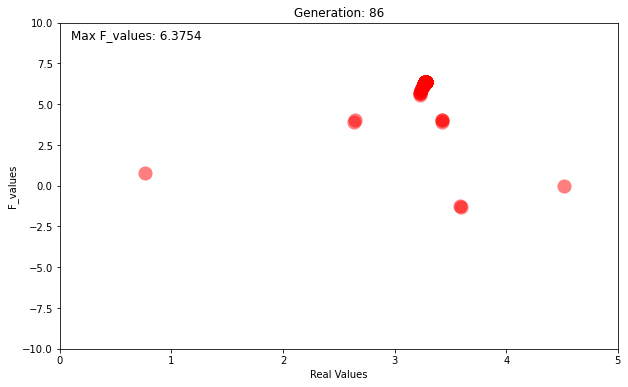

Generation: 86
Max F_values: 6.3754
Time for Generation 86: 0.0858 seconds



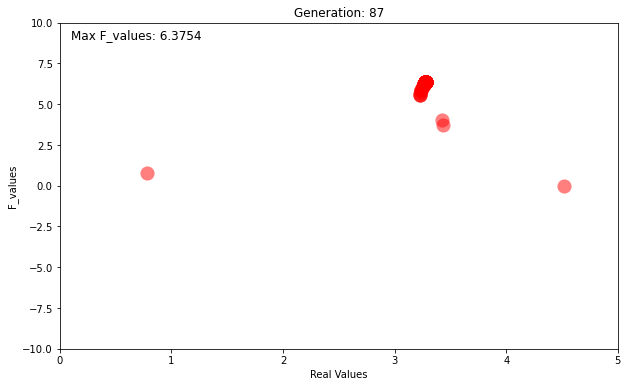

Generation: 87
Max F_values: 6.3754
Time for Generation 87: 0.0522 seconds



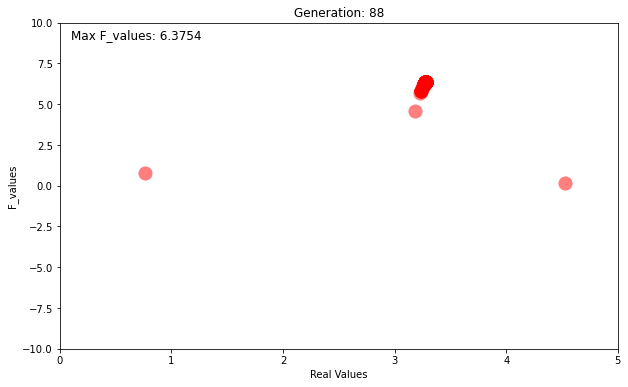

Generation: 88
Max F_values: 6.3754
Time for Generation 88: 0.0495 seconds



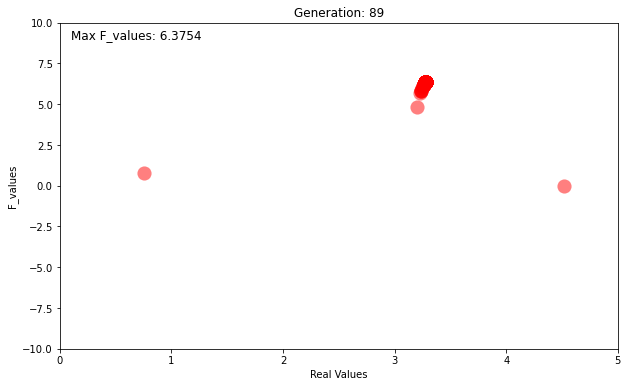

Generation: 89
Max F_values: 6.3754
Time for Generation 89: 0.0443 seconds



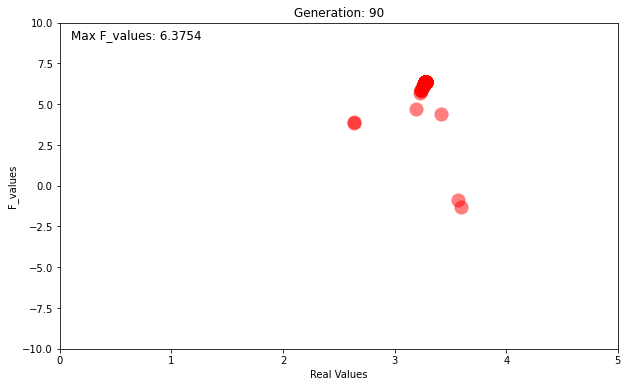

Generation: 90
Max F_values: 6.3754
Time for Generation 90: 0.0449 seconds



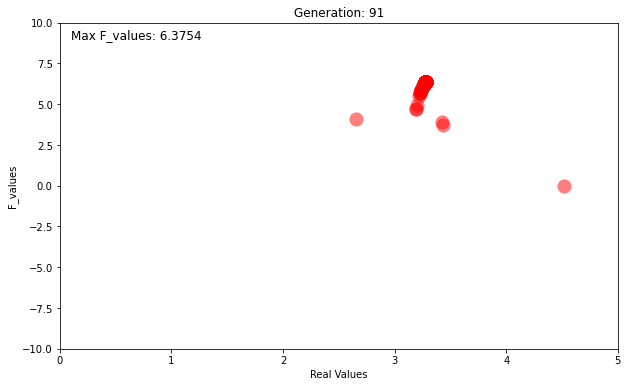

Generation: 91
Max F_values: 6.3754
Time for Generation 91: 0.0446 seconds



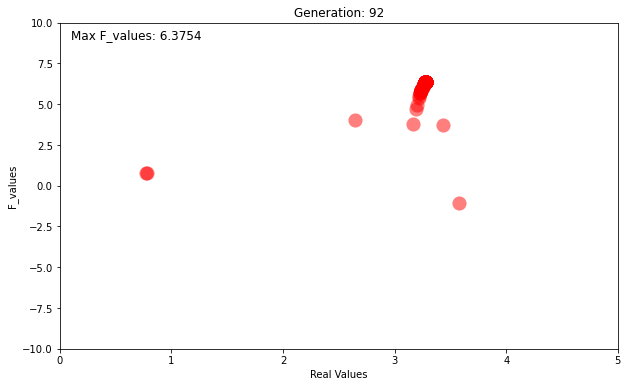

Generation: 92
Max F_values: 6.3754
Time for Generation 92: 0.0599 seconds



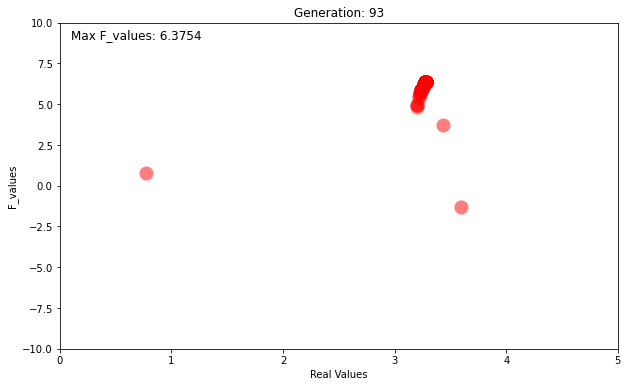

Generation: 93
Max F_values: 6.3754
Time for Generation 93: 0.0465 seconds



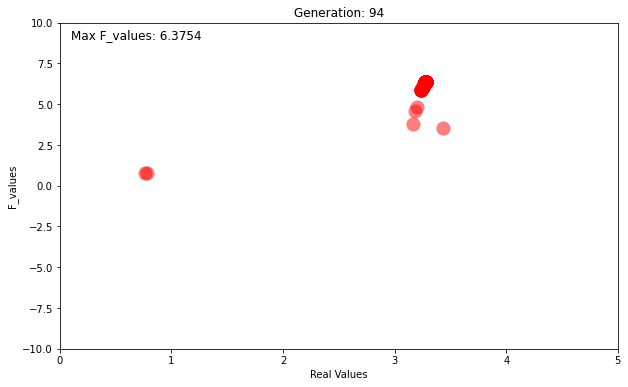

Generation: 94
Max F_values: 6.3754
Time for Generation 94: 0.0458 seconds



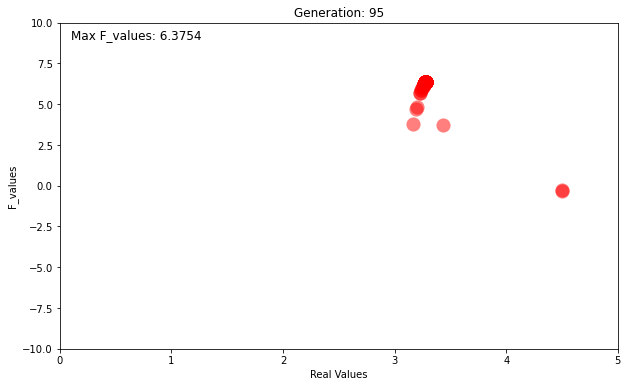

Generation: 95
Max F_values: 6.3754
Time for Generation 95: 0.0487 seconds



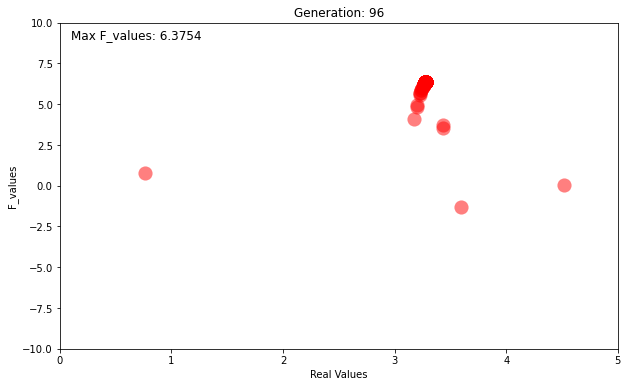

Generation: 96
Max F_values: 6.3754
Time for Generation 96: 0.0449 seconds



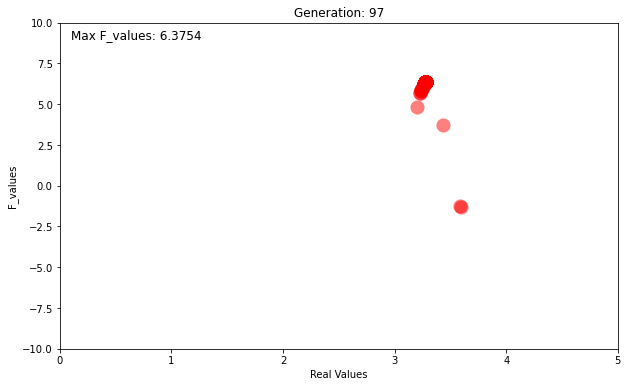

Generation: 97
Max F_values: 6.3754
Time for Generation 97: 0.0460 seconds



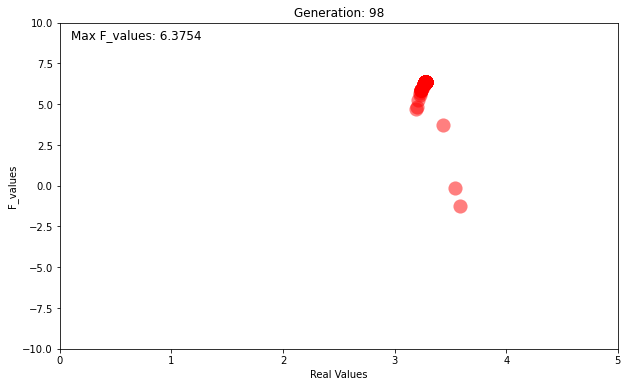

Generation: 98
Max F_values: 6.3754
Time for Generation 98: 0.0557 seconds



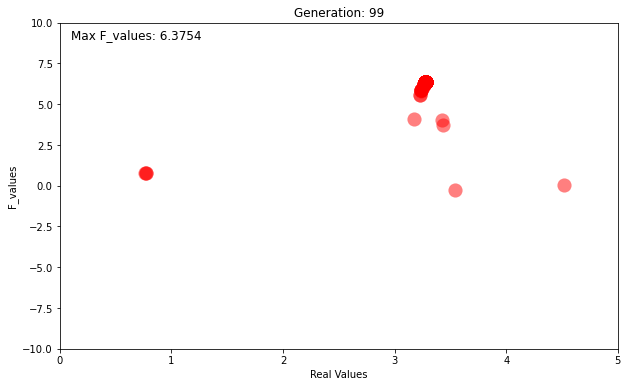

Generation: 99
Max F_values: 6.3754
Time for Generation 99: 0.0871 seconds



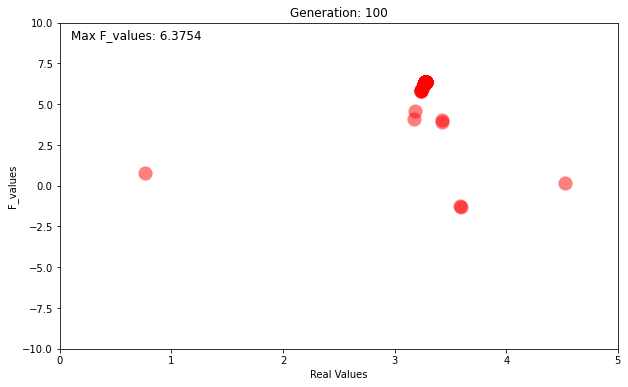

Generation: 100
Max F_values: 6.3754
Time for Generation 100: 0.0459 seconds



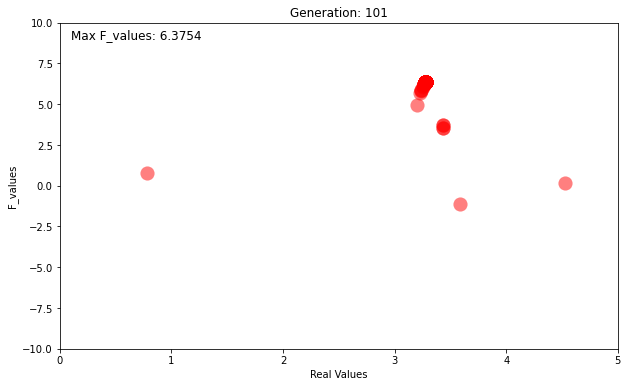

Generation: 101
Max F_values: 6.3754
Time for Generation 101: 0.0447 seconds



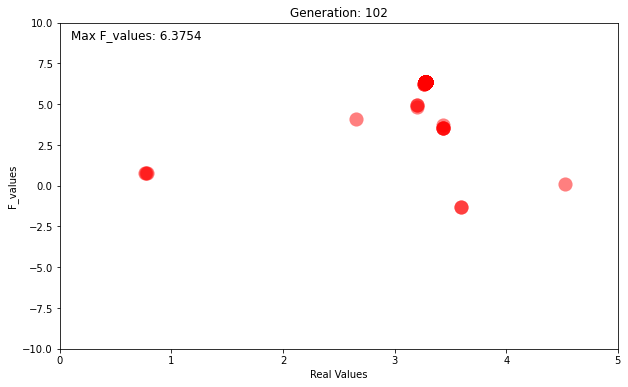

Generation: 102
Max F_values: 6.3754
Time for Generation 102: 0.0457 seconds



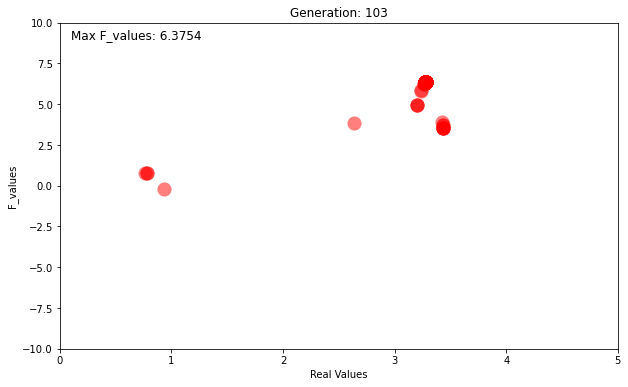

Generation: 103
Max F_values: 6.3754
Time for Generation 103: 0.0484 seconds



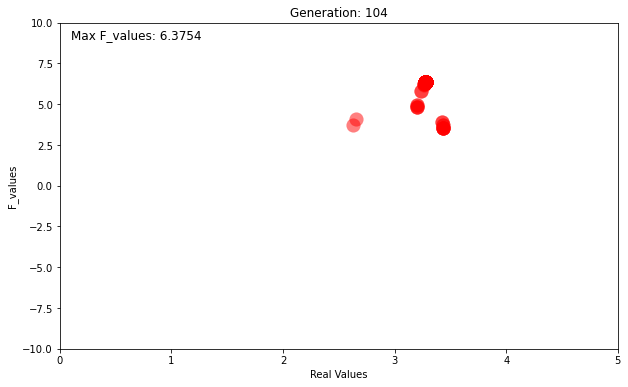

Generation: 104
Max F_values: 6.3754
Time for Generation 104: 0.0468 seconds



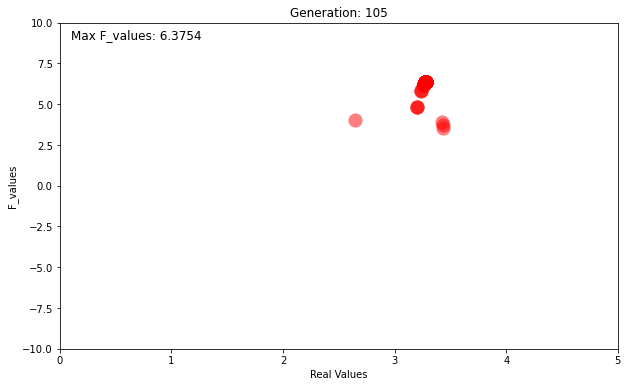

Generation: 105
Max F_values: 6.3754
Time for Generation 105: 0.0467 seconds



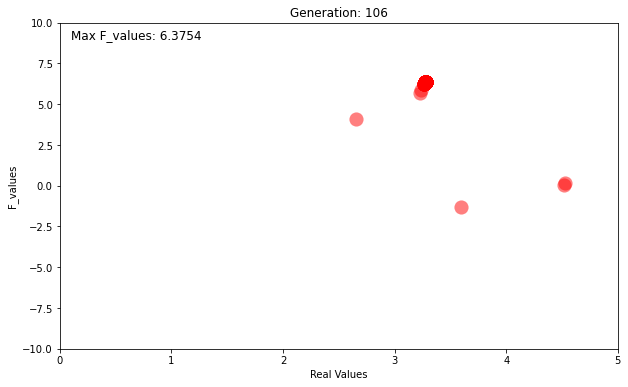

Generation: 106
Max F_values: 6.3754
Time for Generation 106: 0.0470 seconds



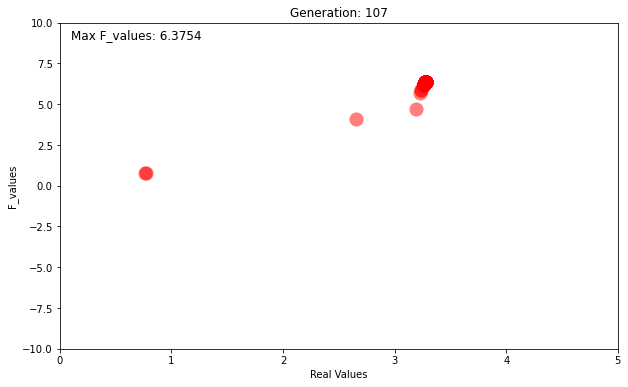

Generation: 107
Max F_values: 6.3754
Time for Generation 107: 0.0557 seconds



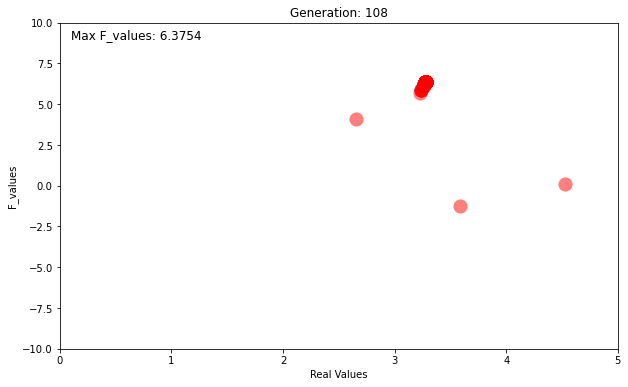

Generation: 108
Max F_values: 6.3754
Time for Generation 108: 0.0461 seconds



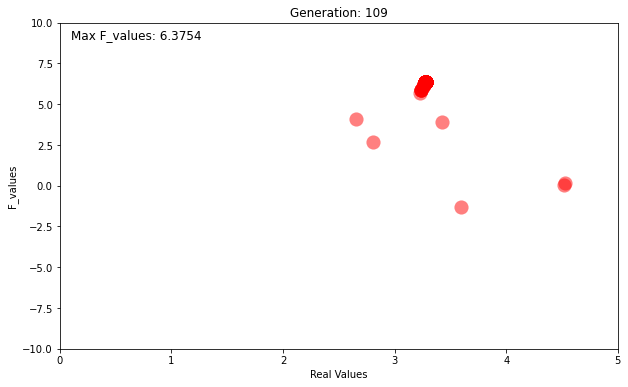

Generation: 109
Max F_values: 6.3754
Time for Generation 109: 0.0464 seconds



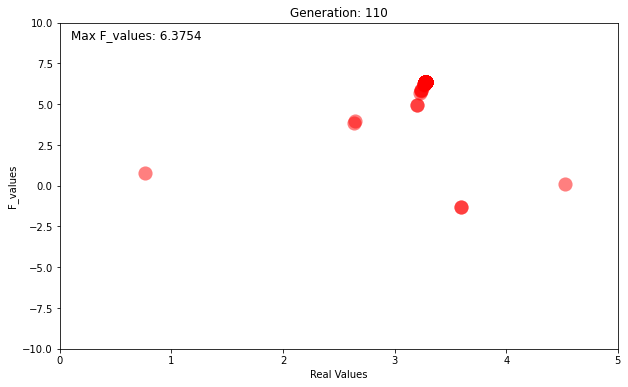

Generation: 110
Max F_values: 6.3754
Time for Generation 110: 0.0464 seconds



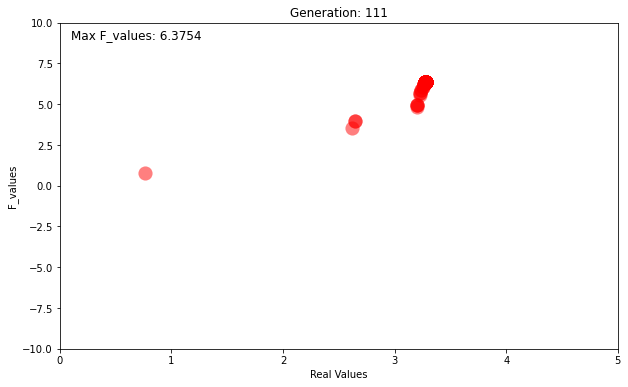

Generation: 111
Max F_values: 6.3754
Time for Generation 111: 0.0487 seconds



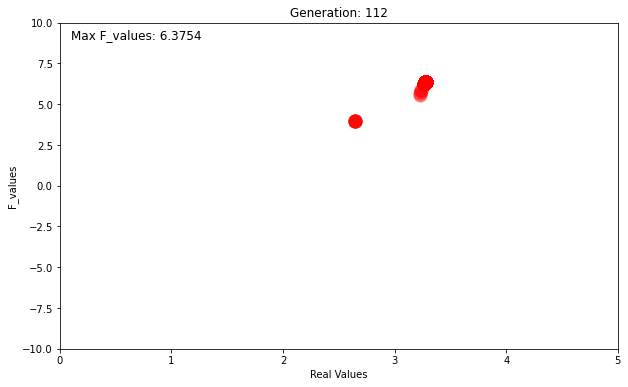

Generation: 112
Max F_values: 6.3754
Time for Generation 112: 0.0860 seconds



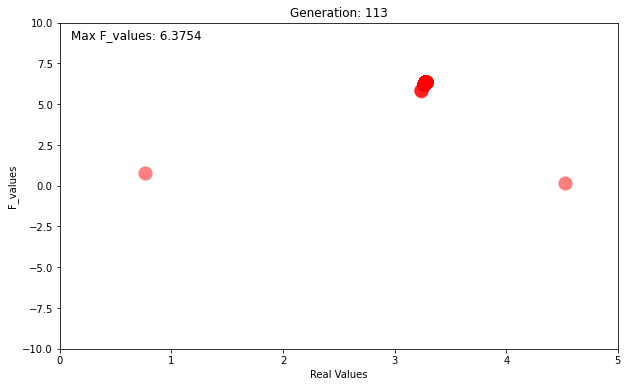

Generation: 113
Max F_values: 6.3754
Time for Generation 113: 0.0446 seconds



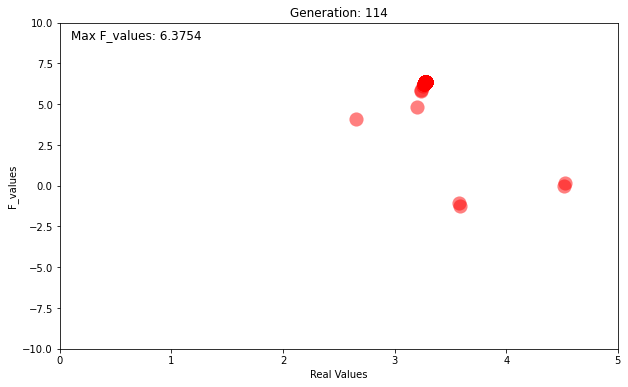

Generation: 114
Max F_values: 6.3754
Time for Generation 114: 0.0446 seconds



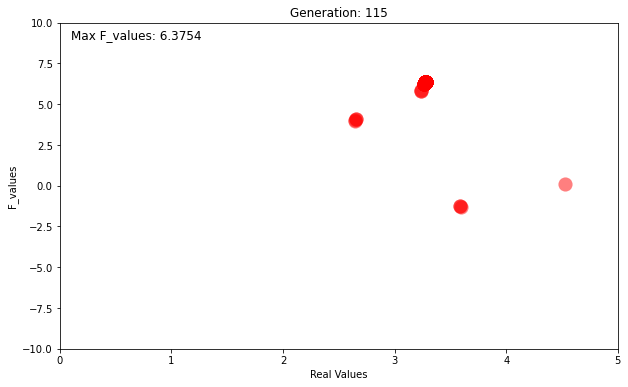

Generation: 115
Max F_values: 6.3754
Time for Generation 115: 0.0489 seconds



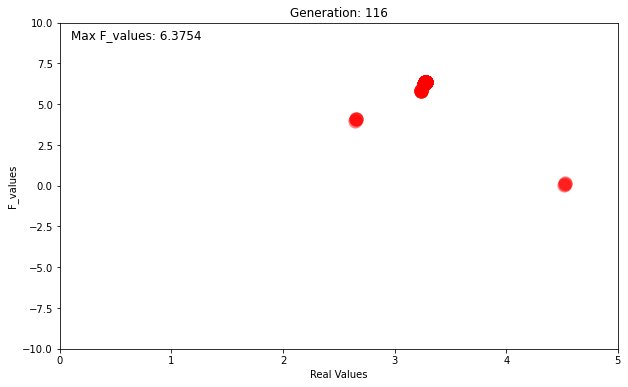

Generation: 116
Max F_values: 6.3754
Time for Generation 116: 0.0463 seconds



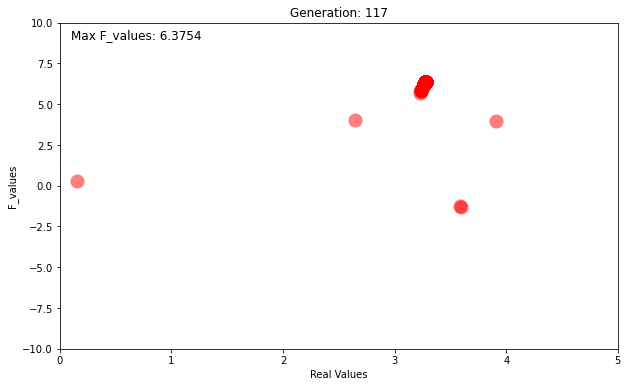

Generation: 117
Max F_values: 6.3754
Time for Generation 117: 0.0467 seconds



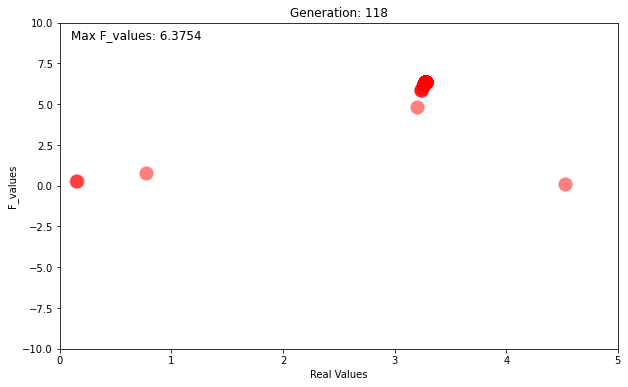

Generation: 118
Max F_values: 6.3754
Time for Generation 118: 0.0464 seconds



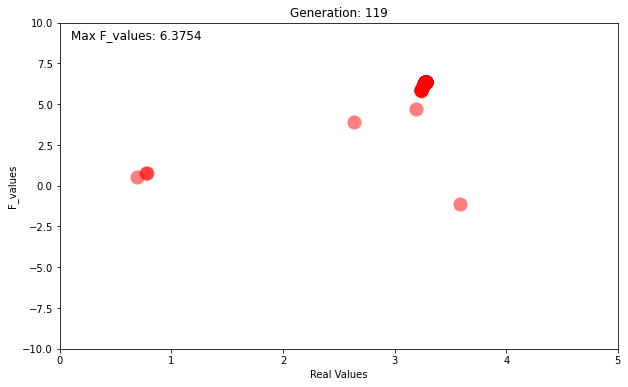

Generation: 119
Max F_values: 6.3754
Time for Generation 119: 0.0489 seconds



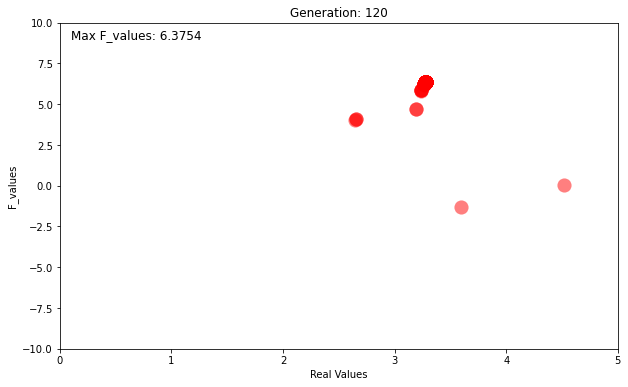

Generation: 120
Max F_values: 6.3754
Time for Generation 120: 0.0500 seconds



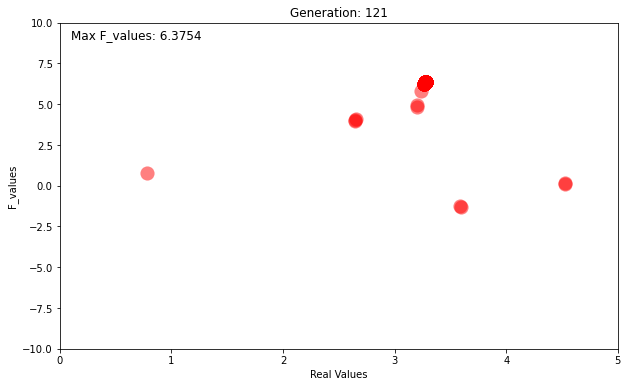

Generation: 121
Max F_values: 6.3754
Time for Generation 121: 0.0487 seconds



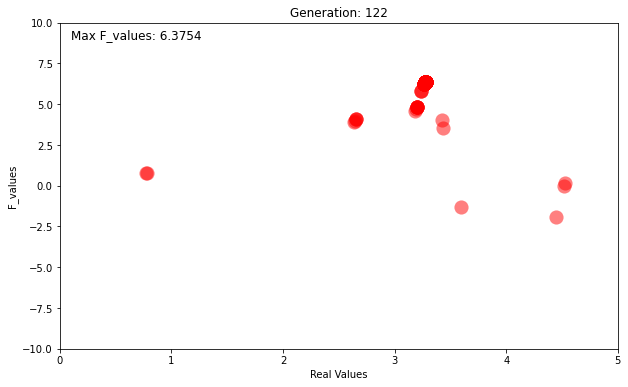

Generation: 122
Max F_values: 6.3754
Time for Generation 122: 0.0462 seconds



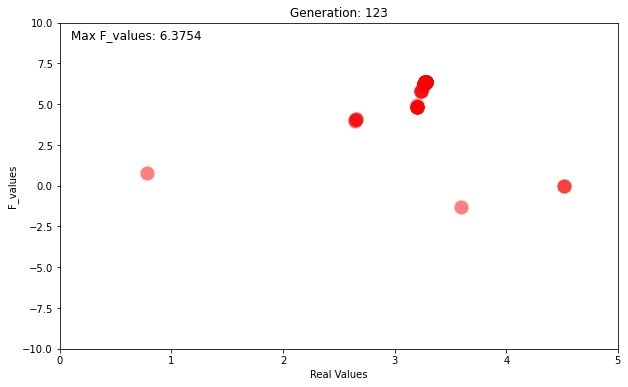

Generation: 123
Max F_values: 6.3754
Time for Generation 123: 0.0446 seconds



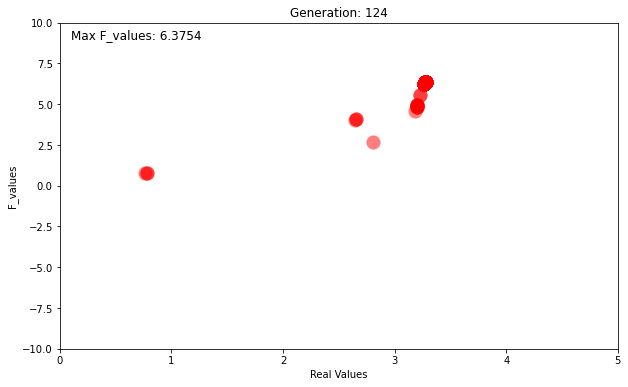

Generation: 124
Max F_values: 6.3754
Time for Generation 124: 0.0507 seconds



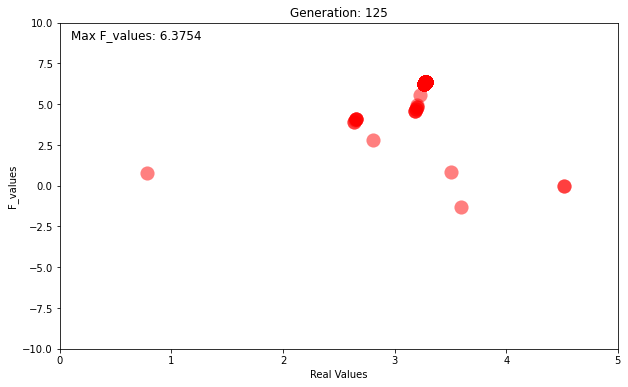

Generation: 125
Max F_values: 6.3754
Time for Generation 125: 0.0879 seconds



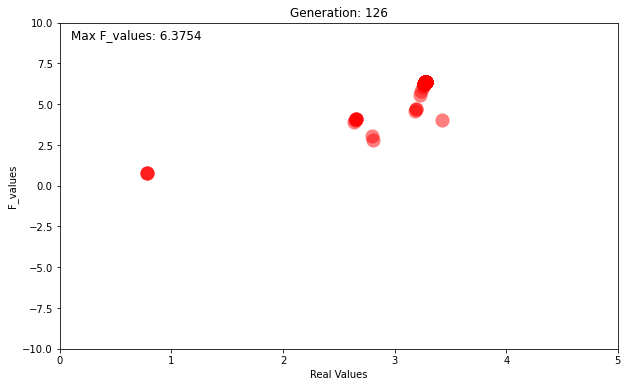

Generation: 126
Max F_values: 6.3754
Time for Generation 126: 0.0467 seconds



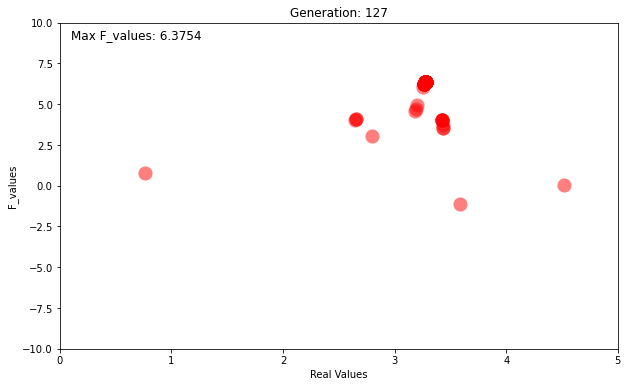

Generation: 127
Max F_values: 6.3754
Time for Generation 127: 0.0478 seconds



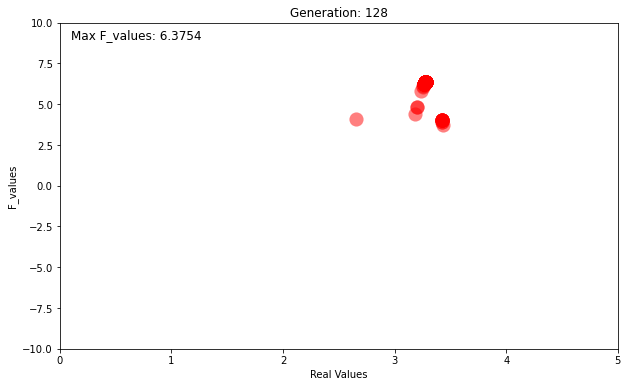

Generation: 128
Max F_values: 6.3754
Time for Generation 128: 0.0668 seconds



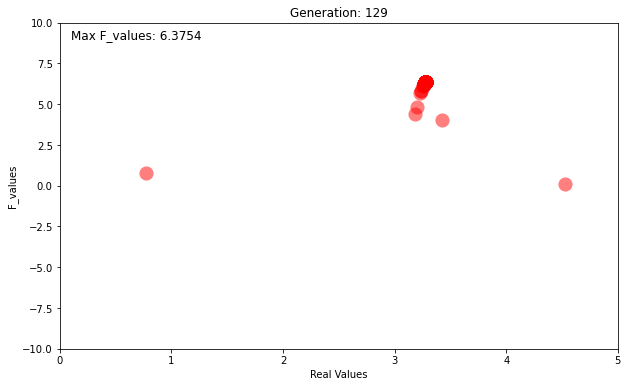

Generation: 129
Max F_values: 6.3754
Time for Generation 129: 0.0460 seconds



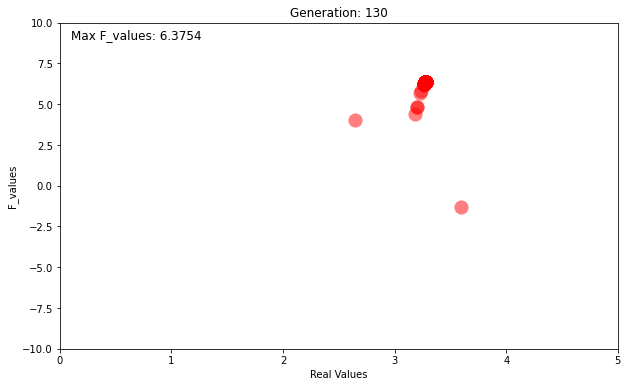

Generation: 130
Max F_values: 6.3754
Time for Generation 130: 0.0459 seconds



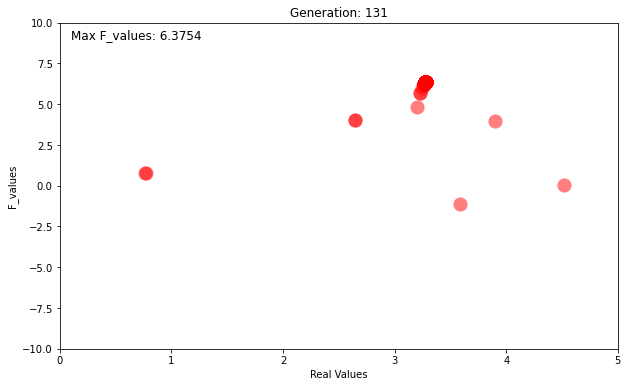

Generation: 131
Max F_values: 6.3754
Time for Generation 131: 0.0489 seconds



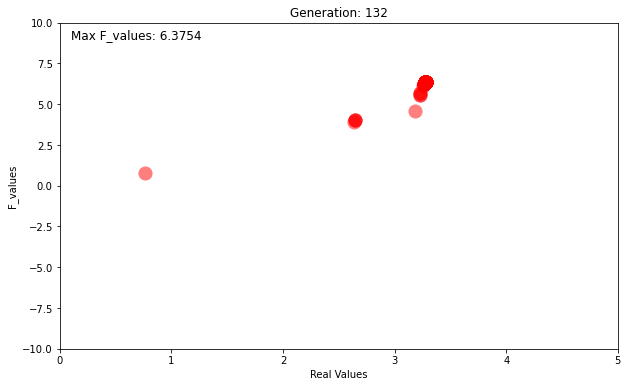

Generation: 132
Max F_values: 6.3754
Time for Generation 132: 0.0463 seconds



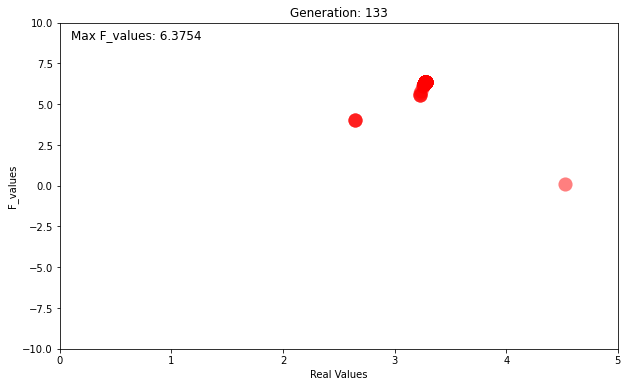

Generation: 133
Max F_values: 6.3754
Time for Generation 133: 0.0469 seconds



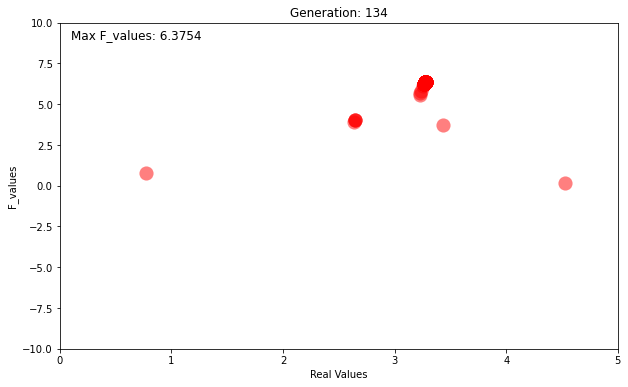

Generation: 134
Max F_values: 6.3754
Time for Generation 134: 0.0532 seconds



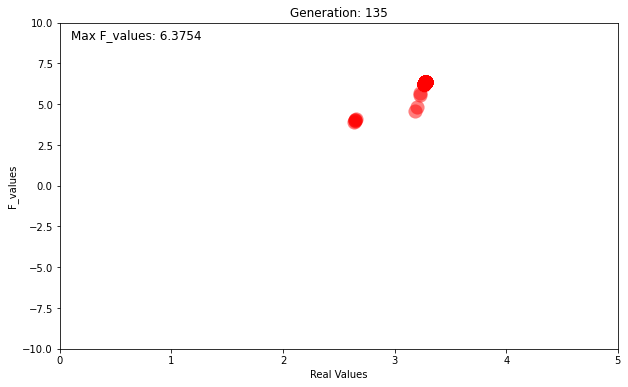

Generation: 135
Max F_values: 6.3754
Time for Generation 135: 0.0463 seconds



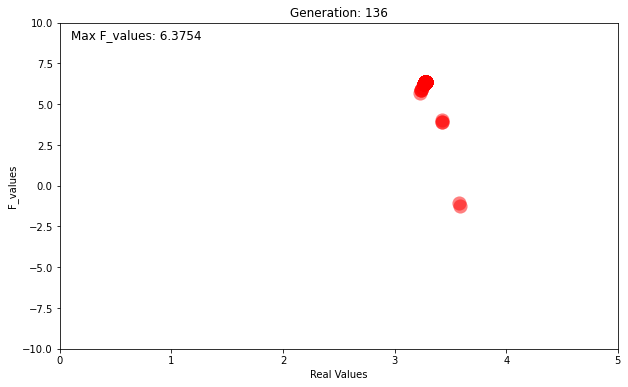

Generation: 136
Max F_values: 6.3754
Time for Generation 136: 0.0456 seconds



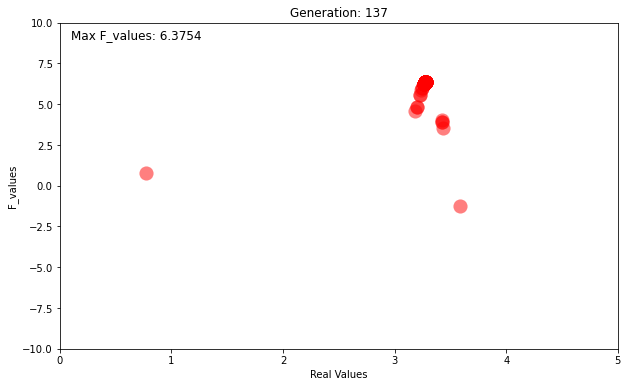

Generation: 137
Max F_values: 6.3754
Time for Generation 137: 0.0483 seconds



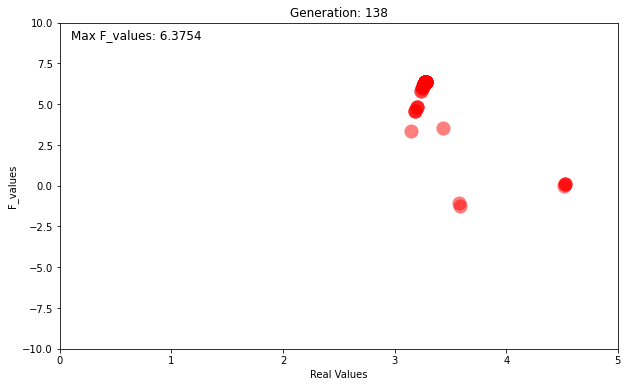

Generation: 138
Max F_values: 6.3754
Time for Generation 138: 0.0864 seconds



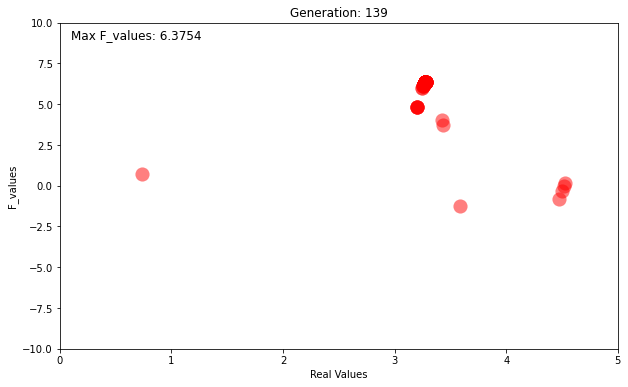

Generation: 139
Max F_values: 6.3754
Time for Generation 139: 0.0457 seconds



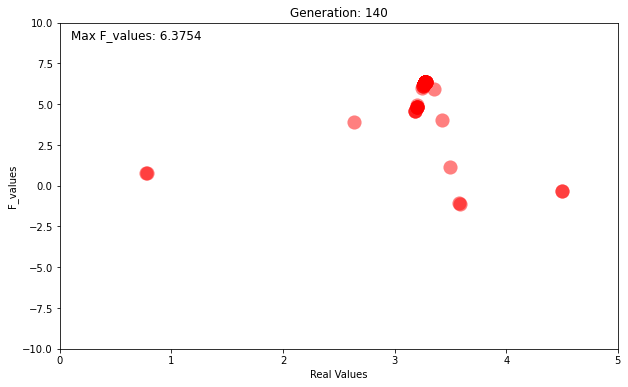

Generation: 140
Max F_values: 6.3754
Time for Generation 140: 0.0488 seconds



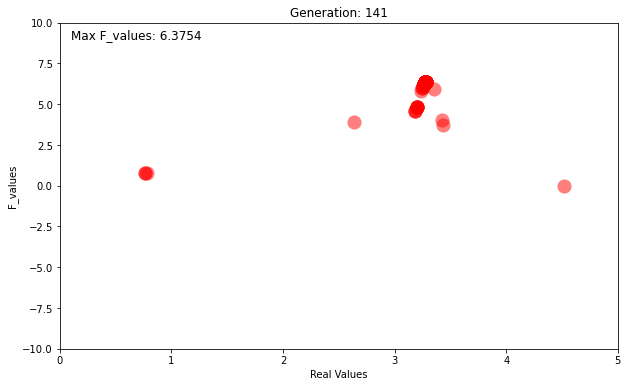

Generation: 141
Max F_values: 6.3754
Time for Generation 141: 0.0461 seconds



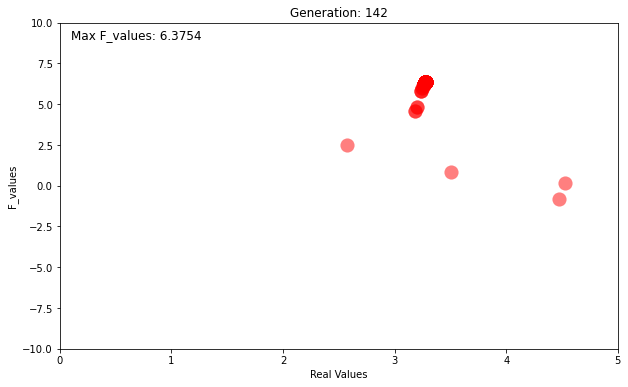

Generation: 142
Max F_values: 6.3754
Time for Generation 142: 0.0456 seconds



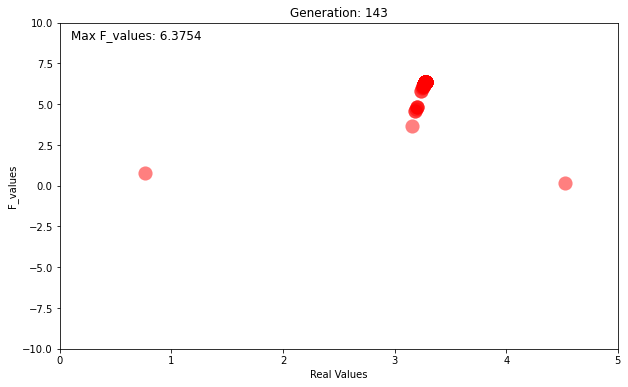

Generation: 143
Max F_values: 6.3754
Time for Generation 143: 0.0557 seconds



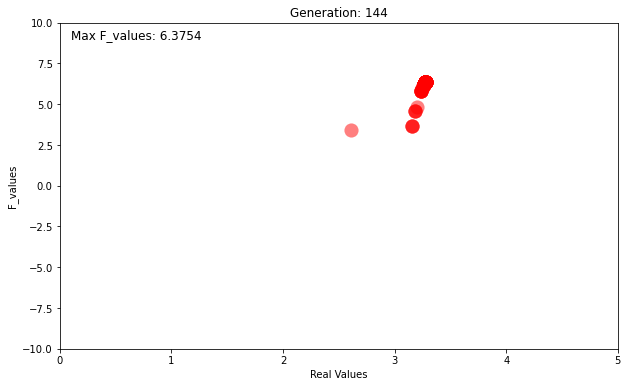

Generation: 144
Max F_values: 6.3754
Time for Generation 144: 0.0531 seconds



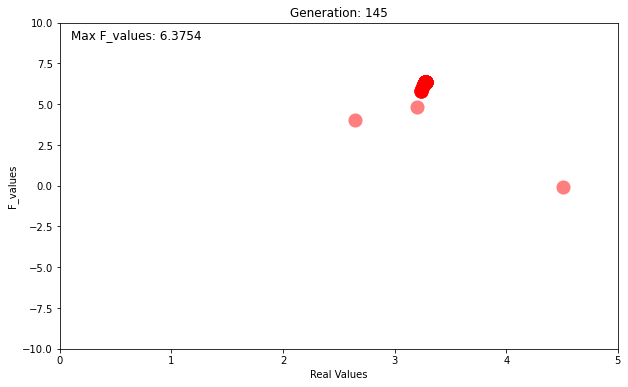

Generation: 145
Max F_values: 6.3754
Time for Generation 145: 0.0458 seconds



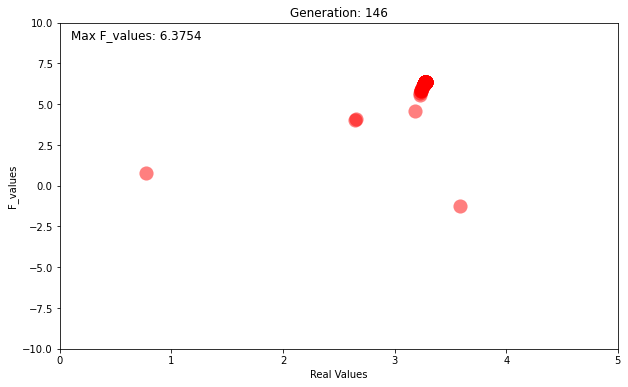

Generation: 146
Max F_values: 6.3754
Time for Generation 146: 0.0460 seconds



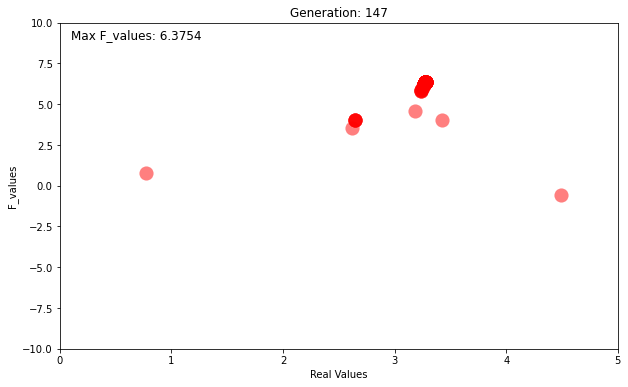

Generation: 147
Max F_values: 6.3754
Time for Generation 147: 0.0457 seconds



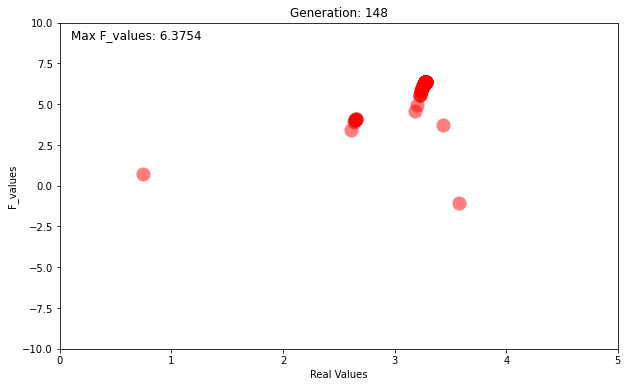

Generation: 148
Max F_values: 6.3754
Time for Generation 148: 0.0504 seconds



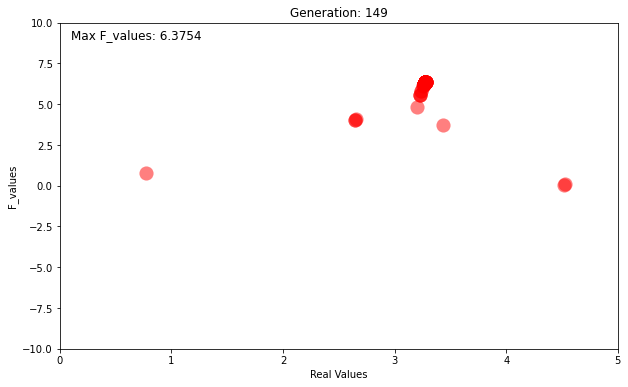

Generation: 149
Max F_values: 6.3754
Time for Generation 149: 0.0460 seconds



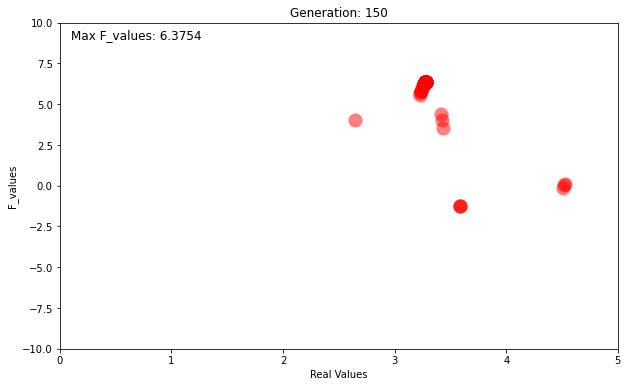

Generation: 150
Max F_values: 6.3754
Time for Generation 150: 0.0469 seconds



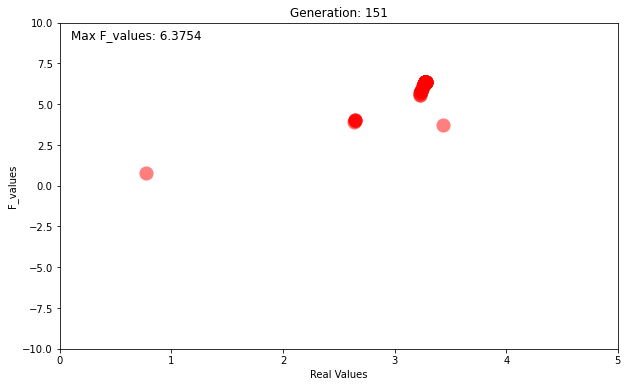

Generation: 151
Max F_values: 6.3754
Time for Generation 151: 0.0938 seconds



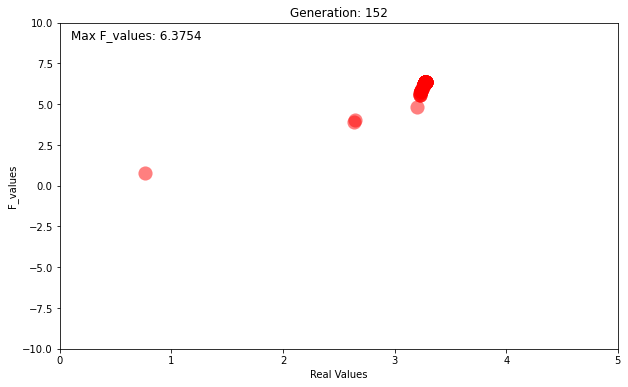

Generation: 152
Max F_values: 6.3754
Time for Generation 152: 0.0470 seconds



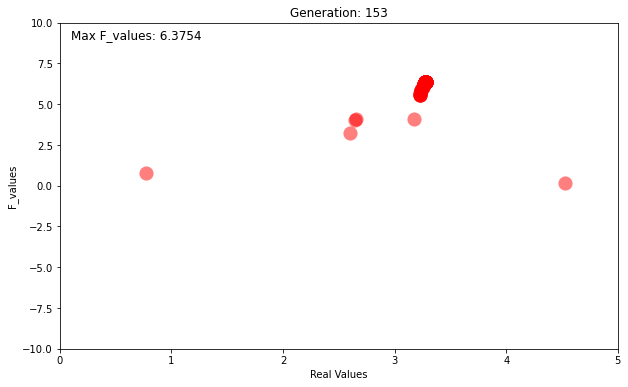

Generation: 153
Max F_values: 6.3754
Time for Generation 153: 0.0476 seconds



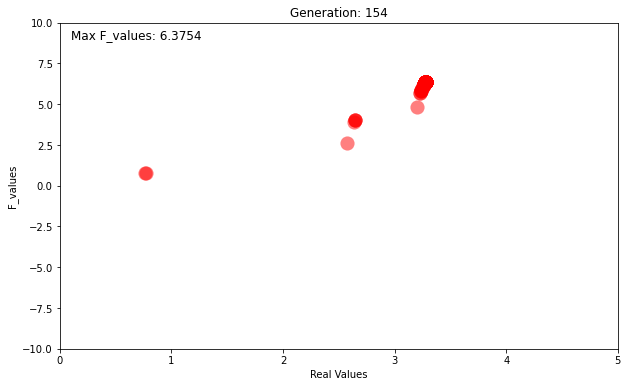

Generation: 154
Max F_values: 6.3754
Time for Generation 154: 0.0469 seconds



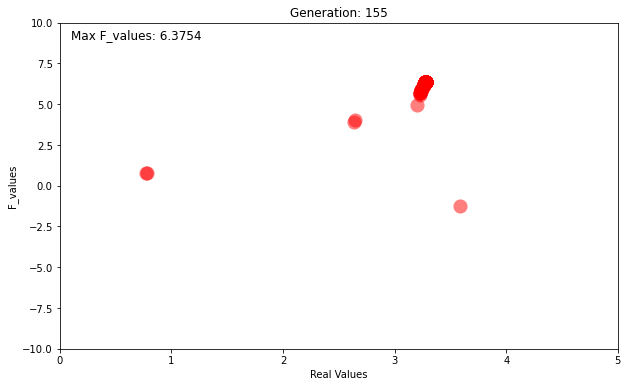

Generation: 155
Max F_values: 6.3754
Time for Generation 155: 0.0466 seconds



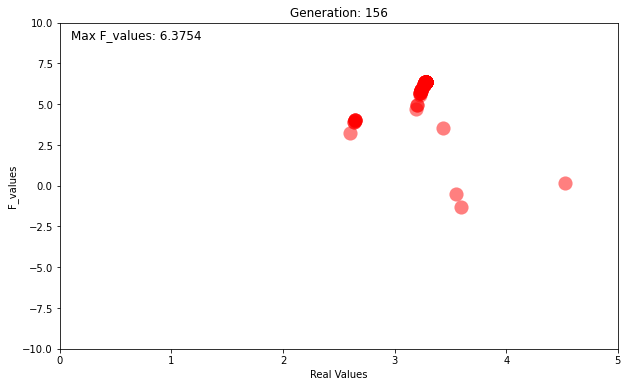

Generation: 156
Max F_values: 6.3754
Time for Generation 156: 0.0474 seconds



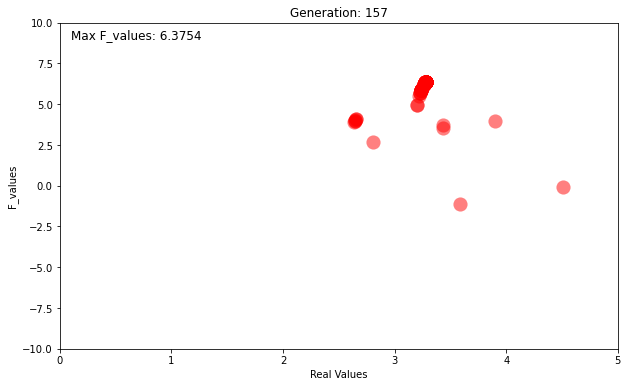

Generation: 157
Max F_values: 6.3754
Time for Generation 157: 0.0476 seconds



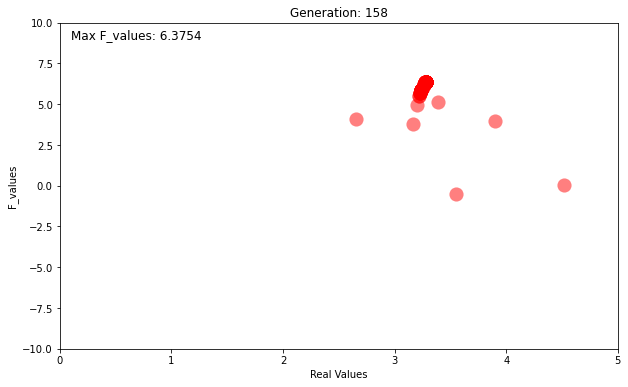

Generation: 158
Max F_values: 6.3754
Time for Generation 158: 0.0499 seconds



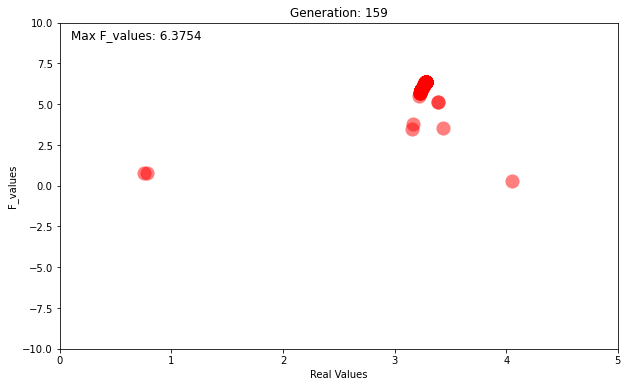

Generation: 159
Max F_values: 6.3754
Time for Generation 159: 0.0469 seconds



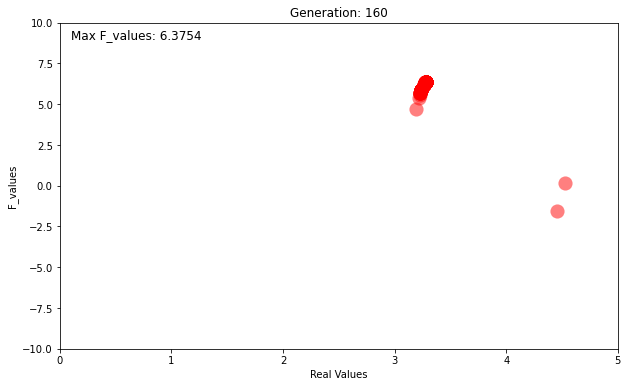

Generation: 160
Max F_values: 6.3754
Time for Generation 160: 0.0452 seconds



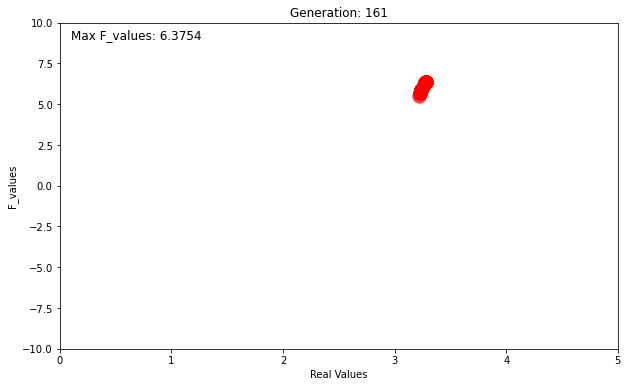

Generation: 161
Max F_values: 6.3754
Time for Generation 161: 0.0578 seconds



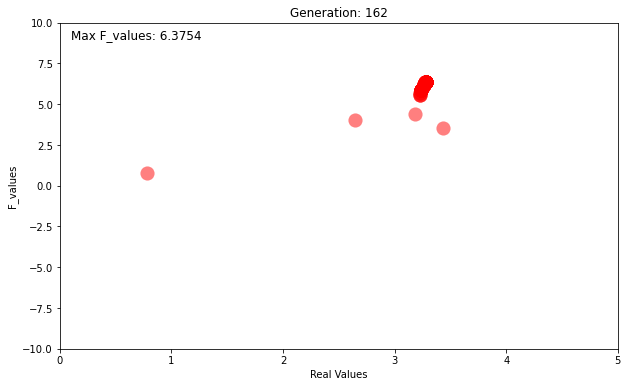

Generation: 162
Max F_values: 6.3754
Time for Generation 162: 0.0600 seconds



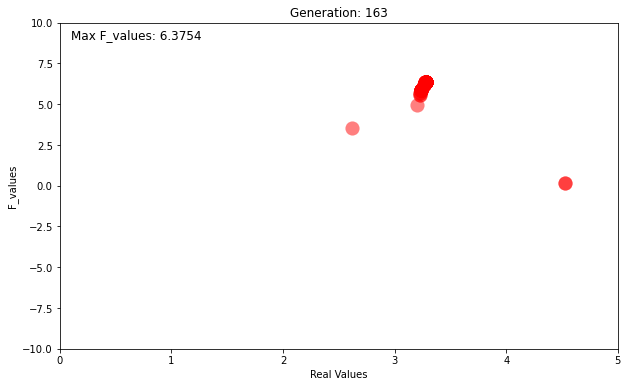

Generation: 163
Max F_values: 6.3754
Time for Generation 163: 0.0478 seconds



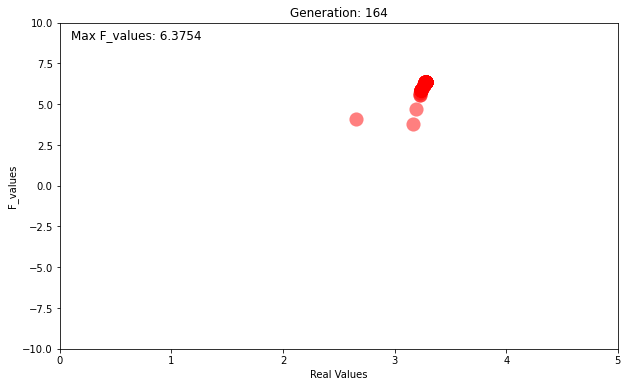

Generation: 164
Max F_values: 6.3754
Time for Generation 164: 0.1022 seconds



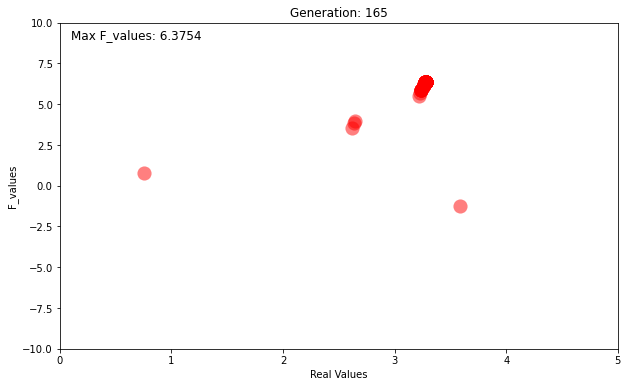

Generation: 165
Max F_values: 6.3754
Time for Generation 165: 0.0460 seconds



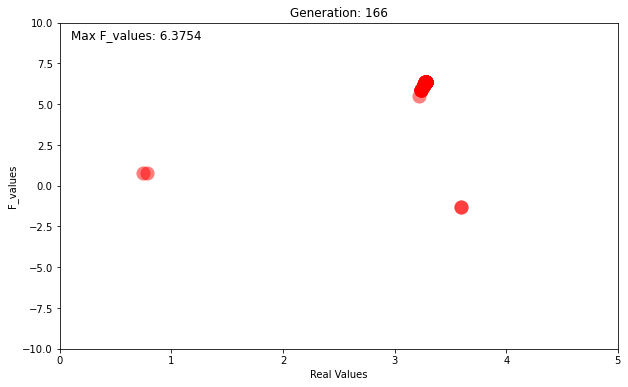

Generation: 166
Max F_values: 6.3754
Time for Generation 166: 0.0463 seconds



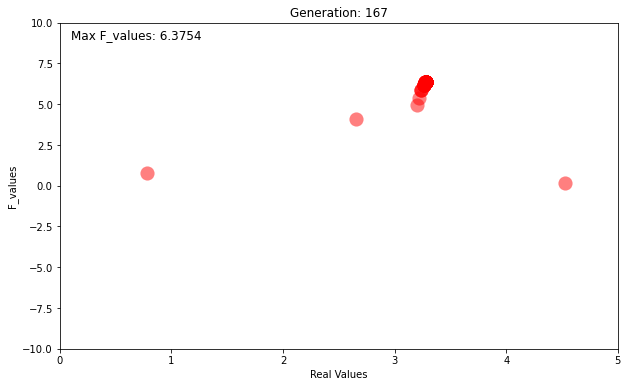

Generation: 167
Max F_values: 6.3754
Time for Generation 167: 0.0476 seconds



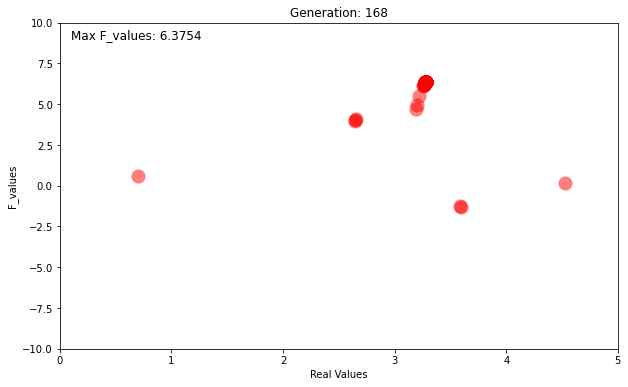

Generation: 168
Max F_values: 6.3754
Time for Generation 168: 0.0459 seconds



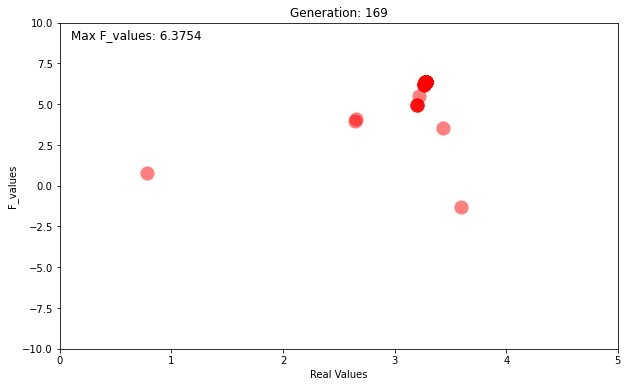

Generation: 169
Max F_values: 6.3754
Time for Generation 169: 0.0475 seconds



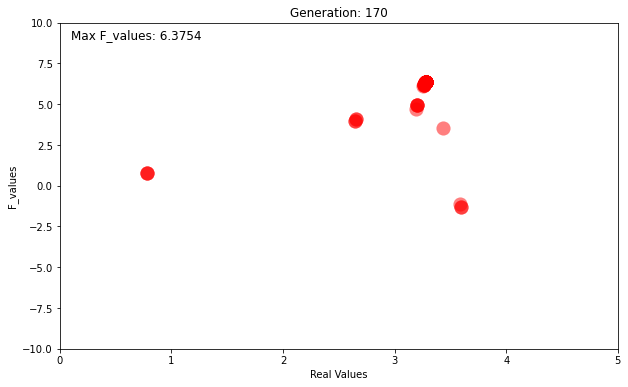

Generation: 170
Max F_values: 6.3754
Time for Generation 170: 0.0481 seconds



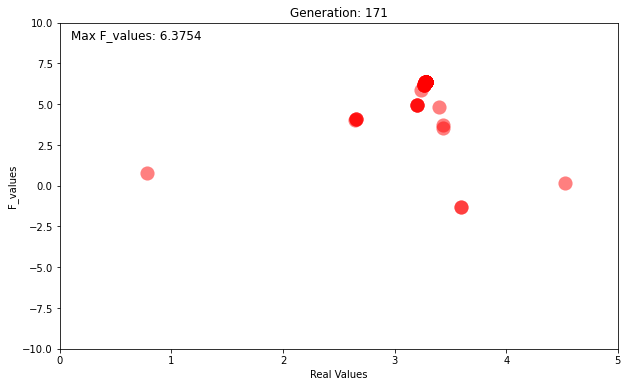

Generation: 171
Max F_values: 6.3754
Time for Generation 171: 0.0463 seconds



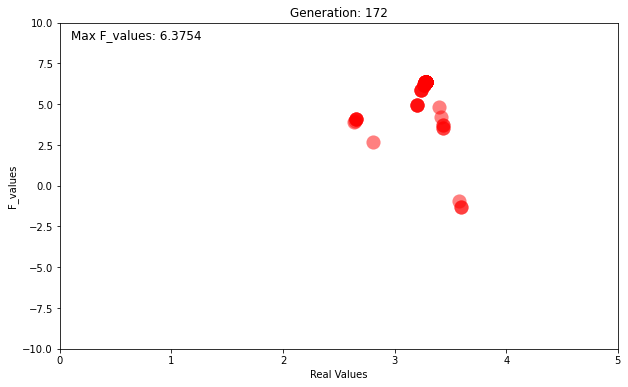

Generation: 172
Max F_values: 6.3754
Time for Generation 172: 0.0465 seconds



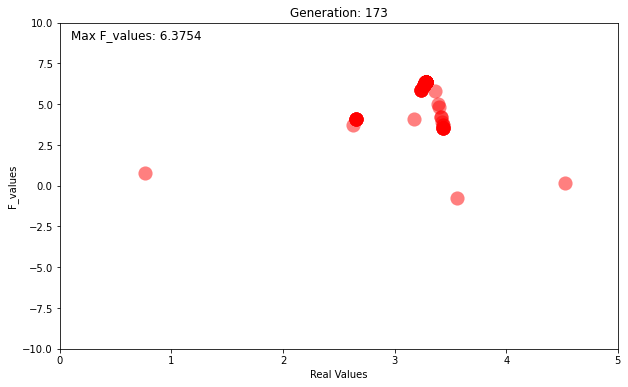

Generation: 173
Max F_values: 6.3754
Time for Generation 173: 0.0625 seconds



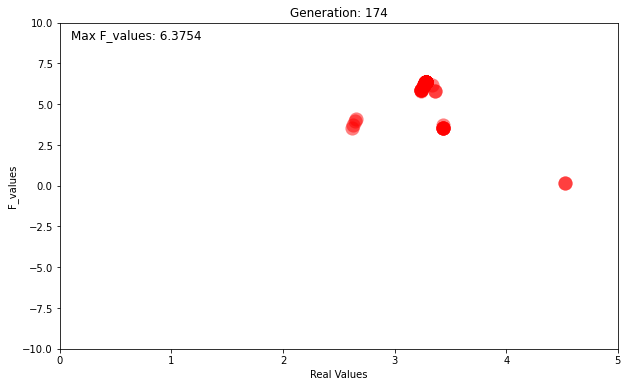

Generation: 174
Max F_values: 6.3754
Time for Generation 174: 0.0454 seconds



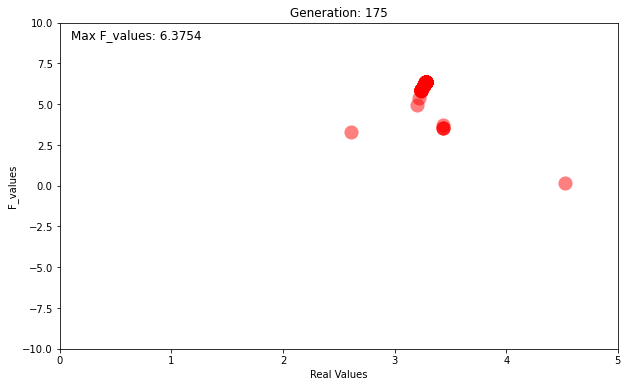

Generation: 175
Max F_values: 6.3754
Time for Generation 175: 0.0453 seconds



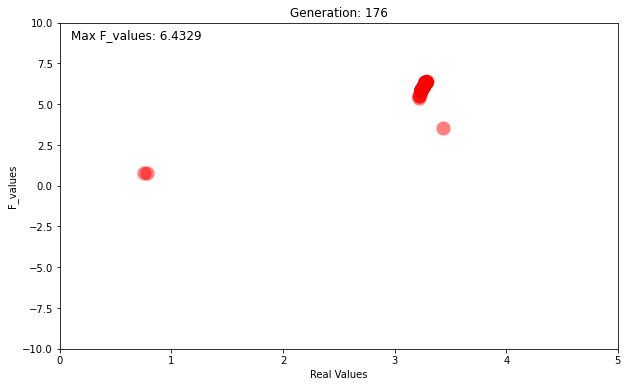

Generation: 176
Max F_values: 6.4329
Time for Generation 176: 0.0447 seconds



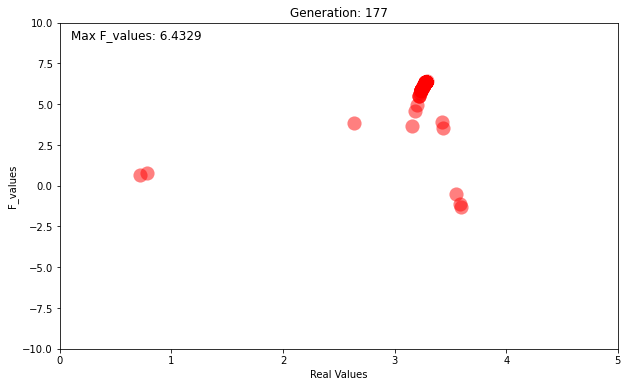

Generation: 177
Max F_values: 6.4329
Time for Generation 177: 0.0989 seconds



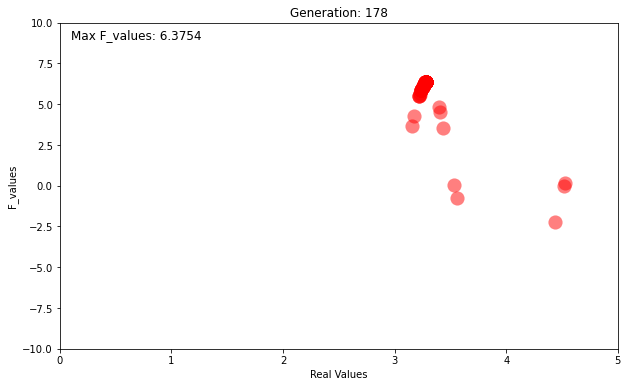

Generation: 178
Max F_values: 6.3754
Time for Generation 178: 0.0452 seconds



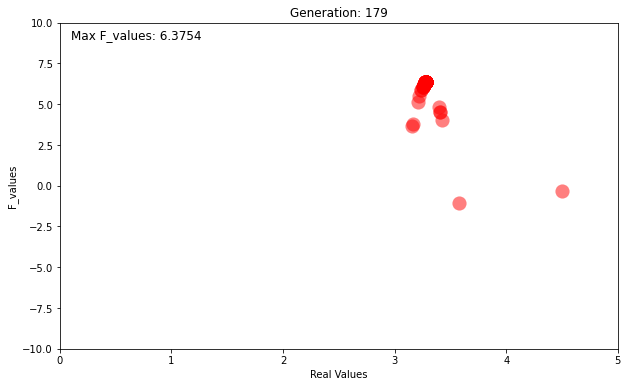

Generation: 179
Max F_values: 6.3754
Time for Generation 179: 0.0471 seconds



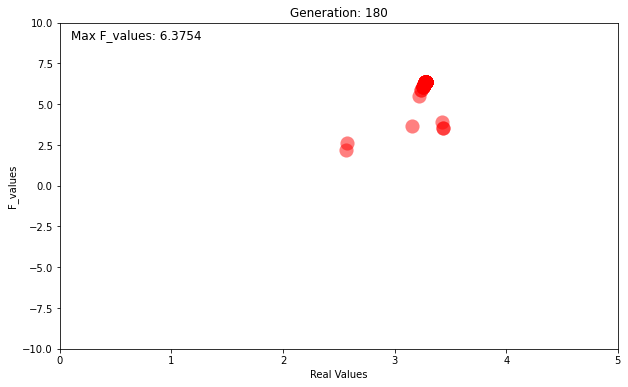

Generation: 180
Max F_values: 6.3754
Time for Generation 180: 0.0474 seconds



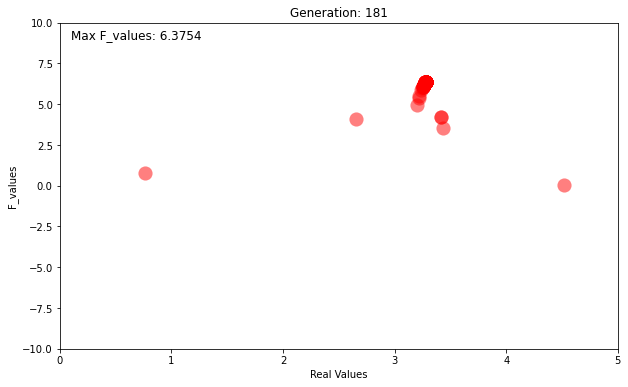

Generation: 181
Max F_values: 6.3754
Time for Generation 181: 0.0442 seconds



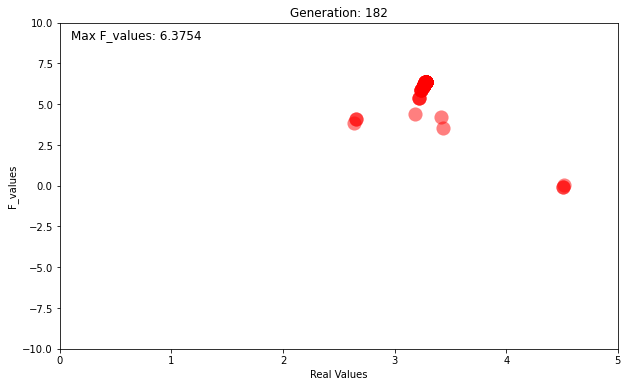

Generation: 182
Max F_values: 6.3754
Time for Generation 182: 0.0465 seconds



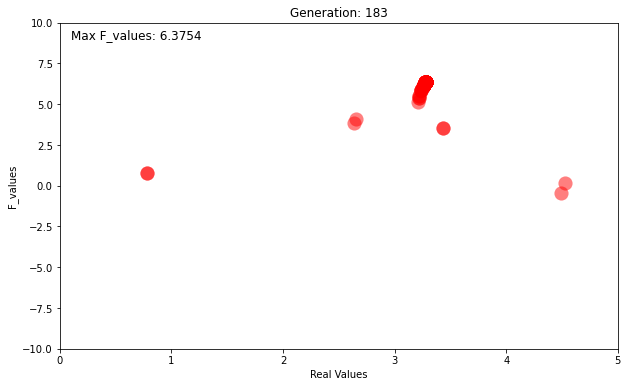

Generation: 183
Max F_values: 6.3754
Time for Generation 183: 0.0493 seconds



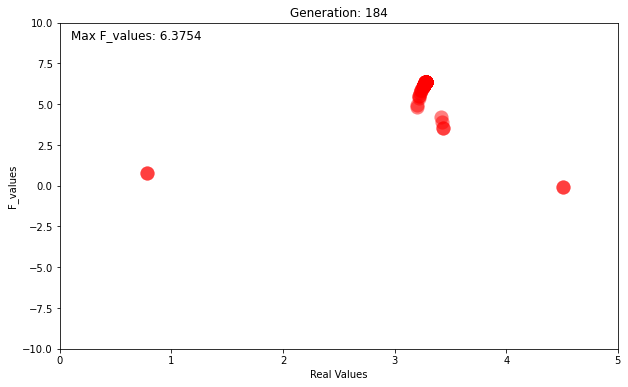

Generation: 184
Max F_values: 6.3754
Time for Generation 184: 0.0549 seconds



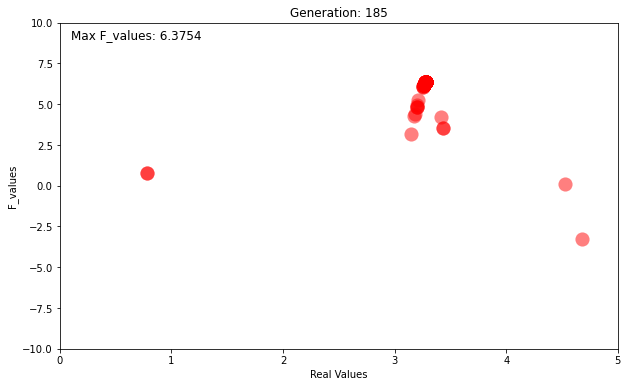

Generation: 185
Max F_values: 6.3754
Time for Generation 185: 0.0501 seconds



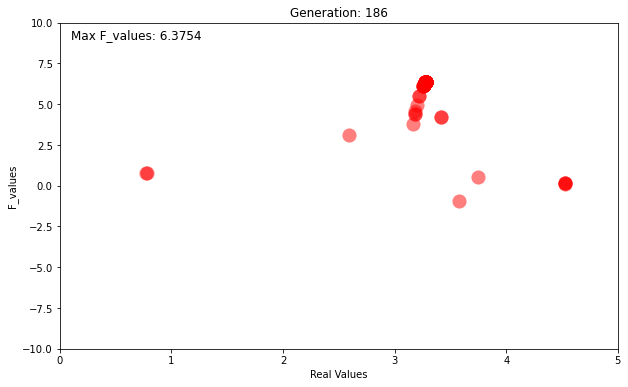

Generation: 186
Max F_values: 6.3754
Time for Generation 186: 0.0449 seconds



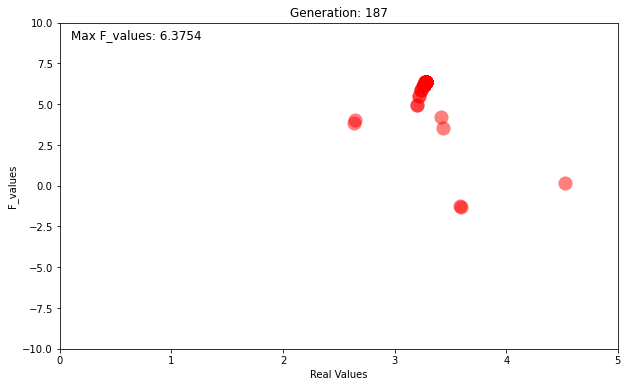

Generation: 187
Max F_values: 6.3754
Time for Generation 187: 0.0481 seconds



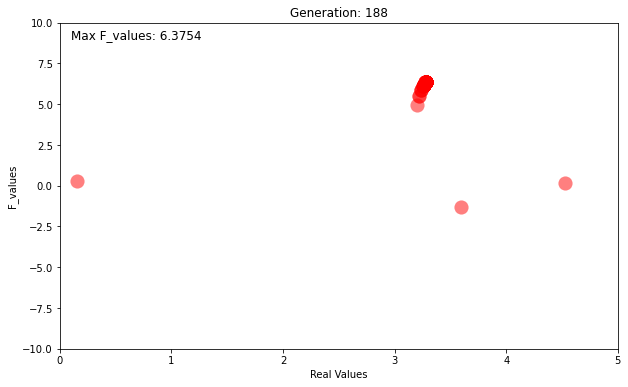

Generation: 188
Max F_values: 6.3754
Time for Generation 188: 0.0481 seconds



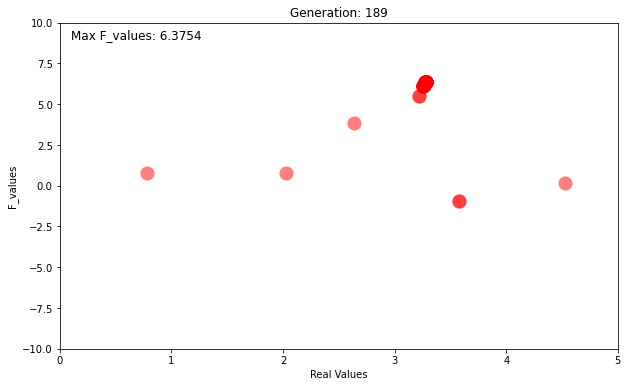

Generation: 189
Max F_values: 6.3754
Time for Generation 189: 0.0467 seconds



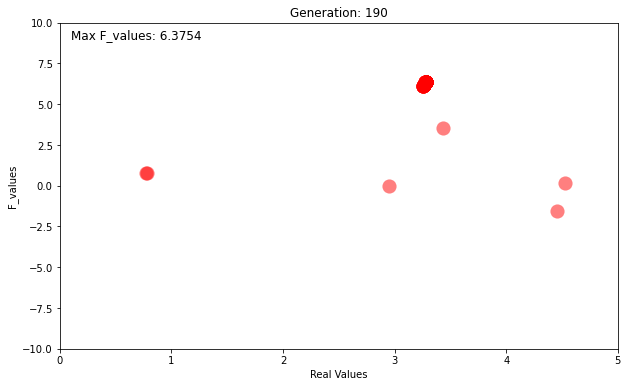

Generation: 190
Max F_values: 6.3754
Time for Generation 190: 0.0866 seconds



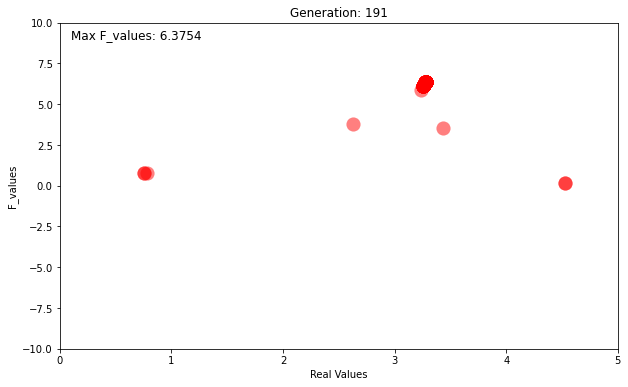

Generation: 191
Max F_values: 6.3754
Time for Generation 191: 0.0486 seconds



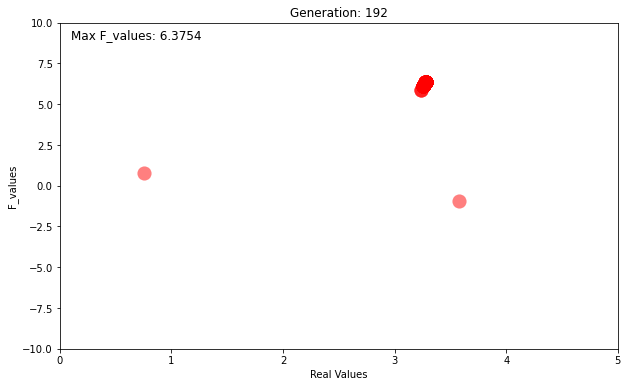

Generation: 192
Max F_values: 6.3754
Time for Generation 192: 0.0475 seconds



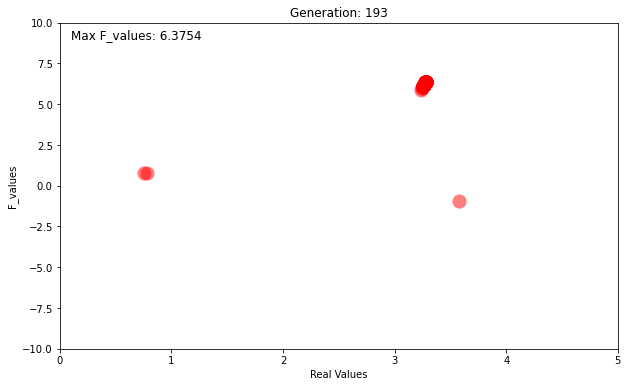

Generation: 193
Max F_values: 6.3754
Time for Generation 193: 0.0450 seconds



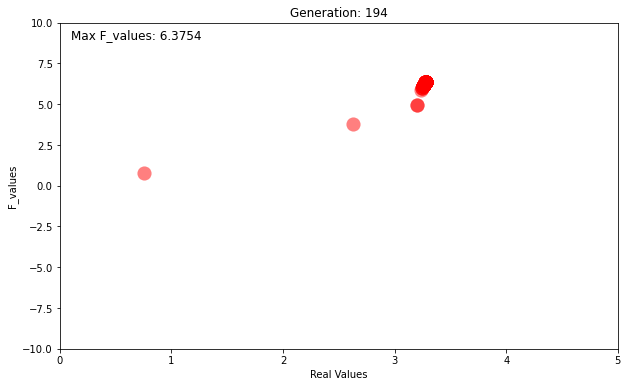

Generation: 194
Max F_values: 6.3754
Time for Generation 194: 0.0471 seconds



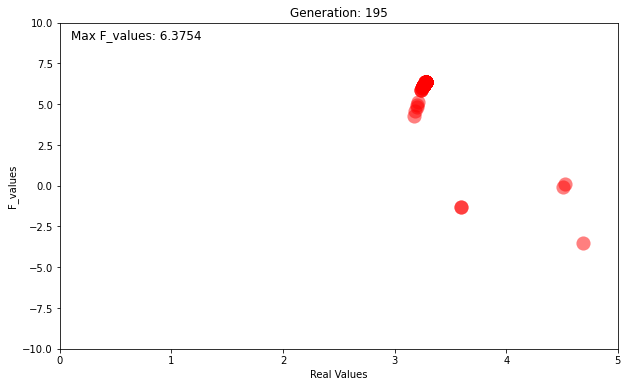

Generation: 195
Max F_values: 6.3754
Time for Generation 195: 0.0503 seconds



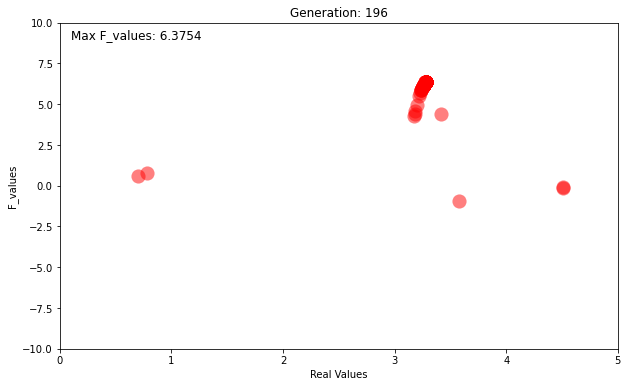

Generation: 196
Max F_values: 6.3754
Time for Generation 196: 0.0461 seconds



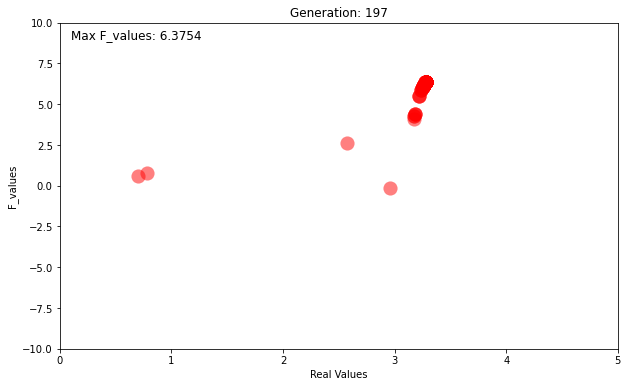

Generation: 197
Max F_values: 6.3754
Time for Generation 197: 0.0571 seconds



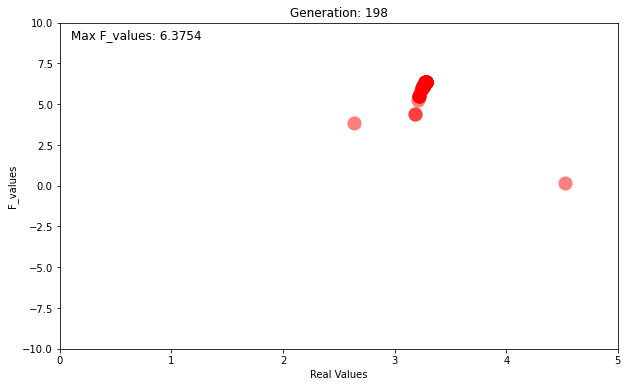

Generation: 198
Max F_values: 6.3754
Time for Generation 198: 0.0466 seconds



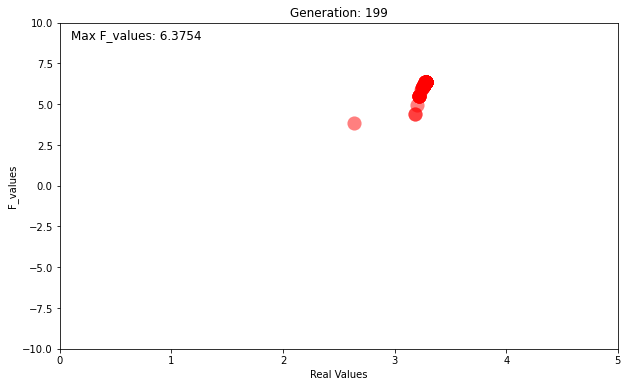

Generation: 199
Max F_values: 6.3754
Time for Generation 199: 0.0456 seconds



([-131.91715788015526,
  -26.763306918451704,
  108.10346582963615,
  92.15445006981483,
  154.62142703386917,
  234.47804992947235,
  330.9212624345537,
  424.3861225888754,
  454.52554932124565,
  451.2071334398177,
  494.80042145267925,
  513.9906612593305,
  510.9598692716262,
  526.9607148573313,
  522.0450251719891,
  528.8952531827762,
  540.3025895698438,
  547.467289214175,
  546.6391583786822,
  541.8088143814123,
  539.4466102423244,
  544.7823553781697,
  537.8649702306348,
  520.5533067238136,
  519.2414506397412,
  524.6223152608039,
  540.6172127175076,
  554.9549758909941,
  577.7189979499678,
  574.252193315229,
  571.844305003655,
  581.3244156478133,
  583.465969255395,
  578.3546066788822,
  588.4397762913203,
  590.0077106656192,
  587.4080839527977,
  589.0114672273012,
  590.1290782130205,
  582.0593403068436,
  577.8453818162307,
  569.3672326097844,
  573.0812510557954,
  573.8798836979114,
  603.4785435437337,
  607.3469145943039,
  596.1743770247175,
  607.32

In [273]:
MUTATION_RATE = 0.008 # > 0.003
performance = []
time_per_iteration = []
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
GA(N_GENERATIONS,pop)

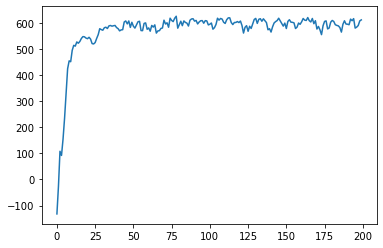

In [274]:
x = np.arange(0, N_GENERATIONS,1)
y = performance
plt.plot(x, y)

# HW 3.10 Discuss2
Based on the time taken for each generation, do you think GA is an efficient algorithm? Please compare it with traditional heuristic algorithms and modern machine learning methods in your explanation.

# Discuss1 and 2 are in the PDF file.